### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become more important than customer acquisition. Hence, it is essential for us to understand which customers may churn so that the rentention strategies can be devised accordingly

# Business Objective

 In this project, our business objective is to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Thus, our focus would be on
(i) Retaining high profitable customers.
(ii) Predicting which customers are at high risk of churn (in order to devise customer retention strategies accordingly).

# Part 1 - Setup and Data Preparation
In this section, we will:

Import necessary packages for this demonstration
Load the data
Ensure that qualitative predictor variables are of the category data type

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import io
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [6]:
#increase the number of rows to display
pd.set_option('display.max_rows',None)
#increase the number of columns to display
pd.set_option('display.max_columns',None)
#Identify the missing data for application_data
100*df.isnull().mean()



mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [7]:
##Creating a copy of the data incase it is required later
df_orig = df.copy()

In [8]:
##Check number of records and feature columns: 99999 records and 226 columns
df.shape

(99999, 226)

In [9]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [11]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [12]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = df.select_dtypes(include = 'object').columns
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
cols_to_drop=df.columns[100*df.isnull().mean()>40]

df.drop(cols_to_drop,axis=1)

In [ ]:
# Store the categorical column names
categorical_columns = df.select_dtypes(include = 'category').columns

In [ ]:
df.info()

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

# Part 2
## DATA CLEANING AND MANIPULATION

In [ ]:
##Stripping off white_spaces from the column name(if any)
df = df.rename(columns= lambda x: x.strip(), inplace=False)

In [ ]:
##Checking and dropping duplicated records(if any)
df = df.drop_duplicates()

In [ ]:
##List of Incorrect name columns (as data dictionary says RECH: Recharge)
last_day_rech_cols = list(df.columns[df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

In [ ]:
##Correcting name of 'last_day_rch_amt_*' to 'last_day_rech_amt_*' columns (for months 6,7,8 and 9 respectively)
df = df.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8', 'last_day_rch_amt_9':'last_day_rech_amt_9'})
correct_last_day_rech_amt_cols = list(df.columns[df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

In [ ]:
##Columns containing recharge amount 'rech_amt' or recharge data 'rech_data' details
rech_amt_data_cols = df.columns[df.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

In [ ]:
##Check null values in above mentioned columns, if any(column wise: missing value percentage)
rech_amt_data_df = df[rech_amt_data_cols]
null_prcnt_df(rech_amt_data_df)

In [ ]:
##Check stats of these columns in the dataframe
rech_amt_data_df.describe()

In [ ]:
##Imputation of 'av_rech_amt_data_* and total_rech_data_*' column NaNs with 0 (for all the months 6, 7, 8 and 9 respectively)

df['av_rech_amt_data_6']= df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7']= df['av_rech_amt_data_7'].fillna(0)
df['av_rech_amt_data_8']= df['av_rech_amt_data_8'].fillna(0)
df['av_rech_amt_data_9']= df['av_rech_amt_data_9'].fillna(0)

df['total_rech_data_6']= df['total_rech_data_6'].fillna(0)
df['total_rech_data_7']= df['total_rech_data_7'].fillna(0)
df['total_rech_data_8']= df['total_rech_data_8'].fillna(0)
df['total_rech_data_9']= df['total_rech_data_9'].fillna(0)


In [ ]:
##Deriving features to subset the high-value customers.

##Calculating total data recharge amt for all the months 6, 7, 8 and 9 respectively.
df['total_rech_data_amt_6'] = (df['av_rech_amt_data_6'] * df['total_rech_data_6']) 
df['total_rech_data_amt_7'] = (df['av_rech_amt_data_7'] * df['total_rech_data_7']) 
df['total_rech_data_amt_8'] = (df['av_rech_amt_data_8'] * df['total_rech_data_8']) 
df['total_rech_data_amt_9'] = (df['av_rech_amt_data_9'] * df['total_rech_data_9']) 

In [ ]:
##Calculating the total average recharge for good phase: average of (calling recharge costs + data recharge costs) for month (6)
##and (7). Note: Good phase: month (6) and (7)

df['avg_total_rech_plus_data_amt_6_7'] = (df['total_rech_data_amt_6'] + df['total_rech_amt_6']+
                                                  df['total_rech_data_amt_7'] + df['total_rech_amt_7'])/2

In [ ]:
avg_total_rech_plus_data_amt_6_7_70per = df['avg_total_rech_plus_data_amt_6_7'].quantile(0.7)
avg_total_rech_plus_data_amt_6_7_70per

In [ ]:
##Filtering high-value customers (>=70th percentile of avg recharge amount of the good phase)
telecom_hv = df.loc[(df.avg_total_rech_plus_data_amt_6_7 > avg_total_rech_plus_data_amt_6_7_70per)]
telecom_hv.shape

In [ ]:
##Check for null values of features where we have no incoming and outgoing calls and no mobile internet usage in the churn phase.
churn_phase_cols = ['total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

churn_phase_cols_df = df[churn_phase_cols]


In [ ]:
##Criteria: High-valued customers with no incoming and outgoing calls and no mobile internet usage in the churn phase.
telecom_hv['total_usage_col_9'] = (telecom_hv['total_og_mou_9'] + telecom_hv['total_ic_mou_9'] + 
                                   telecom_hv['vol_2g_mb_9'] + telecom_hv['vol_3g_mb_9'])

##Tagging churners based on 'total_usage_col_9' 
telecom_hv['churn'] = np.where(telecom_hv['total_usage_col_9']== 0, 1, 0)  
#(A value in 'total_usage_col_9' column indicates presence of calling and/or internet in 9th month; if absent i.e. total=0 implies churn i.e. 1)

print("Tagging churners [No. of Records]\n(churn=1, else 0):")
telecom_hv['churn'].value_counts()

In [ ]:
print("\nTagging churners (% of total)\n(churn=1, else 0):")
round(100*telecom_hv['churn'].value_counts()/len(telecom_hv.index),3)

In [ ]:
##Churn Rate
churn_rate = round(100*telecom_hv['churn'].sum()/len(telecom_hv.index),3)
print('Churn Rate(%):',churn_rate)
print("High-Valued Customers Dataset shape: ",telecom_hv.shape)

In [ ]:
##List of columns in churn phase (month 9): (attributes containing '_9')
attributes_9 = list(telecom_hv.columns[telecom_hv.columns.str.contains('_9')])

##Also considering 'sep_vbc_3g' as this column also belongs to the churn phase (month 9: September)
attributes_9.append('sep_vbc_3g')

##Dropping churn phase (month 9) columns (except churn column)
telecom_hv.drop(attributes_9, axis=1, inplace=True)

telecom_hv.head()

# EDA

In [ ]:
##Removing columns that show constant variance (i.e. all values are constant or 0)
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    print('Columns that are dropped are:\n{0}'.format(list_uniq_svcol))
    print('\nNumber of columns dropped:\n{0}'.format(len(list_uniq_svcol)))
    return df_newsingle

telecom_hv= remove_single_val_uniq_col(telecom_hv)

In [ ]:
##Since this is not a time-series based analysis, we might also eliminate date columns as they won't be useful for our analysis
date_columns_list= list(telecom_hv.columns[telecom_hv.columns.str.contains('date')])
date_columns_list

In [ ]:
##Dropping the date columns
telecom_hv.drop(date_columns_list, axis=1, inplace=True)
telecom_hv.head()

In [ ]:
telecom_hv.shape

In [ ]:
##Unique count dataframe

def hv_categorical_cols_unique(data):
    df= data.copy()
    
    unique_count=[]
    unique_val=[]
    col_list=[]
    data_type=[]
    
    for col in df.columns:
        if len(df[col].unique())<20:  ##Set a threshold to check for the distinct values of potential categorical datatype columns
            col_list.append(col)
            data_type.append(df[col].dtype)
            unique_count.append(len(df[col].unique()))
            unique_val.append(df[col].unique())
    unique_df = pd.DataFrame({'Features': np.array(col_list)})
    unique_df['Data Type'] = np.array(data_type)
    unique_df['Unique Count'] = np.array(unique_count)
    unique_df['Unique Values'] = np.array(unique_val)
    unique_df.set_index('Features', inplace=True)
    sorted_df = unique_df.sort_values(by='Unique Count', ascending=True)
    return sorted_df

print("**Checking for potential categorical datatype columns:**")  
hv_categorical_cols_unique(data= telecom_hv)

In [52]:
##Creating a function for boxplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
##(0: Not Churned (Retention), 1: Churned)

def plot_boxplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()
    
    plt.subplot(1,3,1)
    ax_11= sns.boxplot(data=df, y=feature+"_6", x="churn", hue="churn", showfliers= False, palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22= sns.boxplot(data=df, y=feature+"_7",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    
    plt.subplot(1,3,3)
    ax_33= sns.boxplot(data=df, y=feature+"_8",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

In [53]:
rech_amt_cols = telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

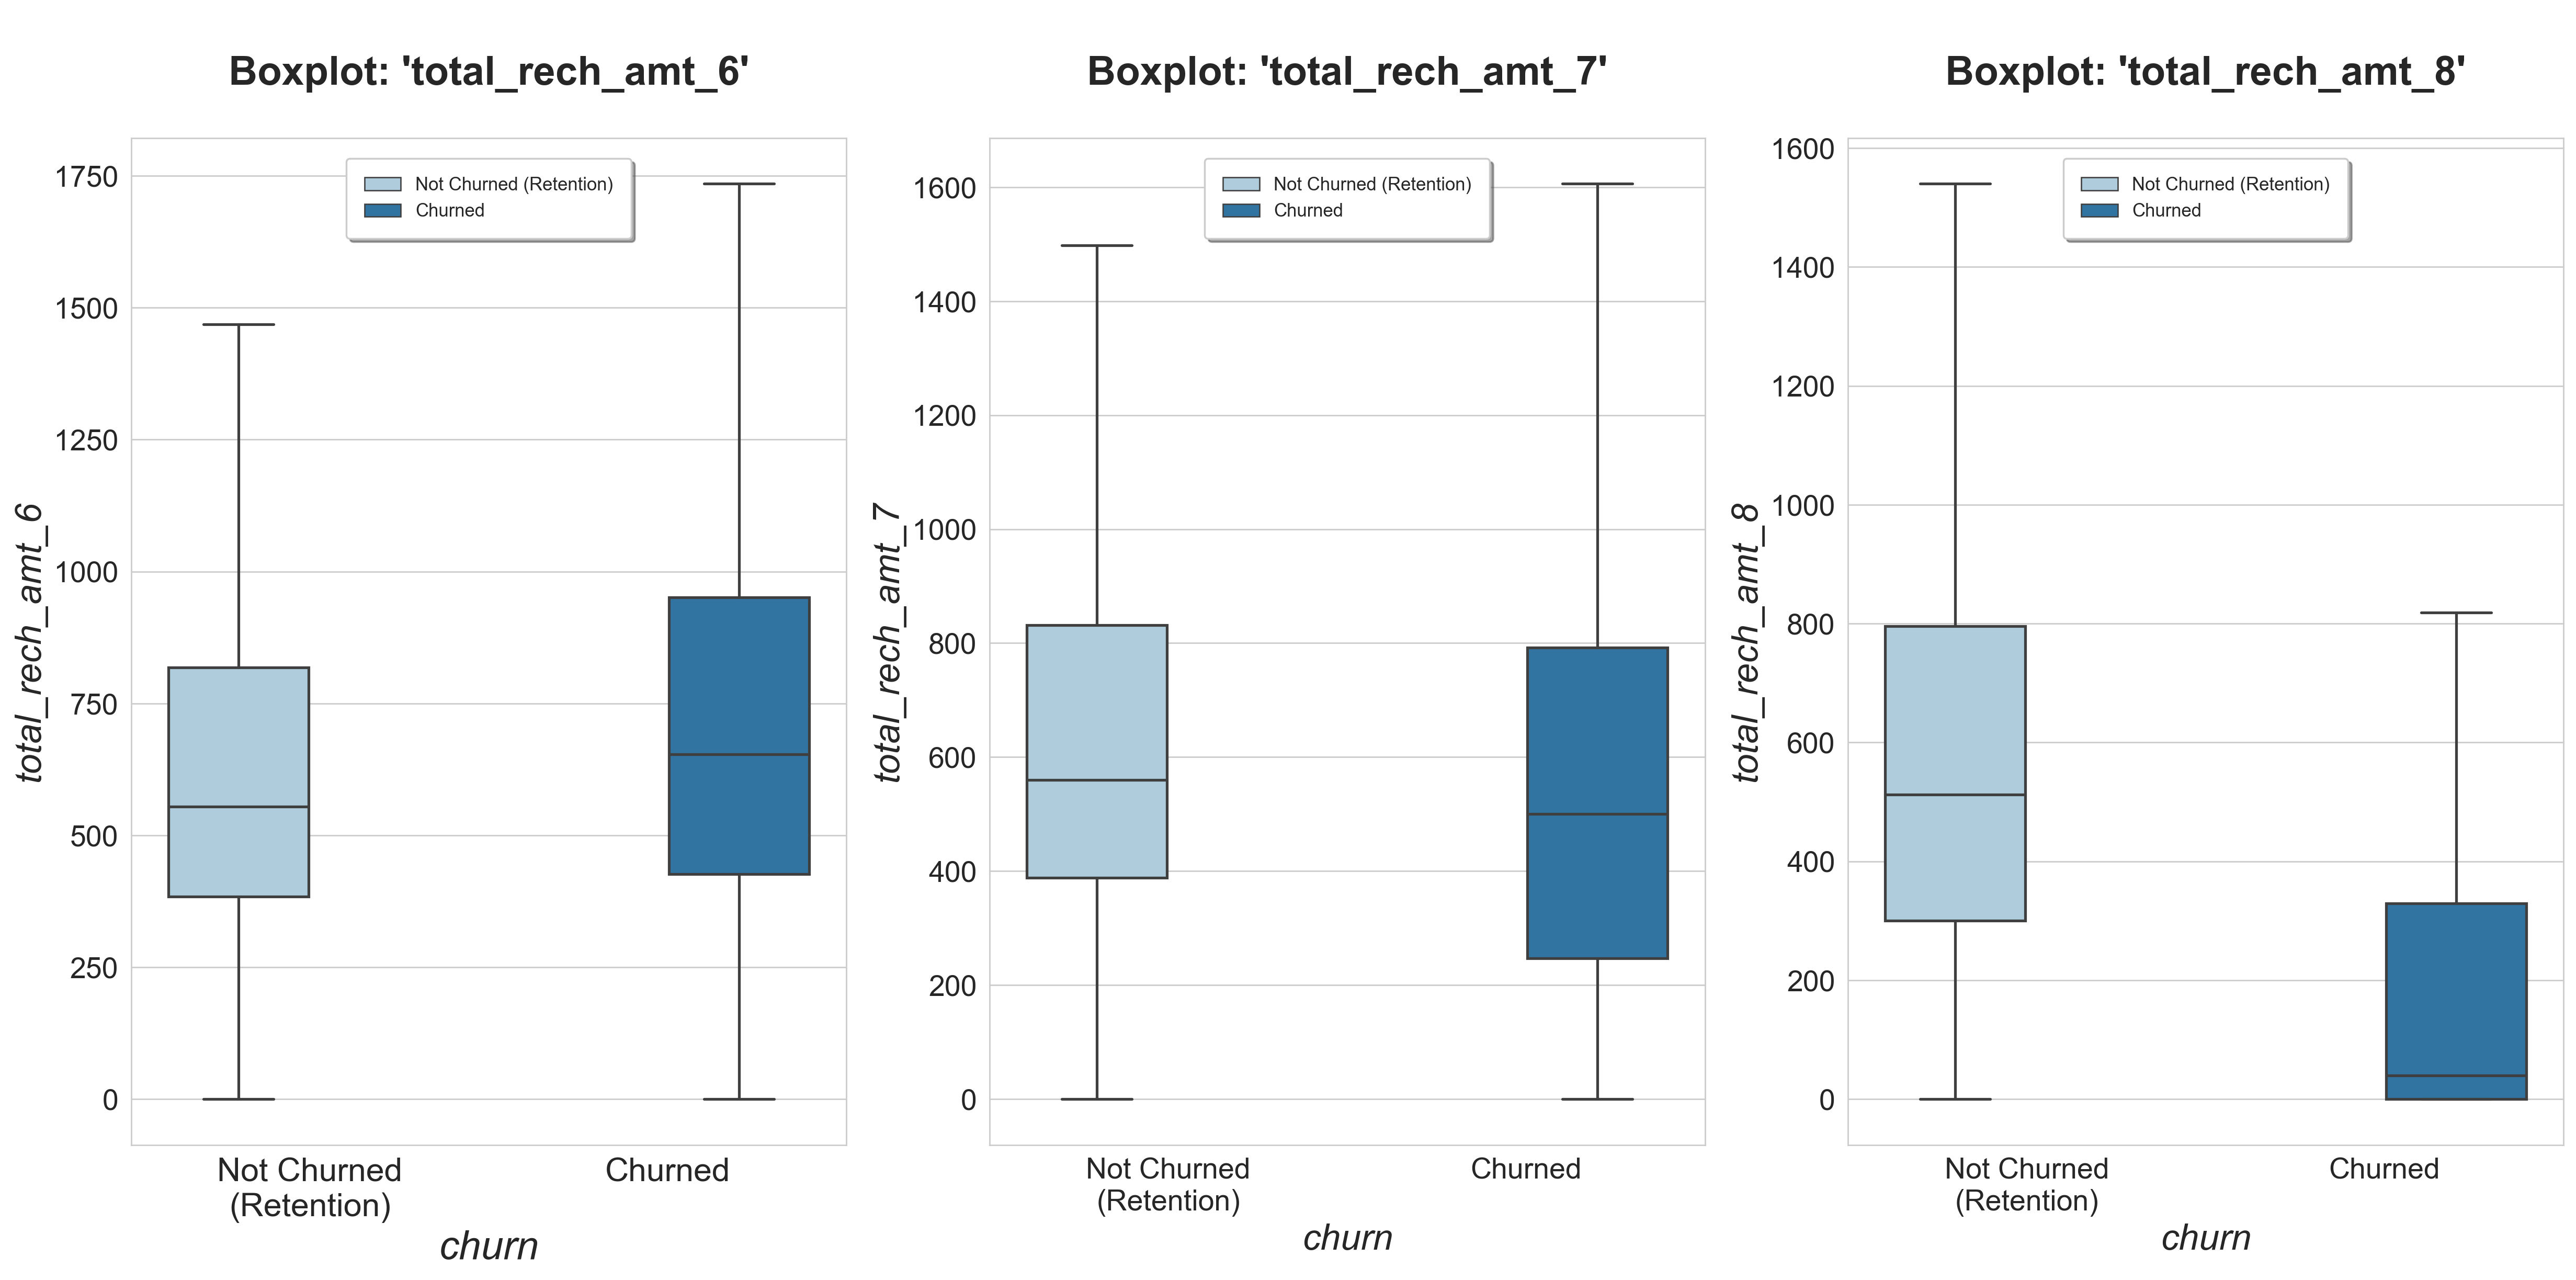

In [54]:
##Plotting boxplots for 'total_rech_amt' (calling plan recharges)
plot_boxplots_6_7_8('total_rech_amt')

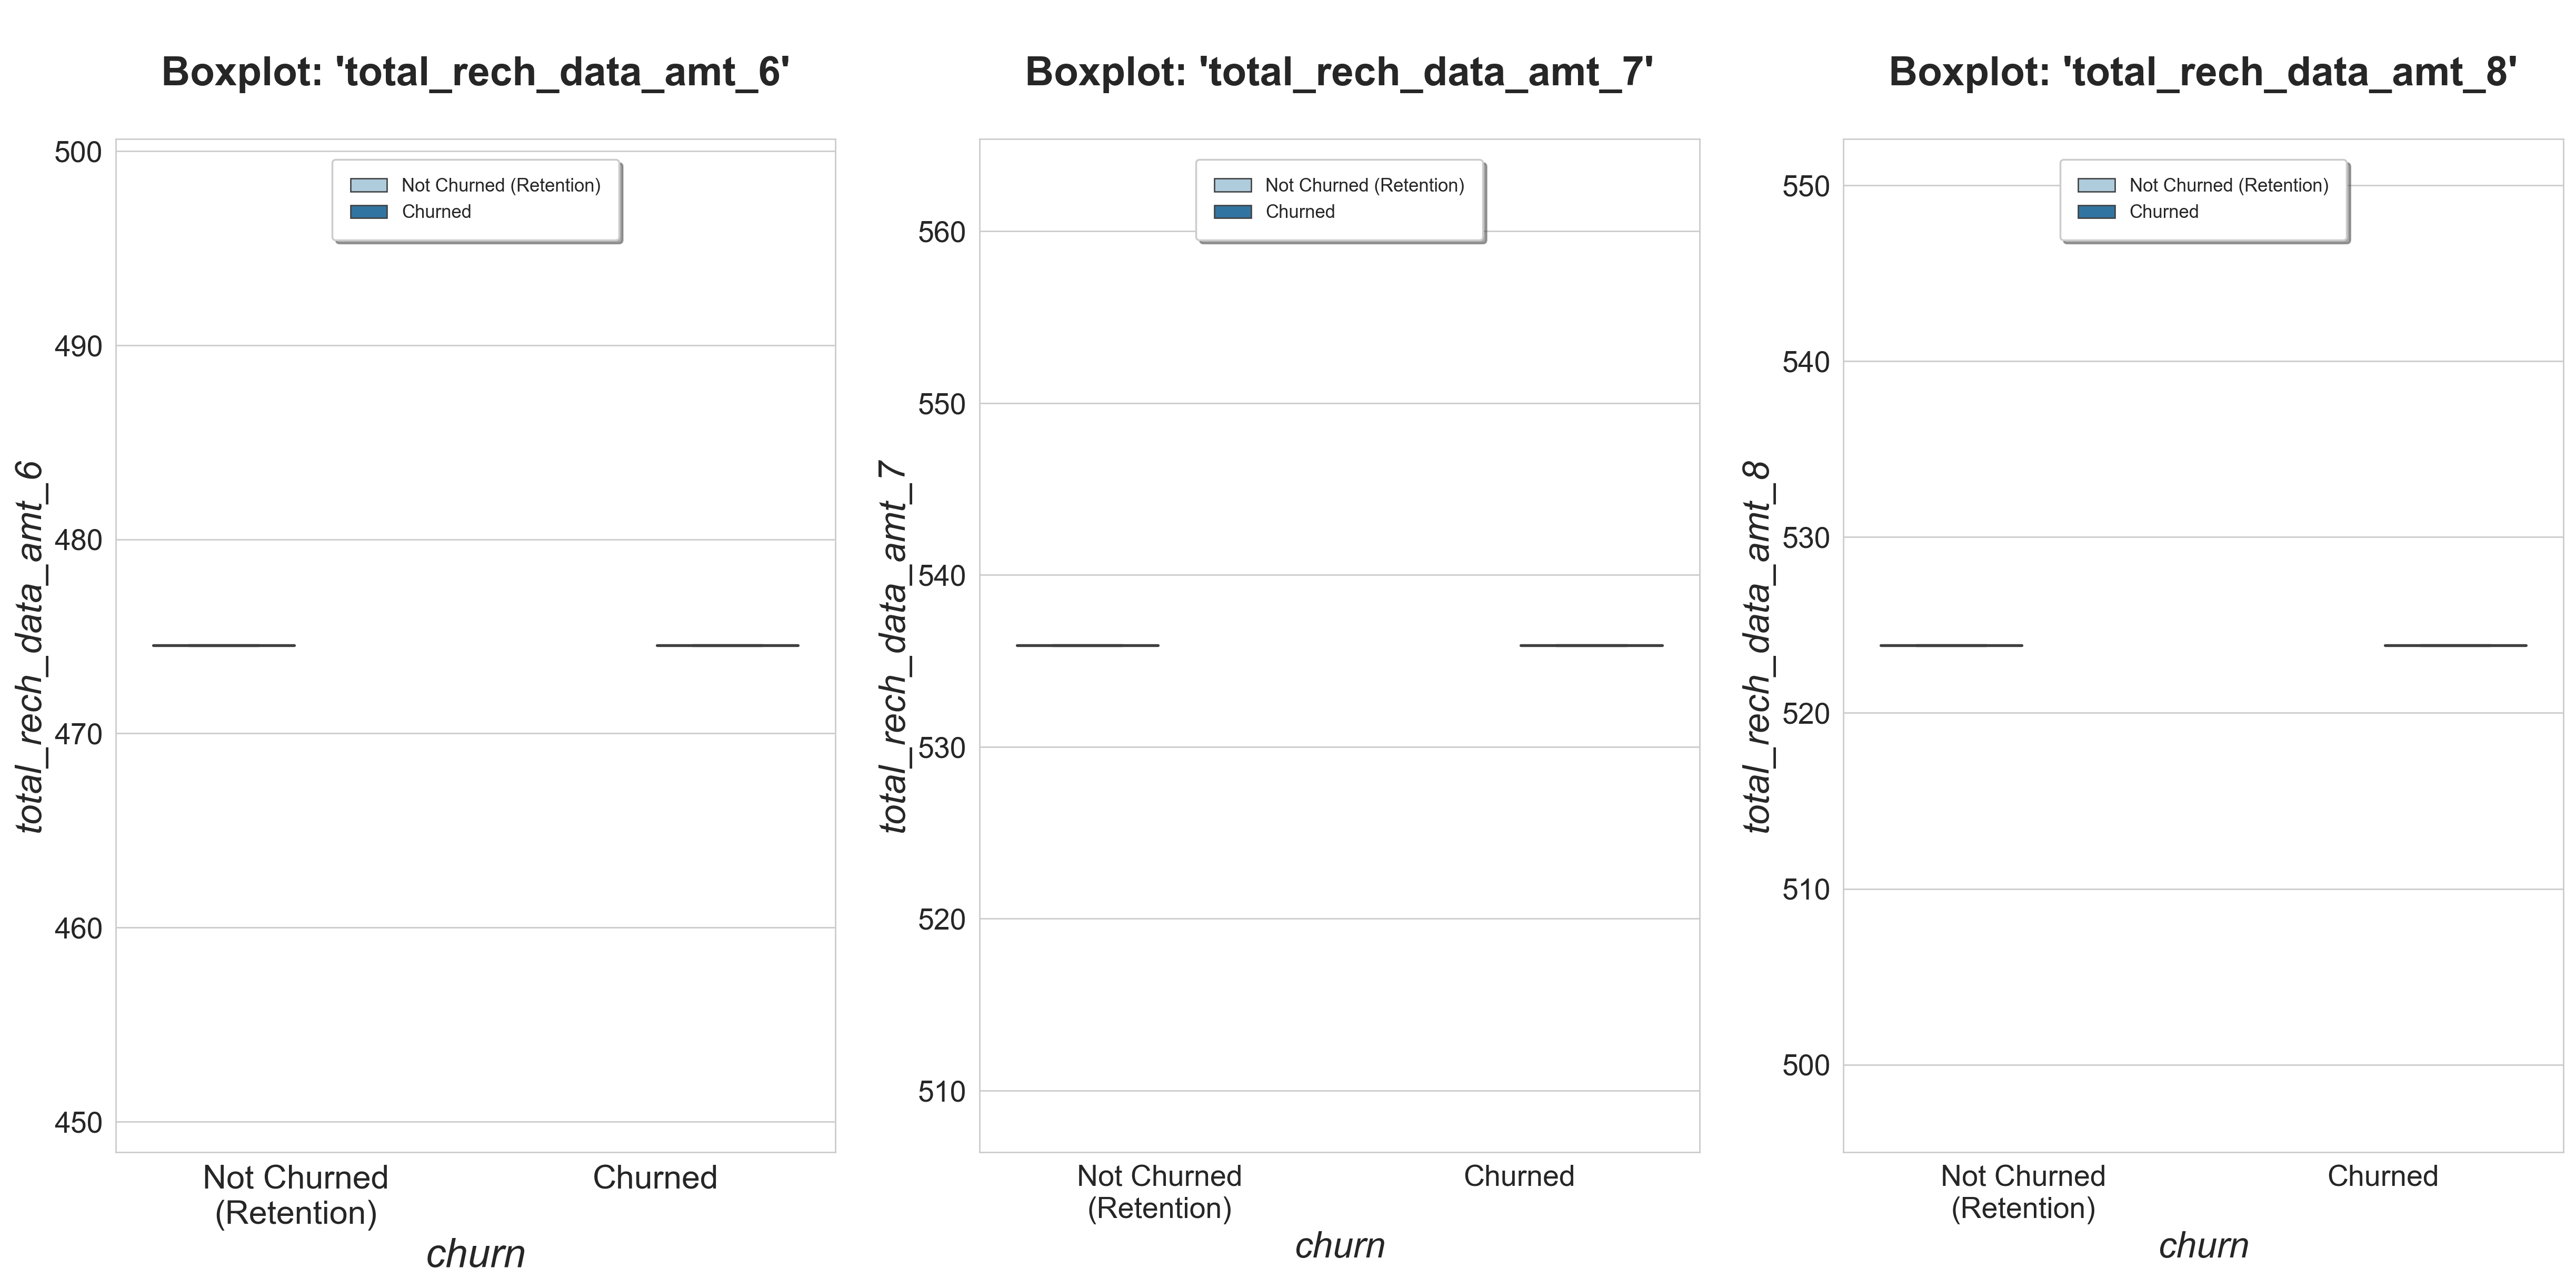

In [55]:
##Plotting boxplots for 'total_rech_data_amt' (dataplan recharges). 
plot_boxplots_6_7_8('total_rech_data_amt')

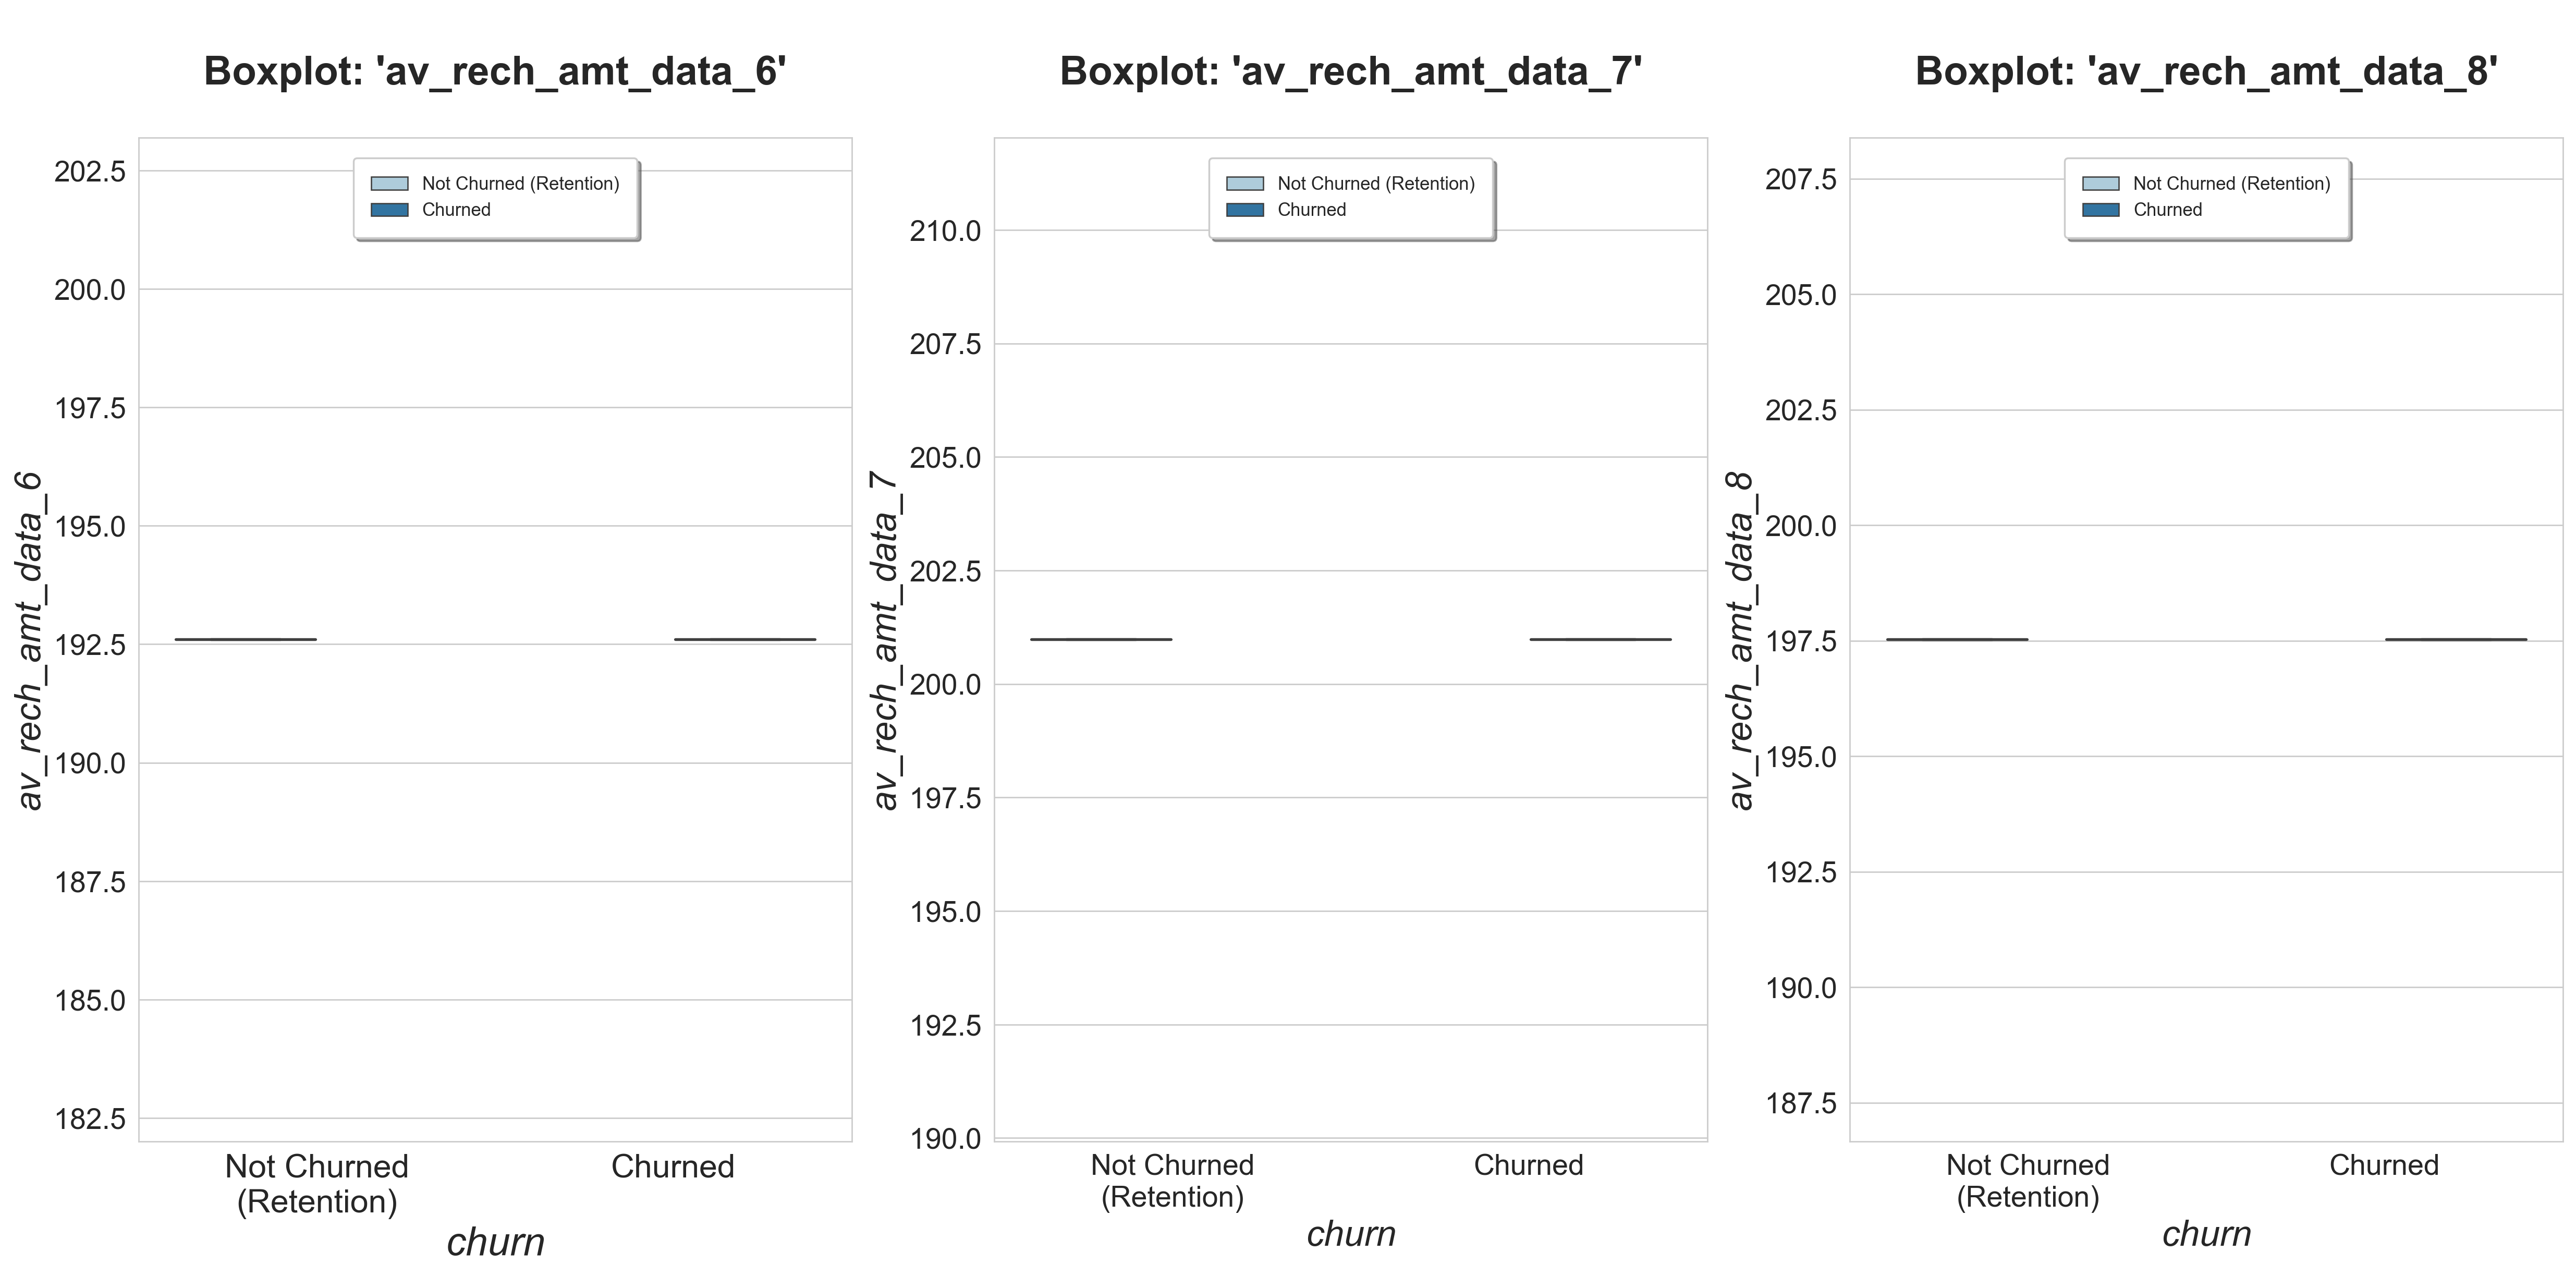

In [56]:
##Plotting boxplots for 'av_rech_amt_data' 
plot_boxplots_6_7_8('av_rech_amt_data')

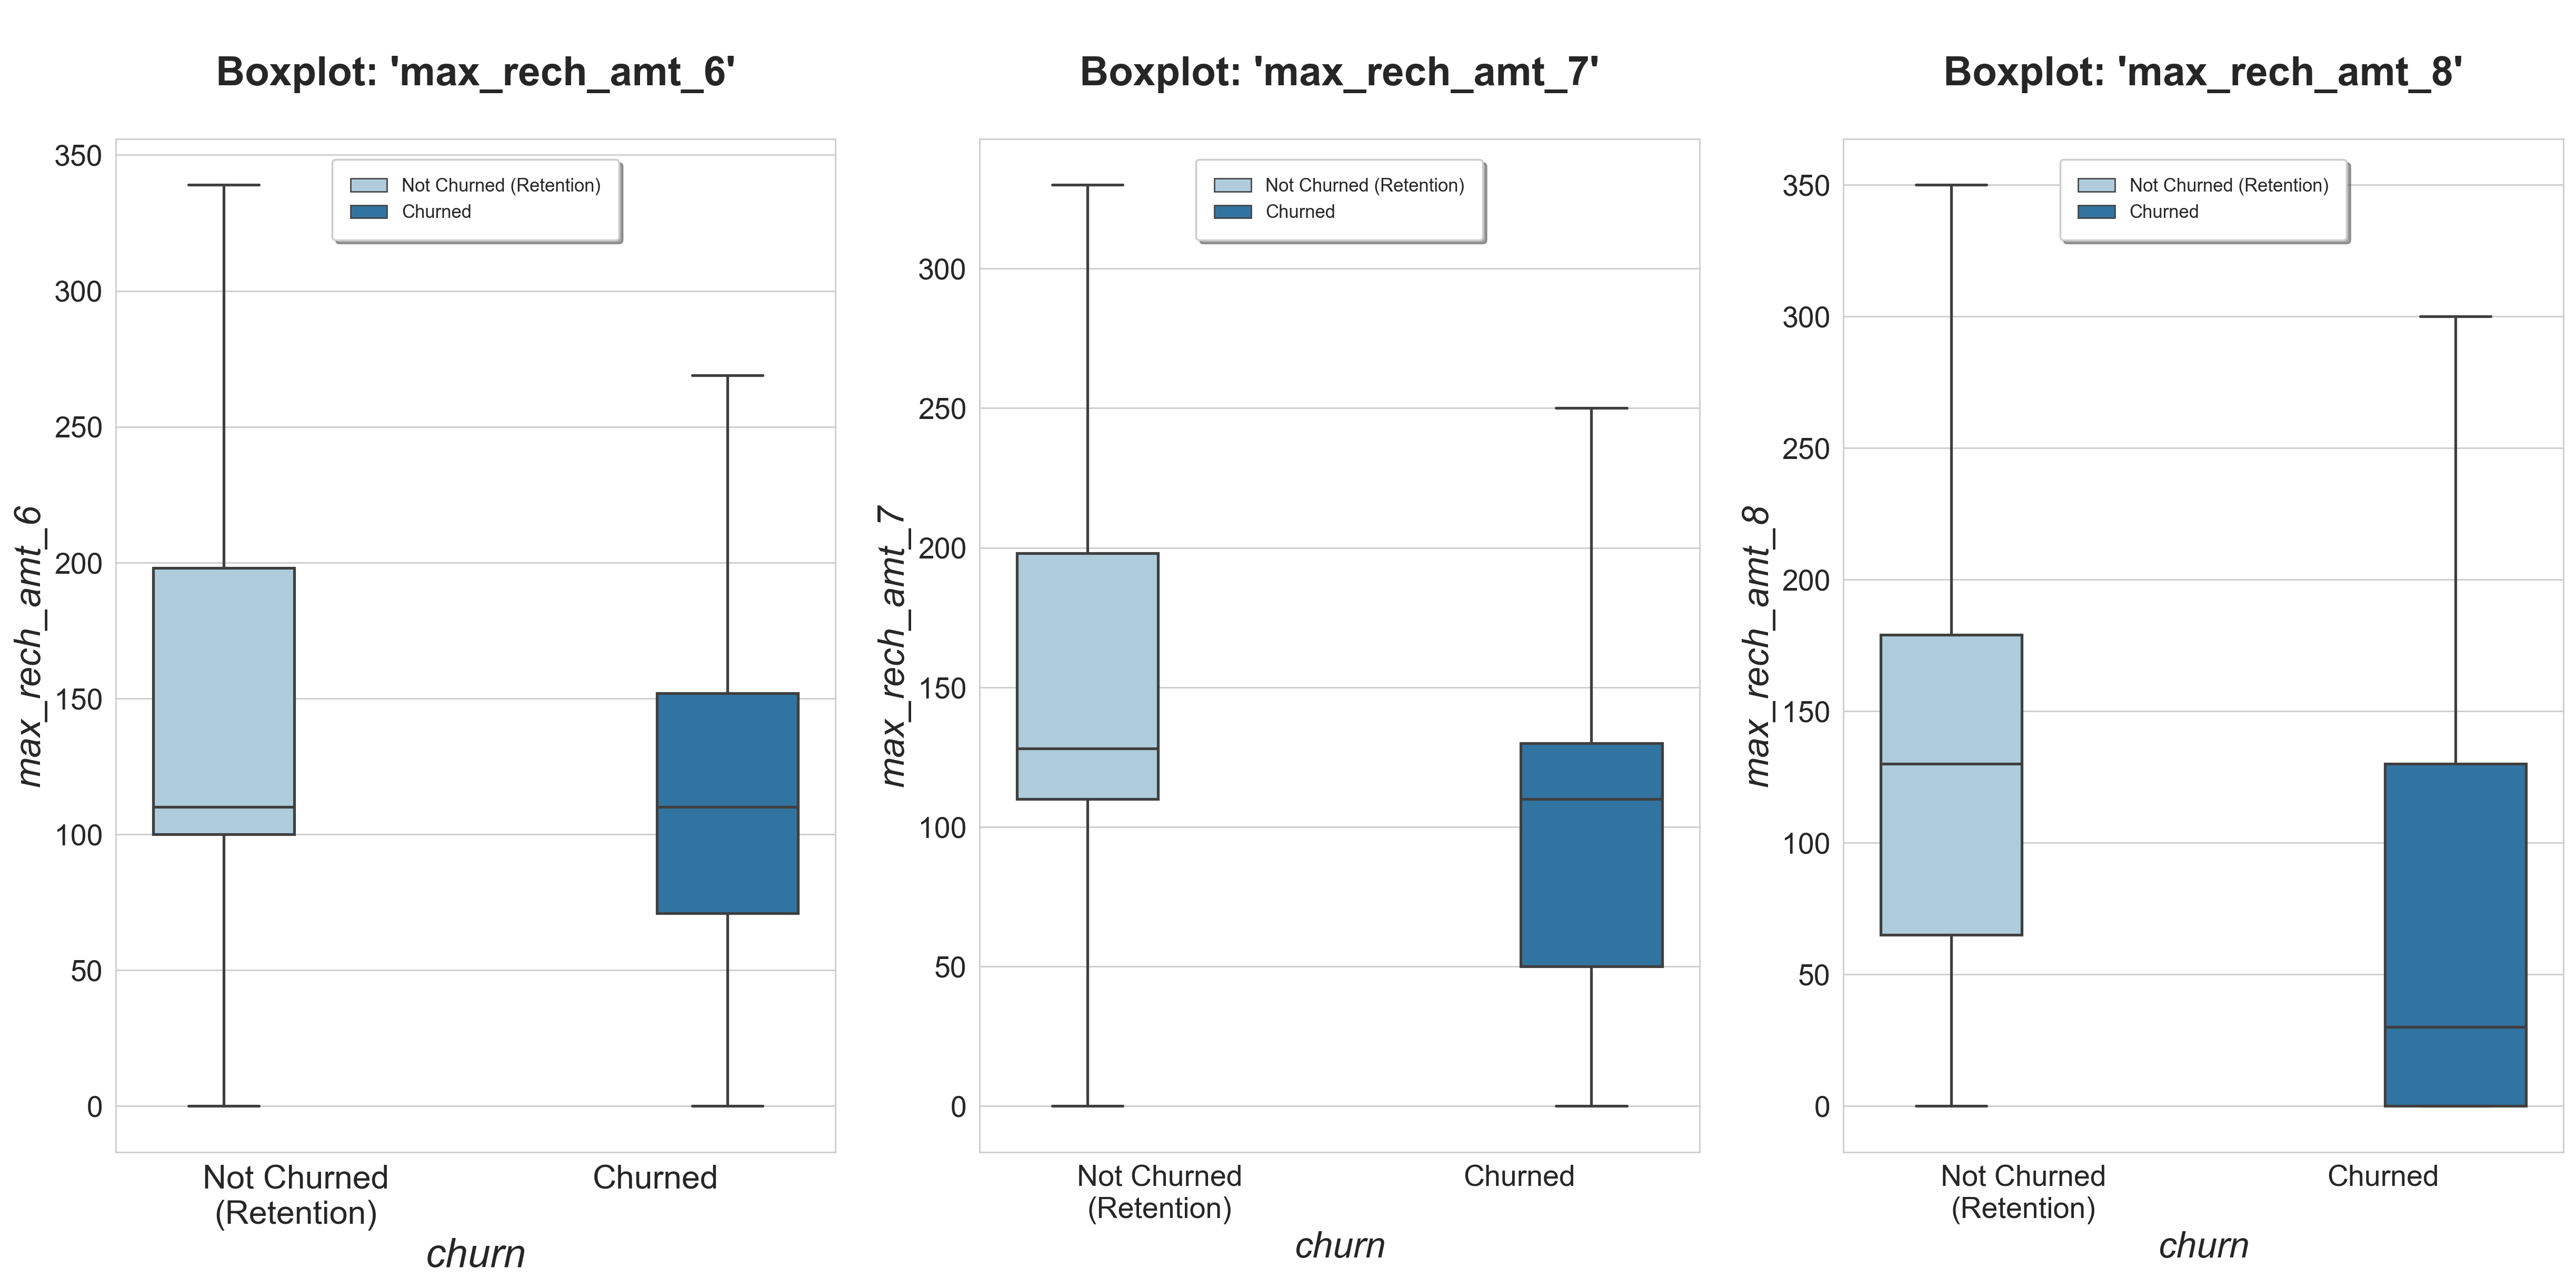

In [57]:
##Plotting boxplots for 'max_rech_amt' 
plot_boxplots_6_7_8('max_rech_amt')

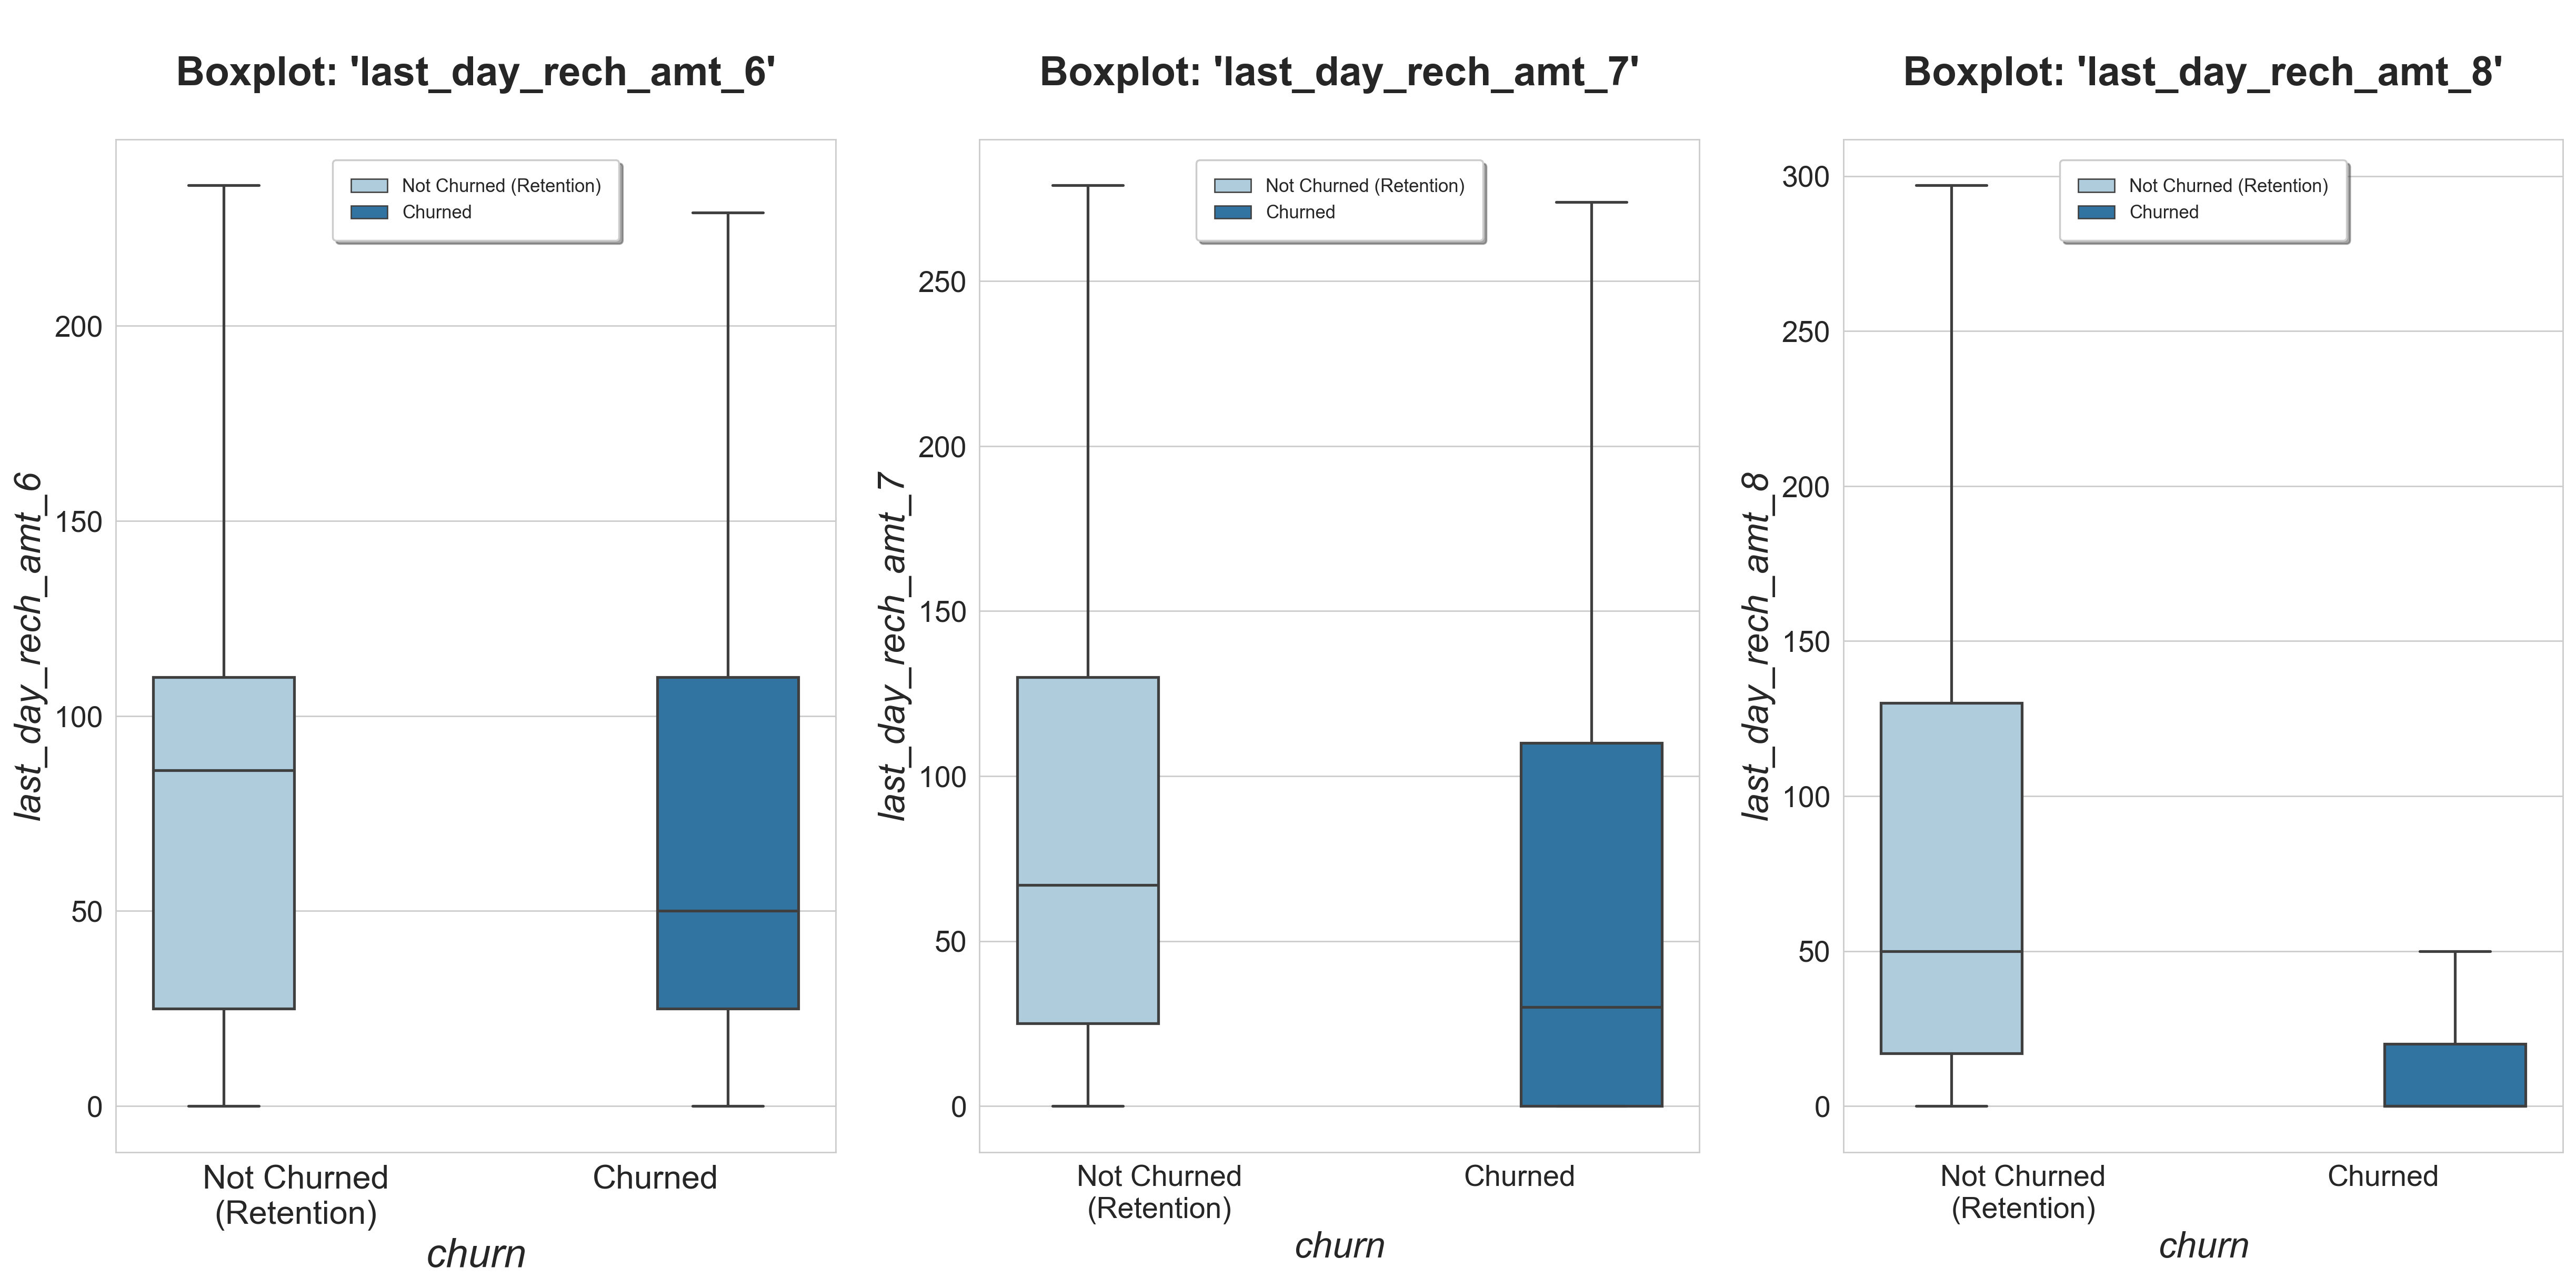

In [58]:
##Plotting boxplots for 'last_day_rech_amt' 
plot_boxplots_6_7_8('last_day_rech_amt')

In [59]:
##Let's check other 'rech_num' and 'max_rech_data' variables
other_rech = telecom_hv.columns[telecom_hv.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_rech

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [61]:
##Let's check for missing values in 'total_rech_num' and 'max_rech_data' features

other_rech_df = telecom_hv[other_rech]


In [62]:
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     29994.000000     29994.000000     29994.000000
mean        133.515825       134.420831       128.714791
std          79.892734        82.009223        80.953888
min           1.000000         1.000000         1.000000
25%         126.393392       126.729459       125.717301
50%         126.393392       126.729459       125.717301
75%         126.393392       126.729459       125.717301
max        1555.000000      1555.000000      1555.000000

In [63]:
##Imputing 'max_rech_data_*' columns with 0 (*columns: all 3 months - month 6, 7 and 8)
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_hv[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

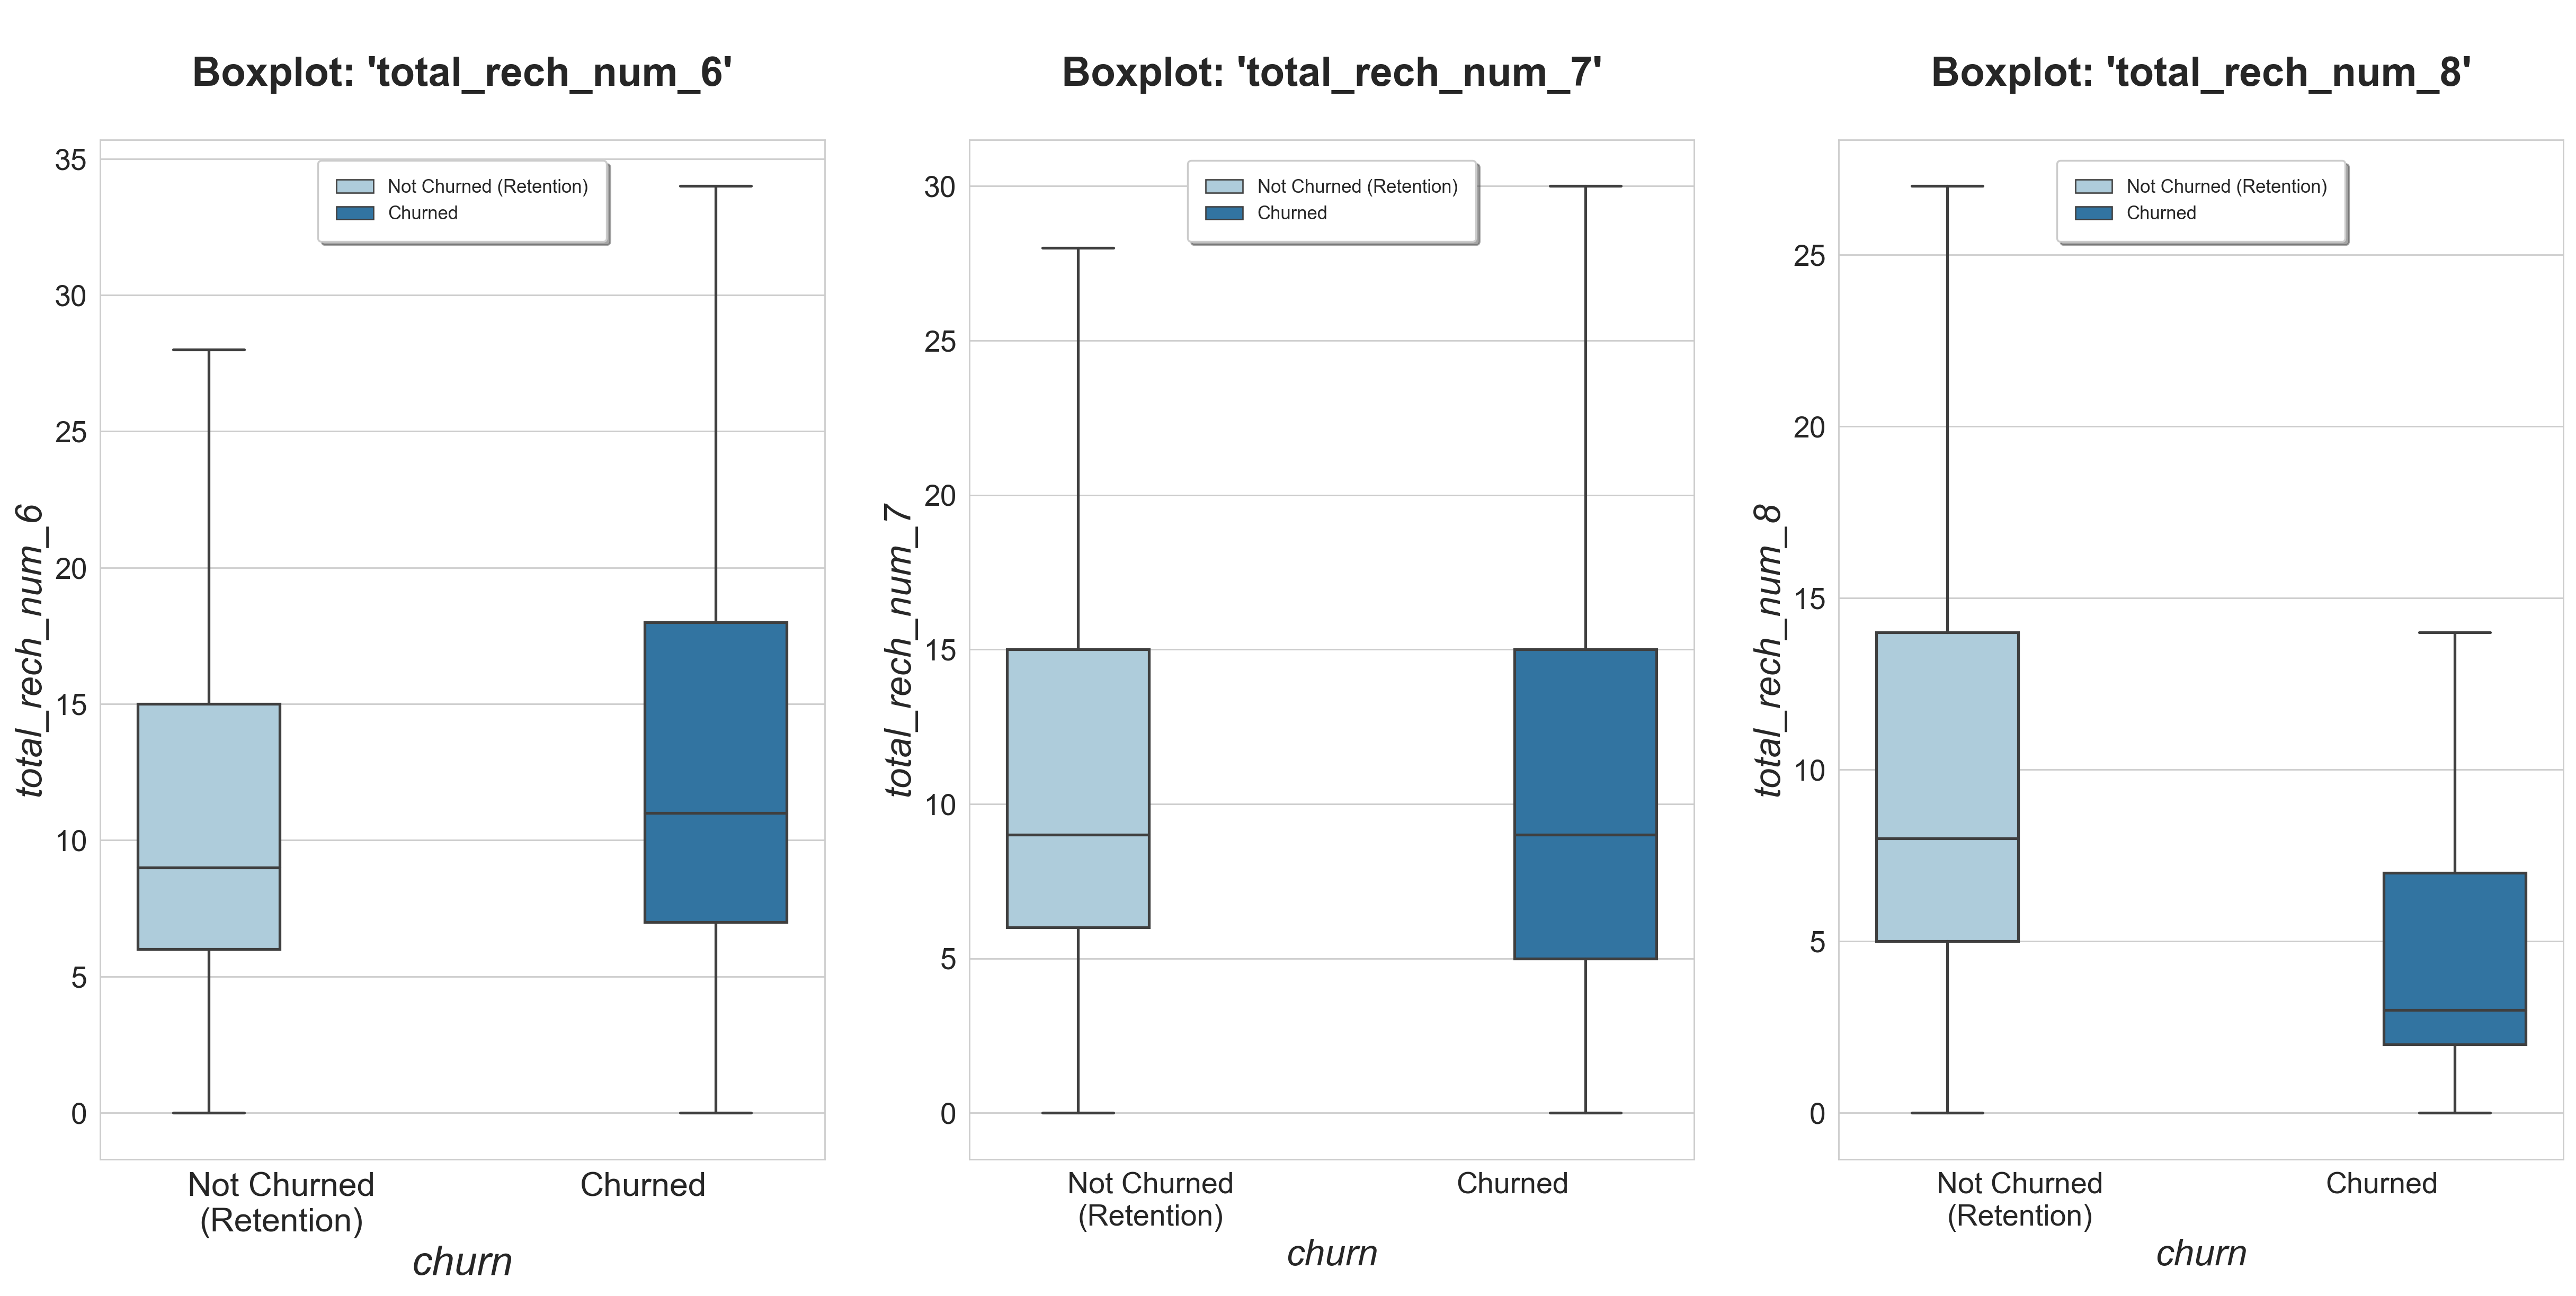

In [64]:
##Plotting boxplots for 'total_rech_num' 
plot_boxplots_6_7_8('total_rech_num')

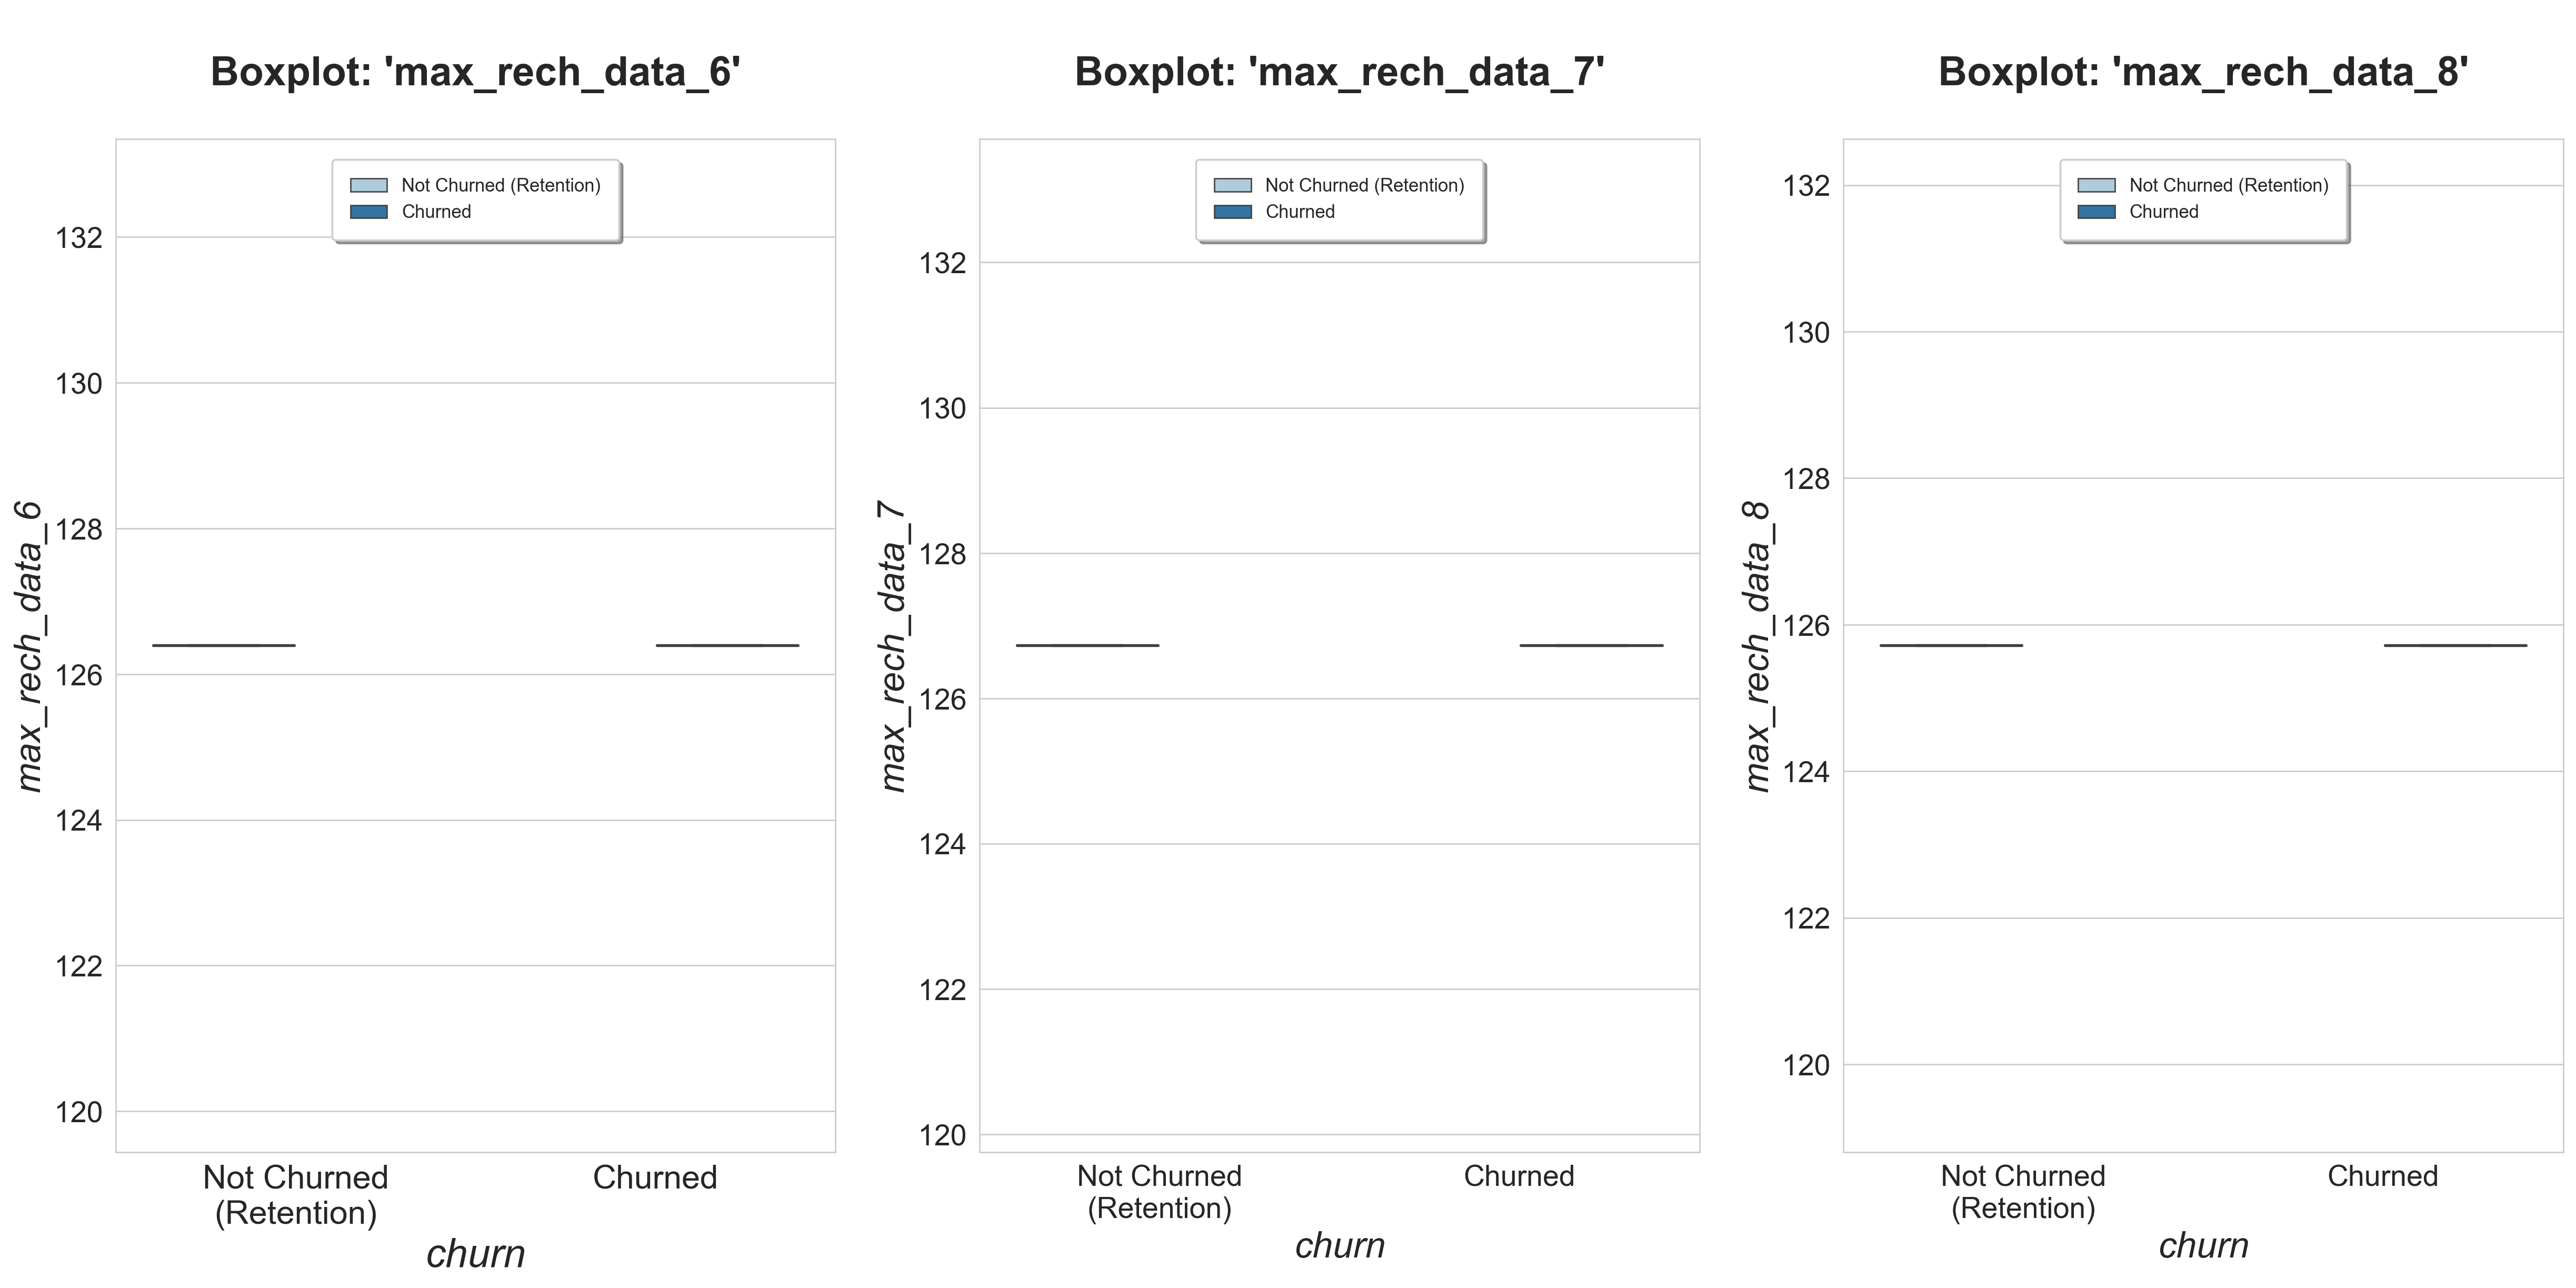

In [65]:
##Plotting boxplots for 'max_rech_data' 
plot_boxplots_6_7_8('max_rech_data')

In [66]:
##Recheck for missing values in 'recharge' plans for calling and data features
all_rech_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])  ##Excluding 2g_3g
all_rech = telecom_hv[all_rech_vars]

In [67]:
usage_2g_3g_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('2g|3g',regex=True)])
usage_2g_3g_vars

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [69]:
##Check for missing values
usage_2g_3g = telecom_hv[usage_2g_3g_vars]


In [70]:
##Dropping 'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g' based features (revenue_based)
drop_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
telecom_hv.drop(drop_vars, axis=1, inplace=True)

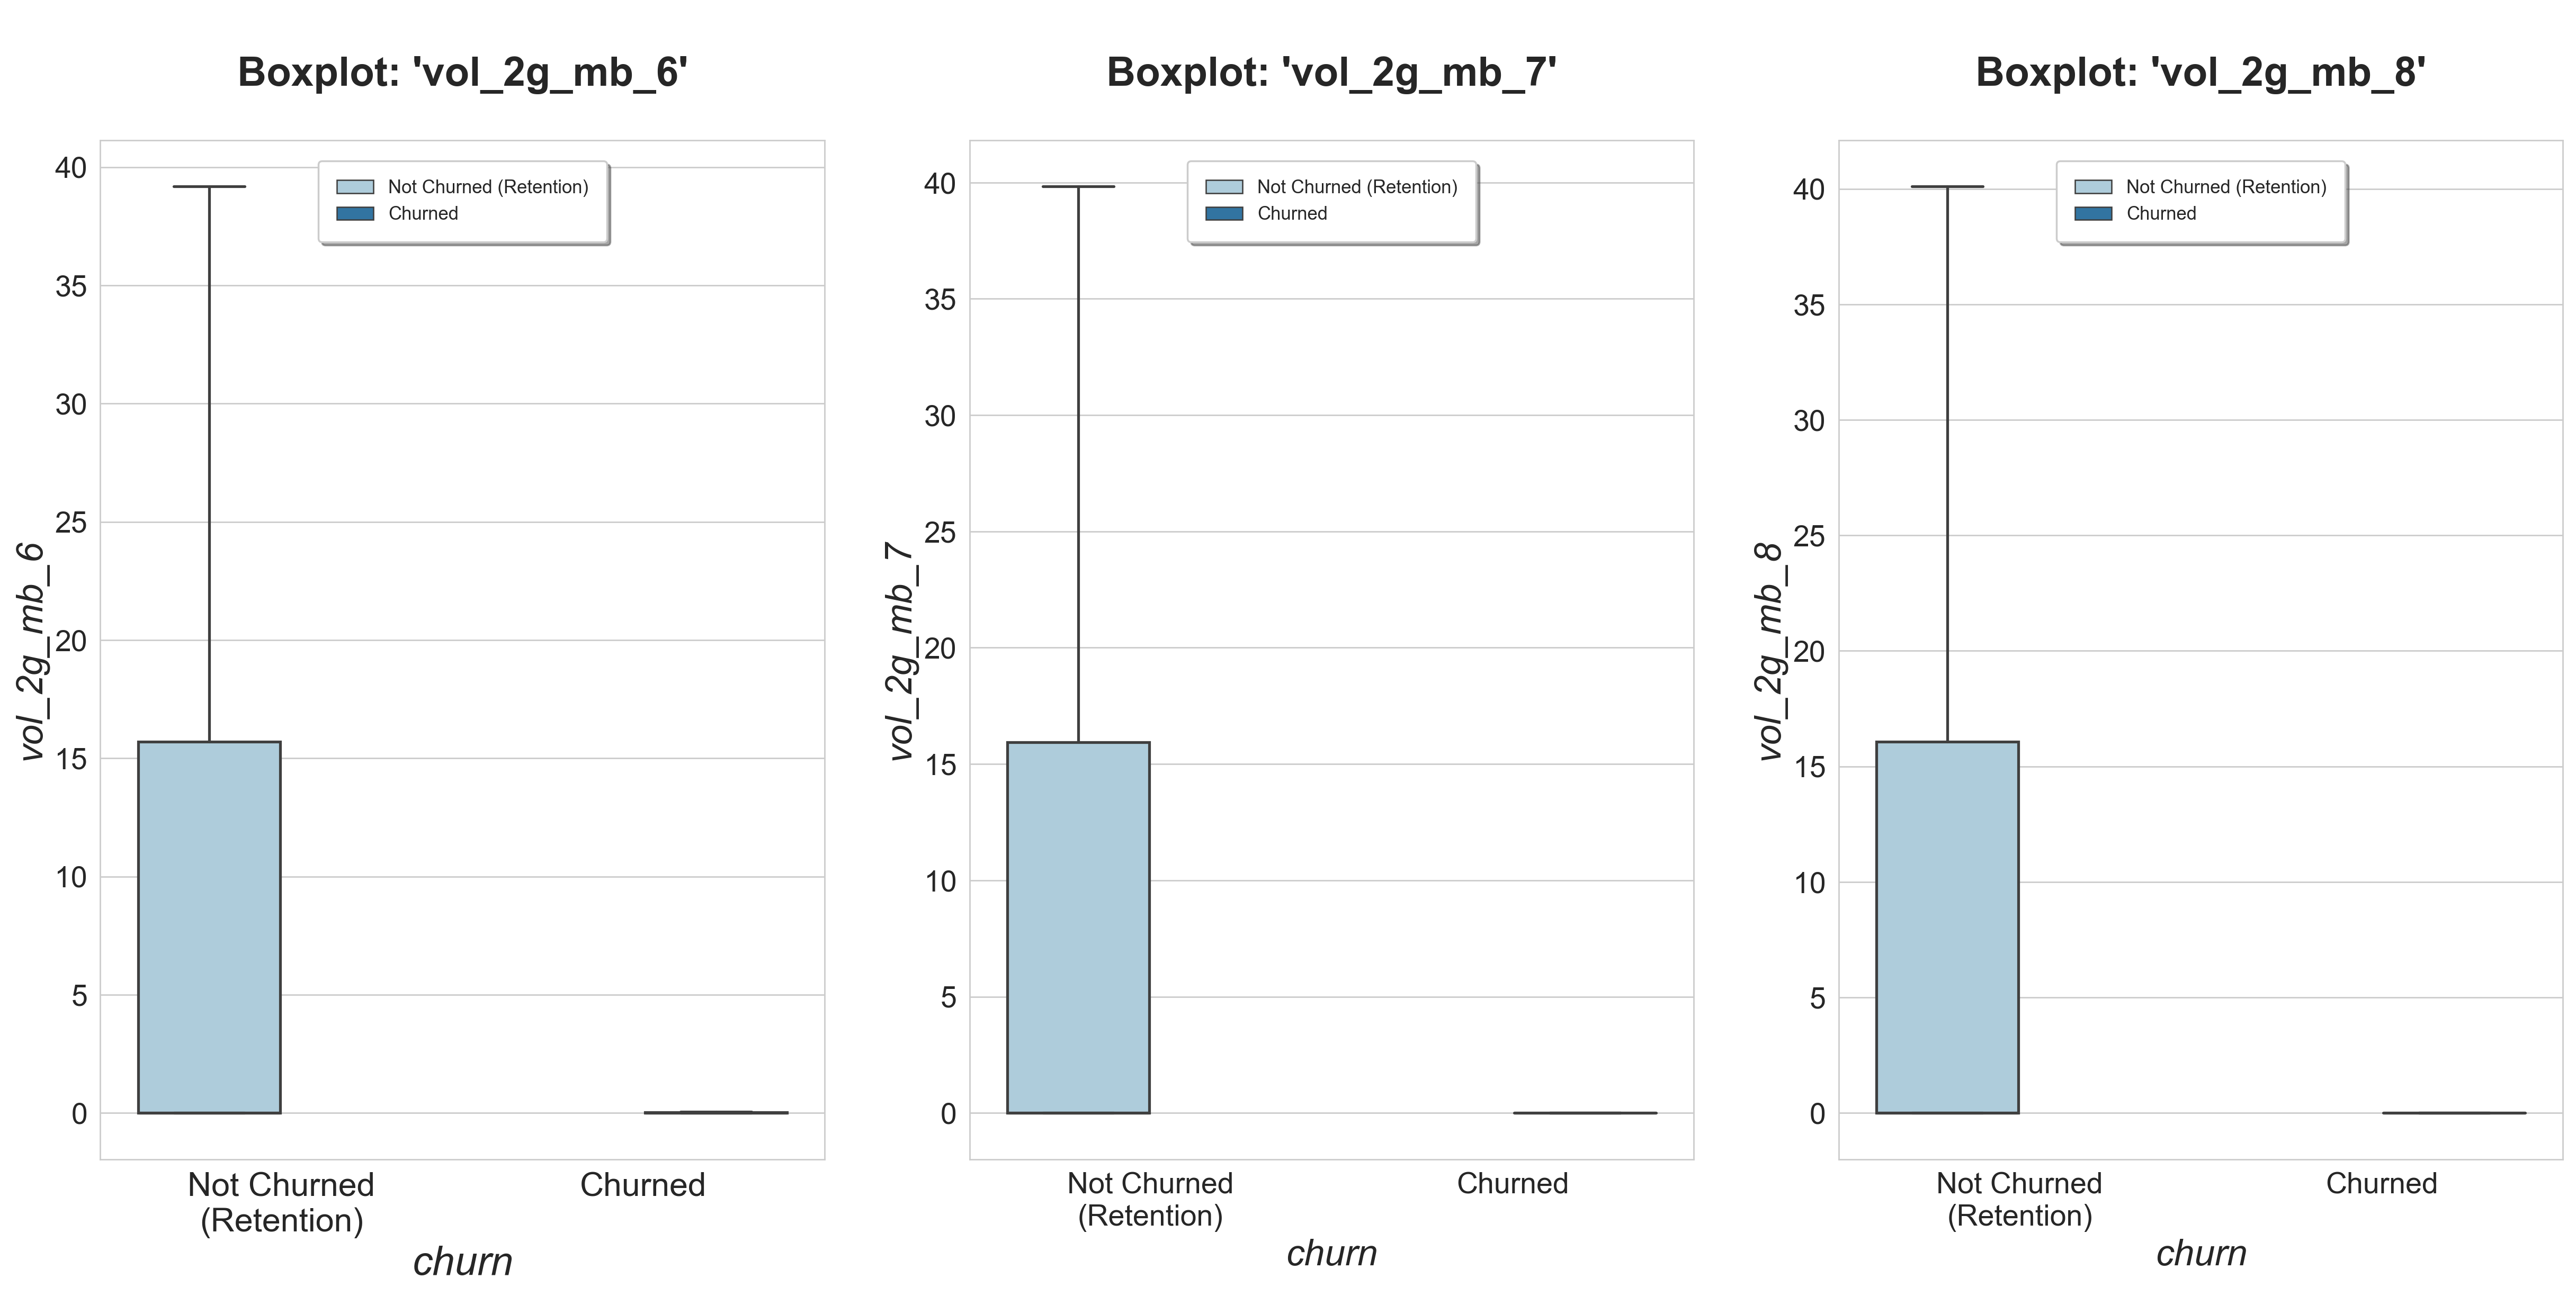

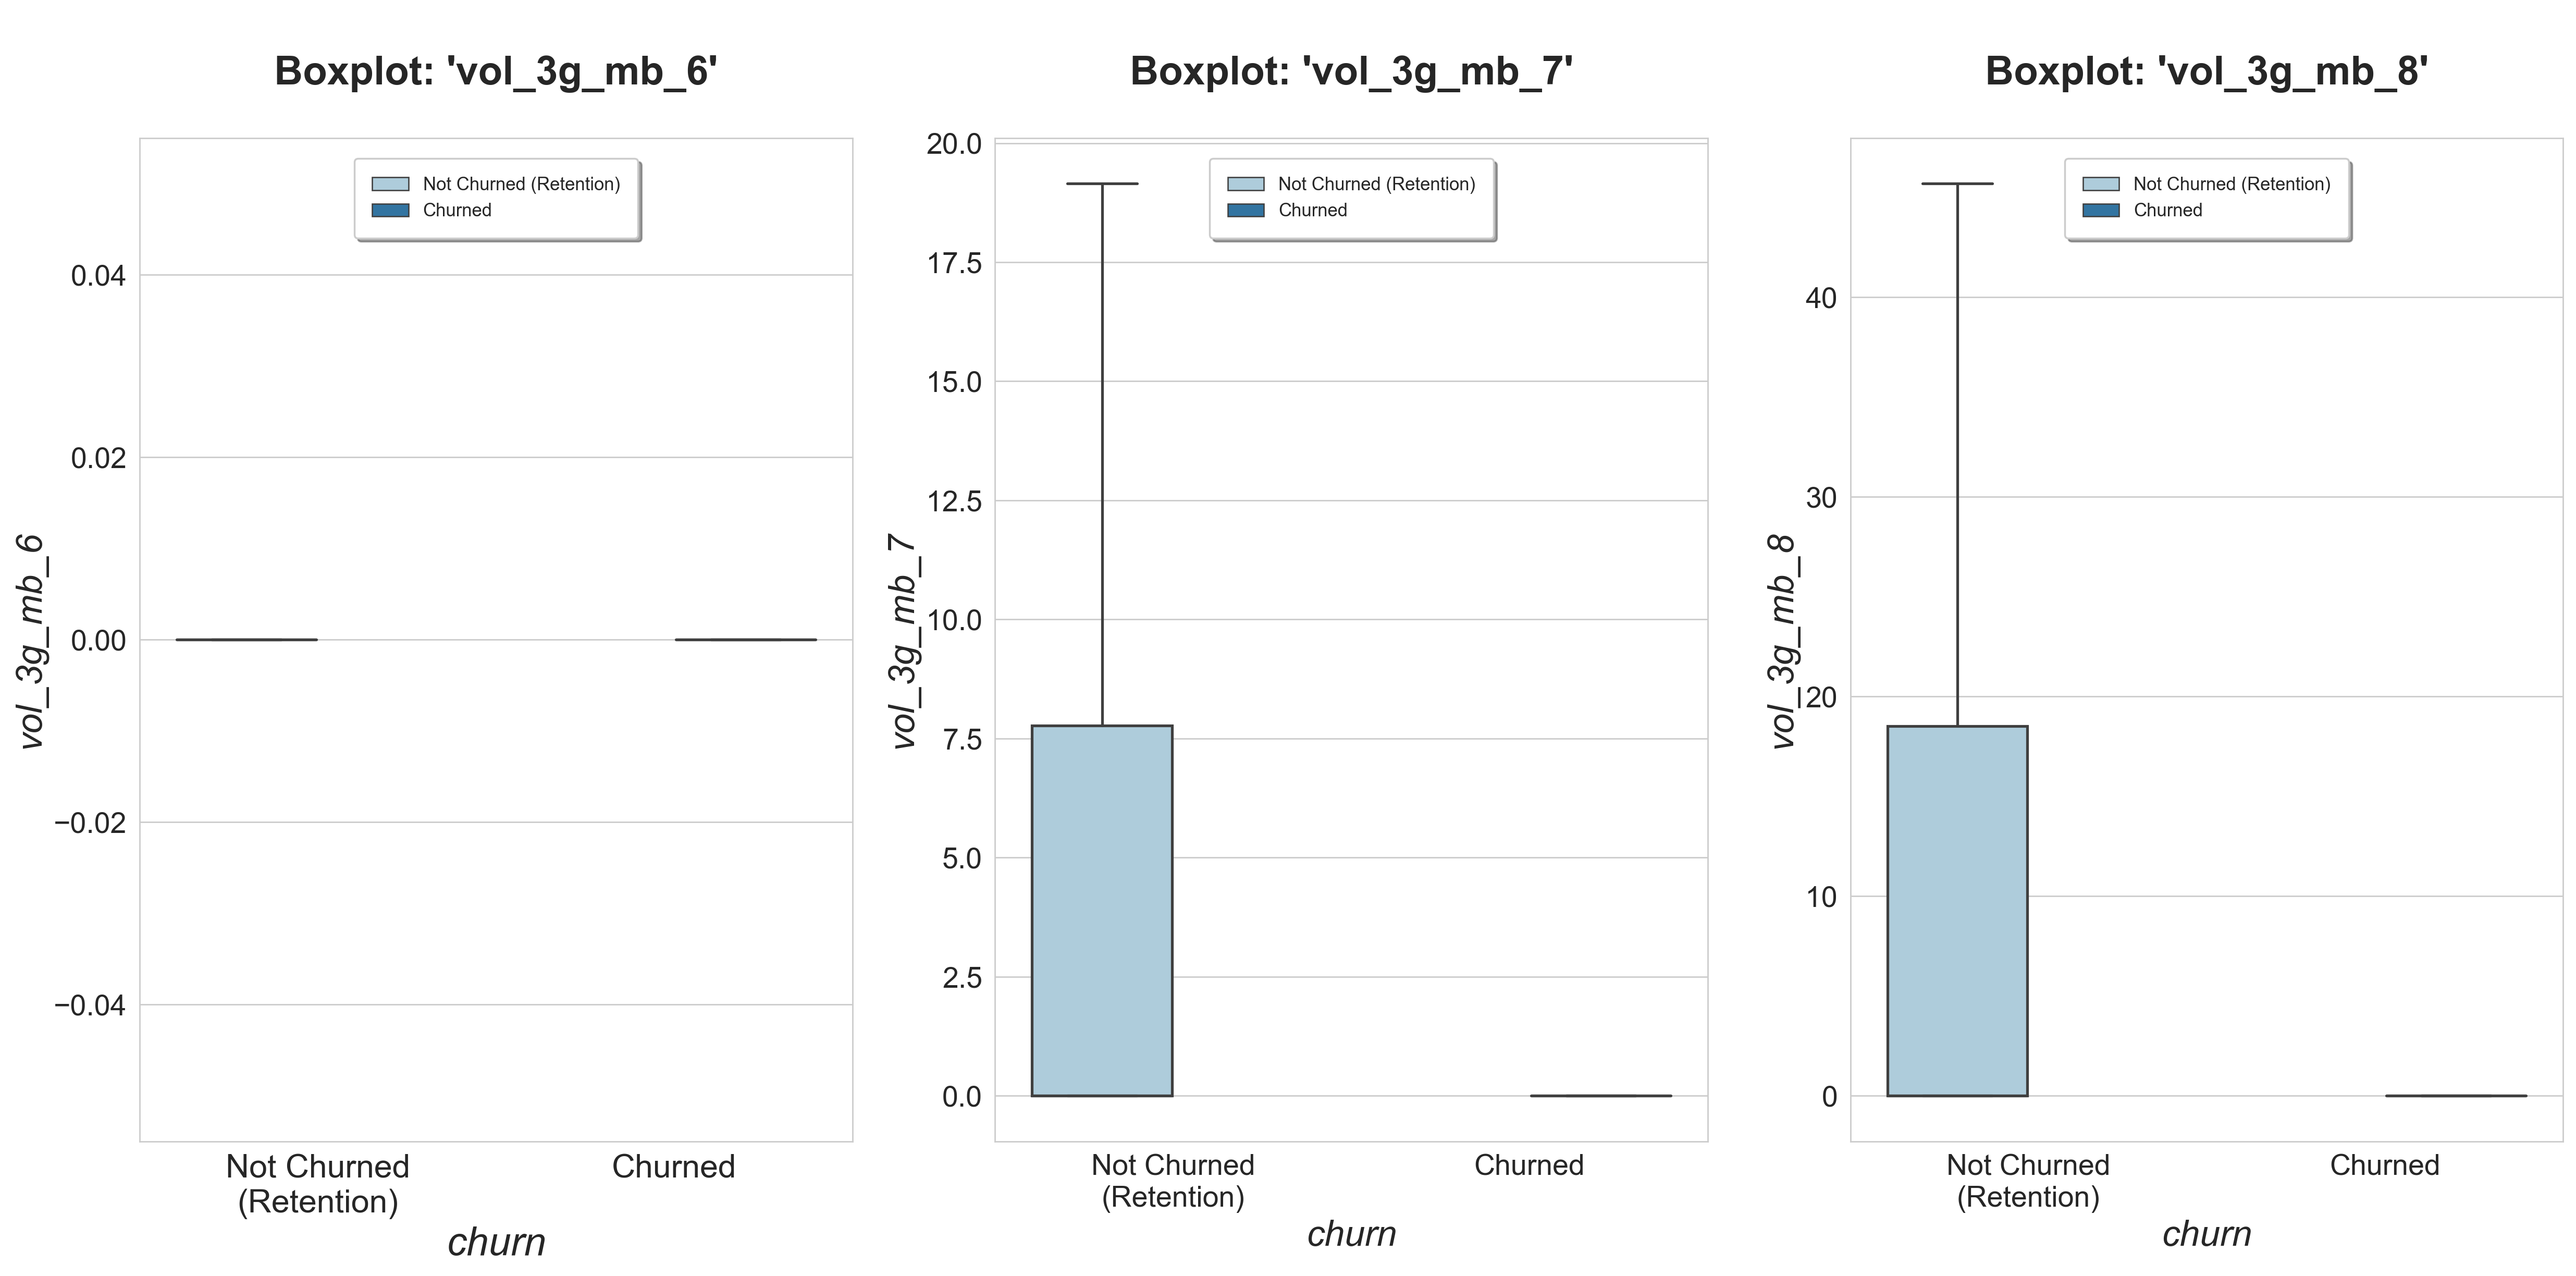

In [71]:
##Plotting volume of data usage:  

##Plotting volume of 2G data usage features:
plot_boxplots_6_7_8('vol_2g_mb')

##Plotting volume of 3G data usage features:
plot_boxplots_6_7_8('vol_3g_mb')

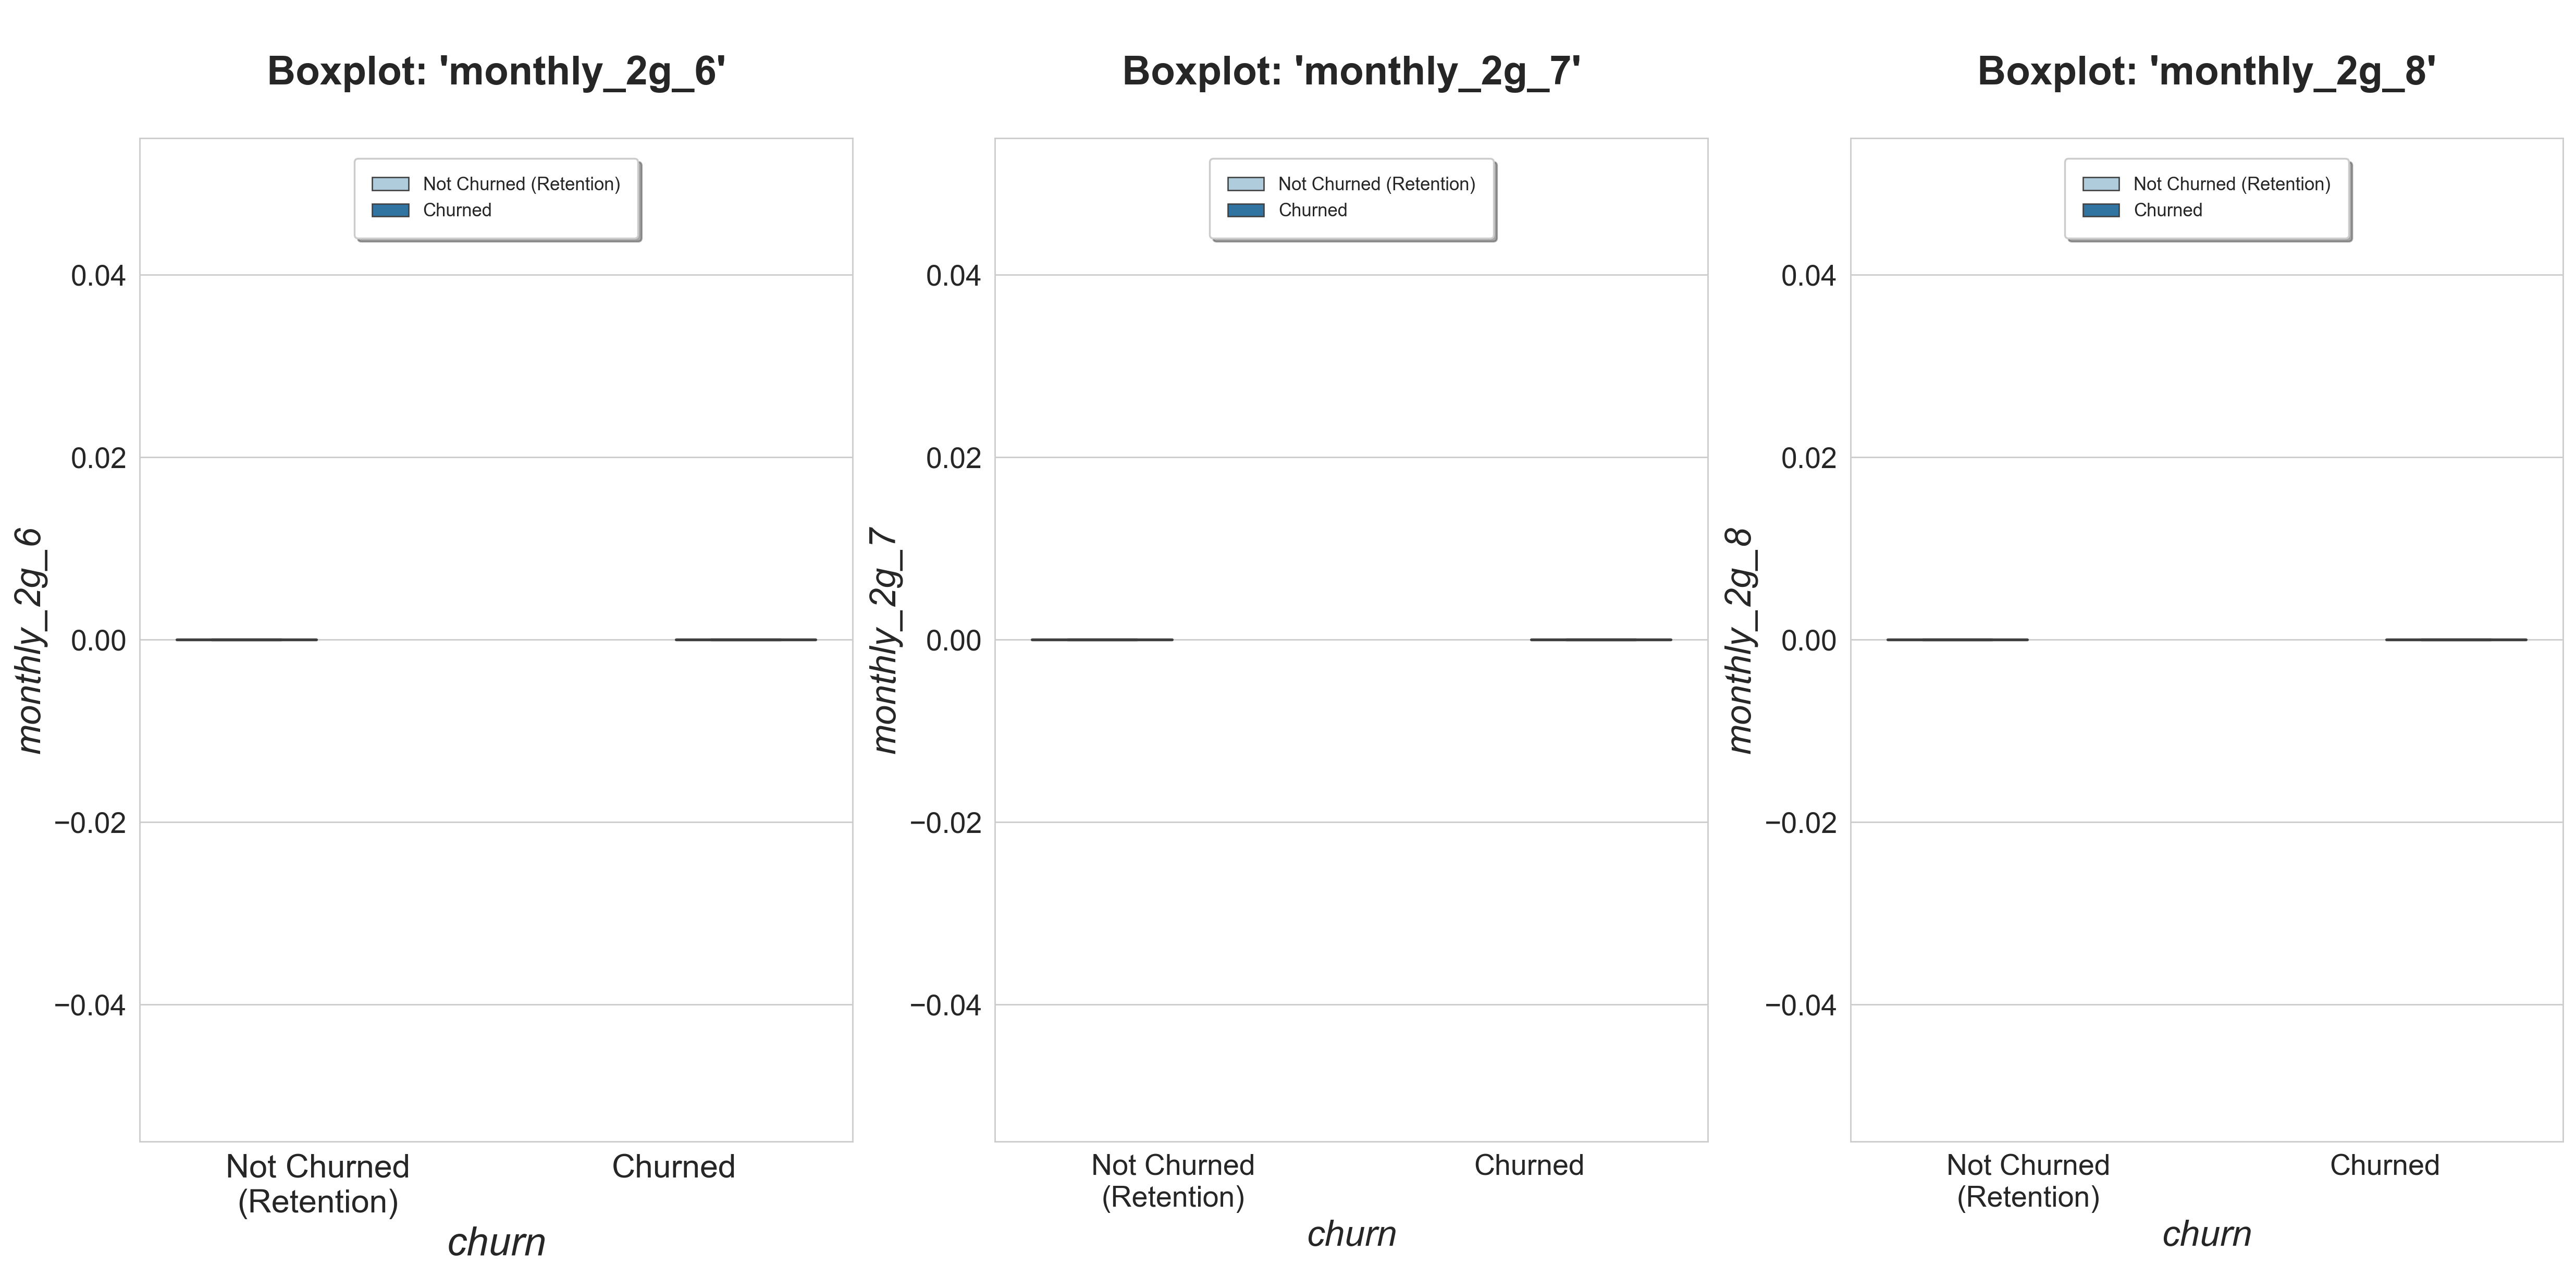

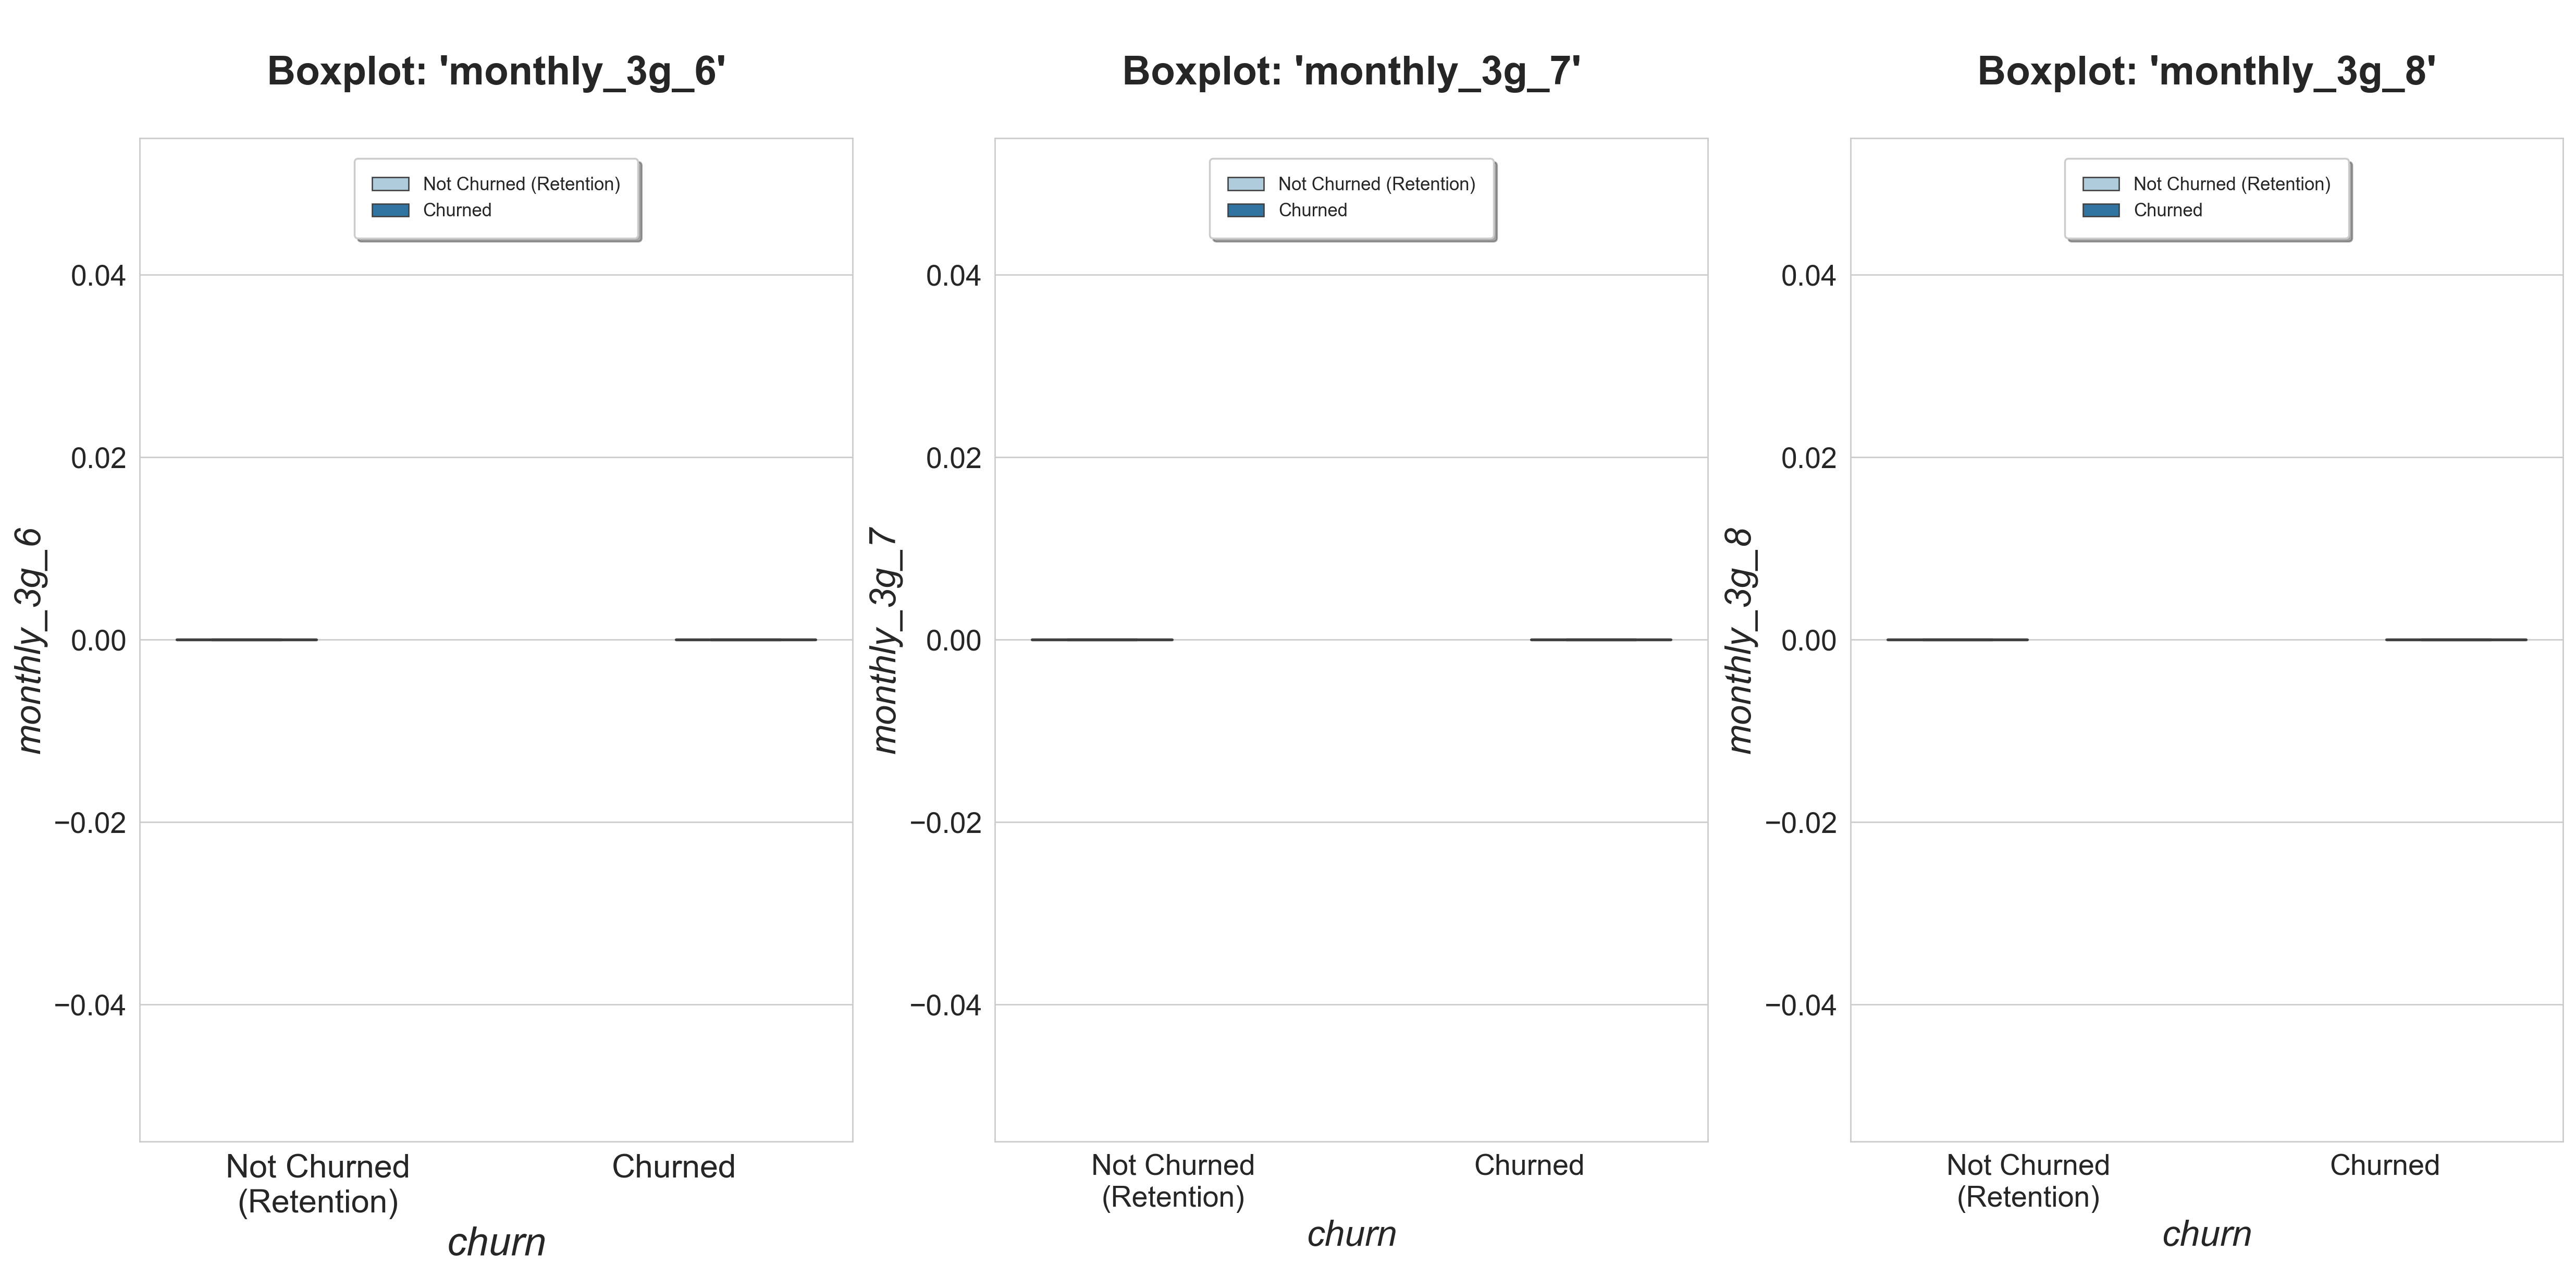

In [72]:
##Checking data trend in monthly service schemes for 2g and 3g data: 'monthly_2g' and 'monthly_3g' features. Plotting boxplots.

plot_boxplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_boxplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

In [73]:
##Since the range is very small and no trend can be seen, let's use barplot

##Defining a function for barplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
##(0: Not Churned (Retention), 1: Churned)

def plot_barplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()
    
    plt.subplot(1,3,1)
    ax_11= sns.barplot(data=df, y=feature+"_6", x=df["churn"], hue="churn", palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22= sns.barplot(data=df, y=feature+"_7", x=df["churn"], hue="churn", palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,3)
    ax_33= sns.barplot(data=df, y=feature+"_8", x=df["churn"], hue="churn", palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

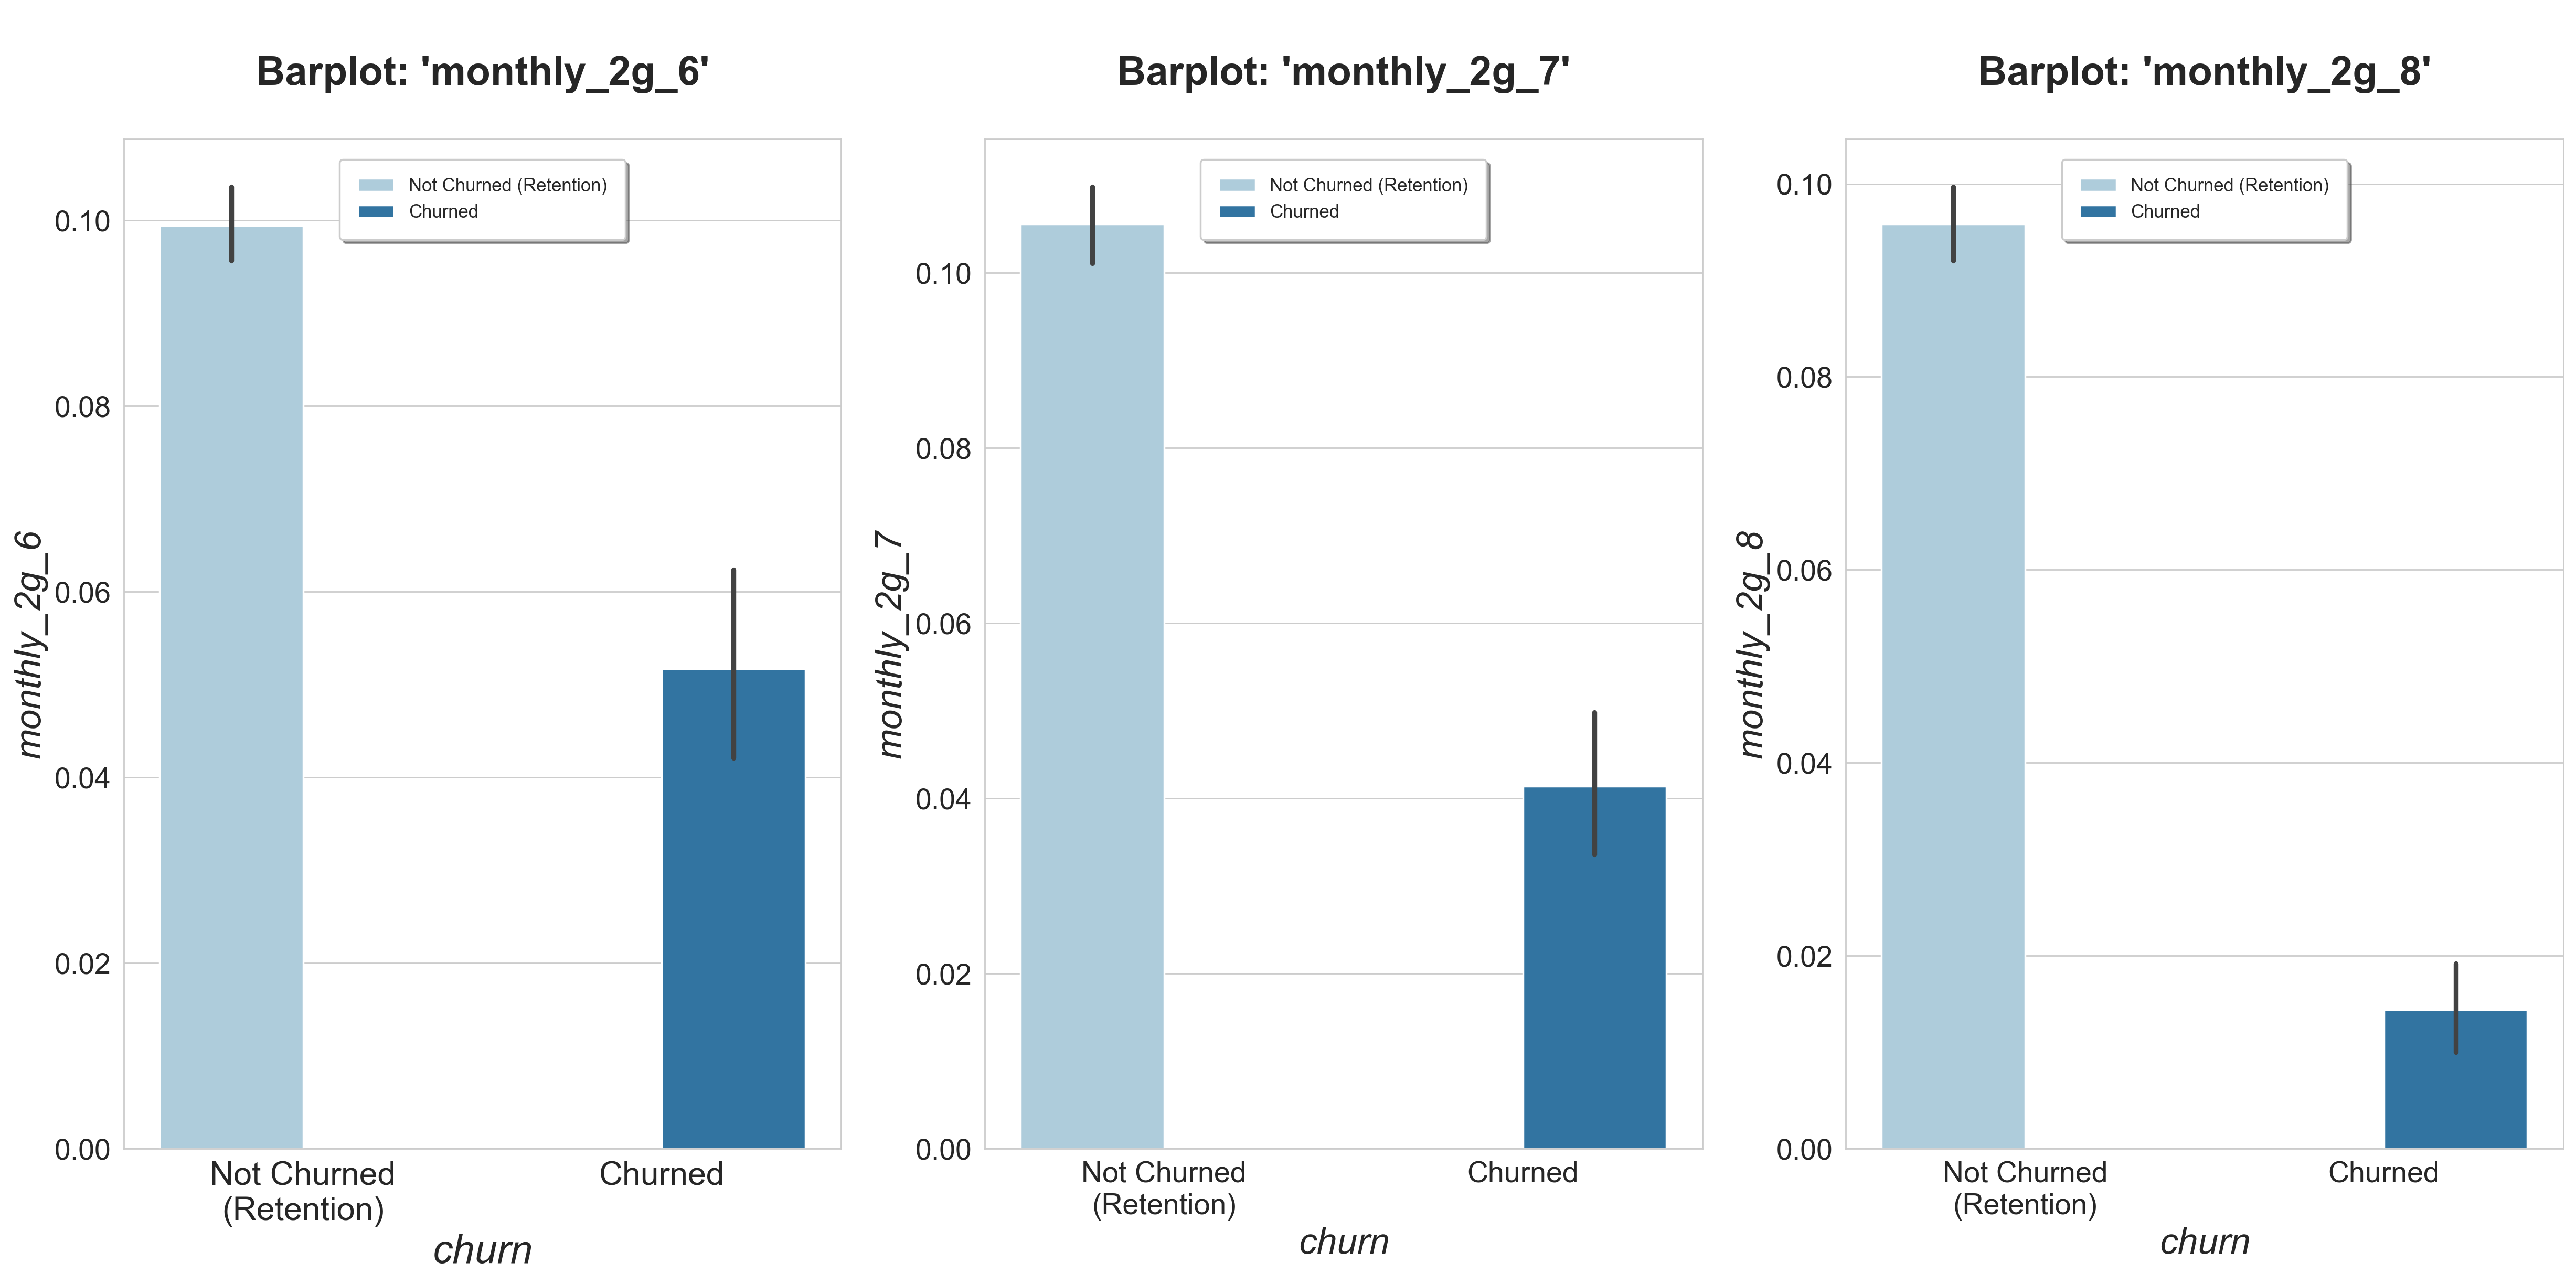

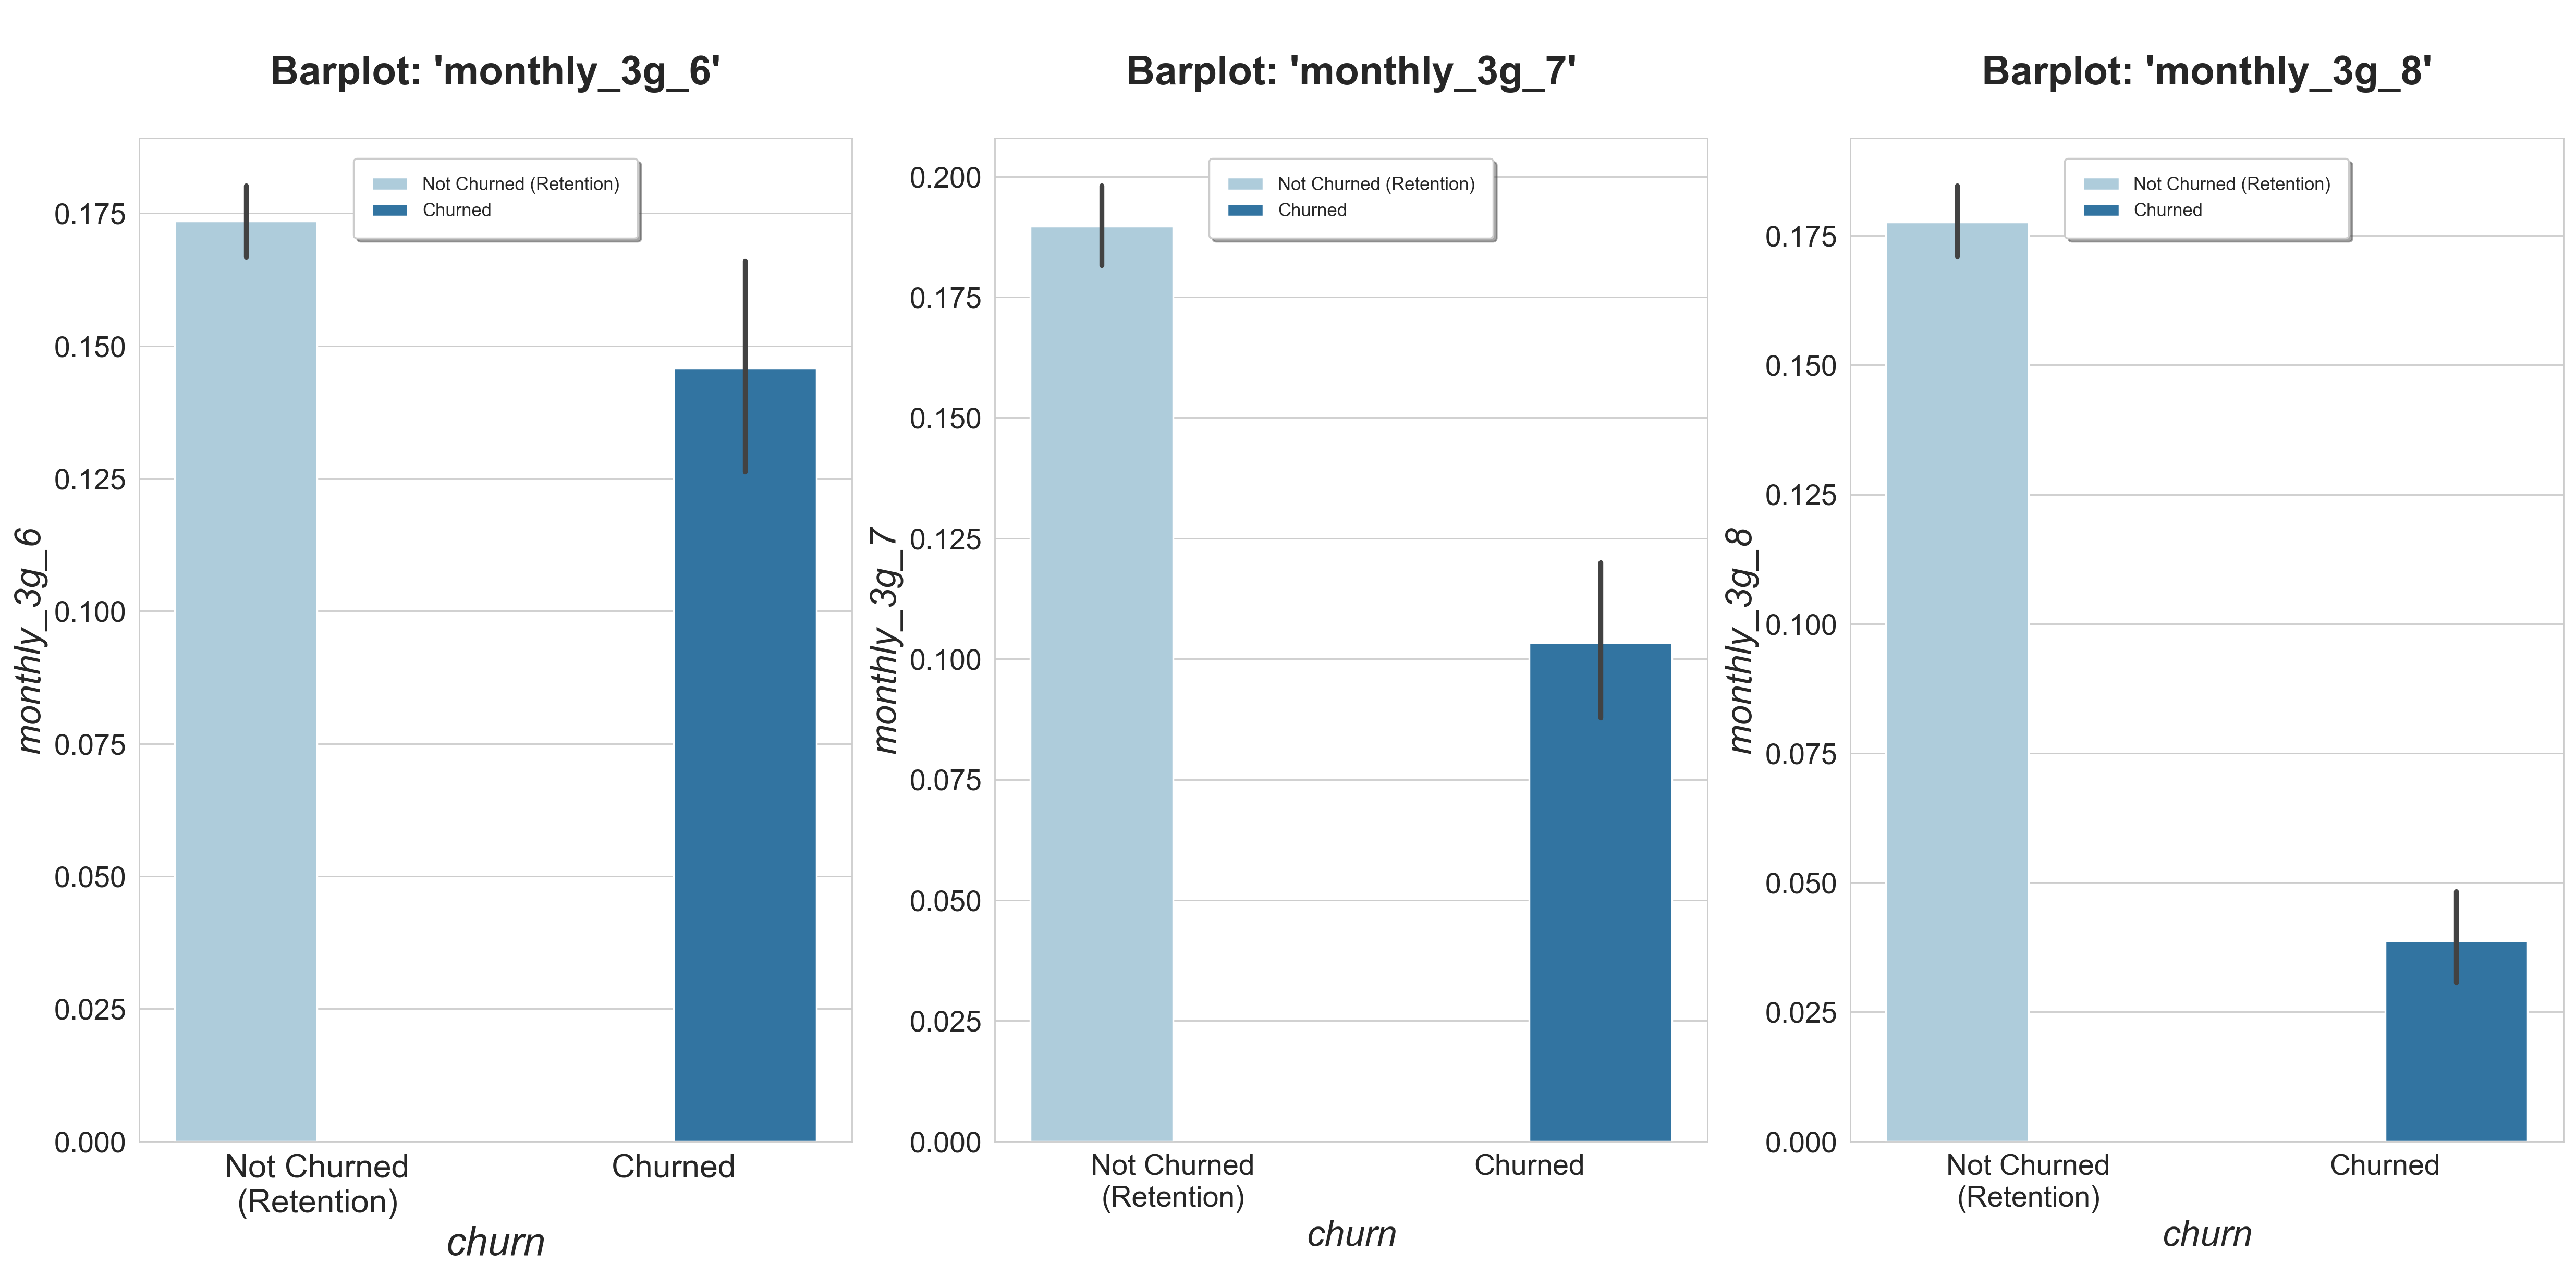

In [74]:
#Barplots for 'monthly_2g' and 'monthly_3g' usage check
plot_barplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_barplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

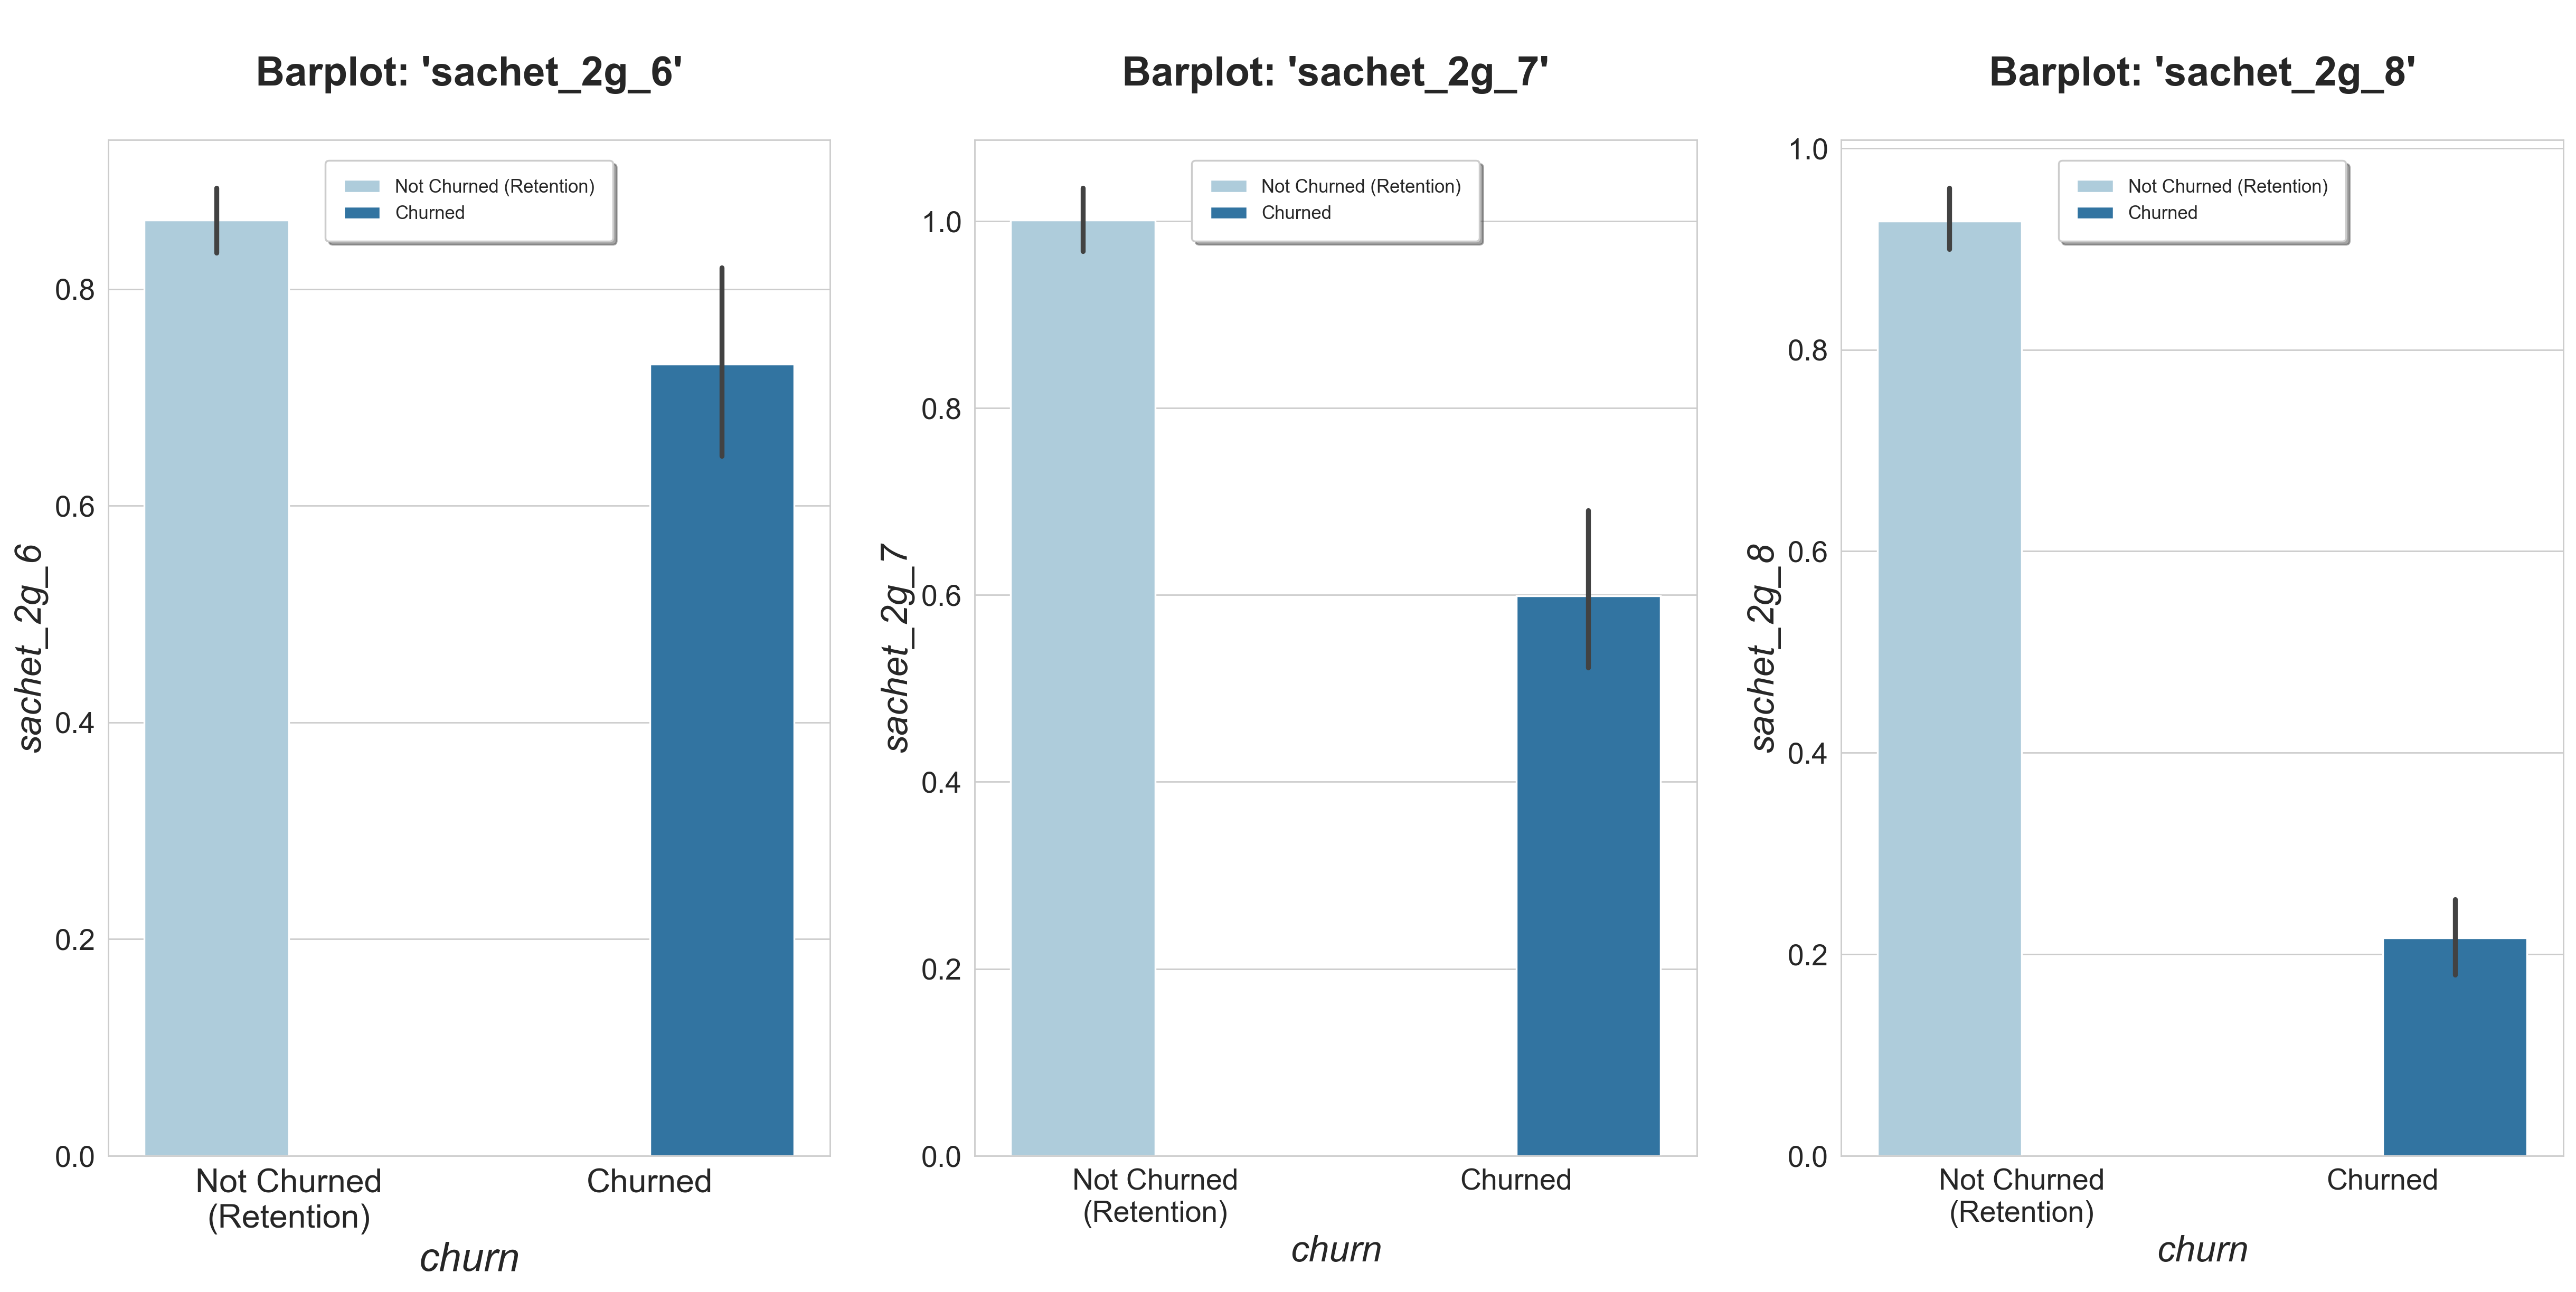

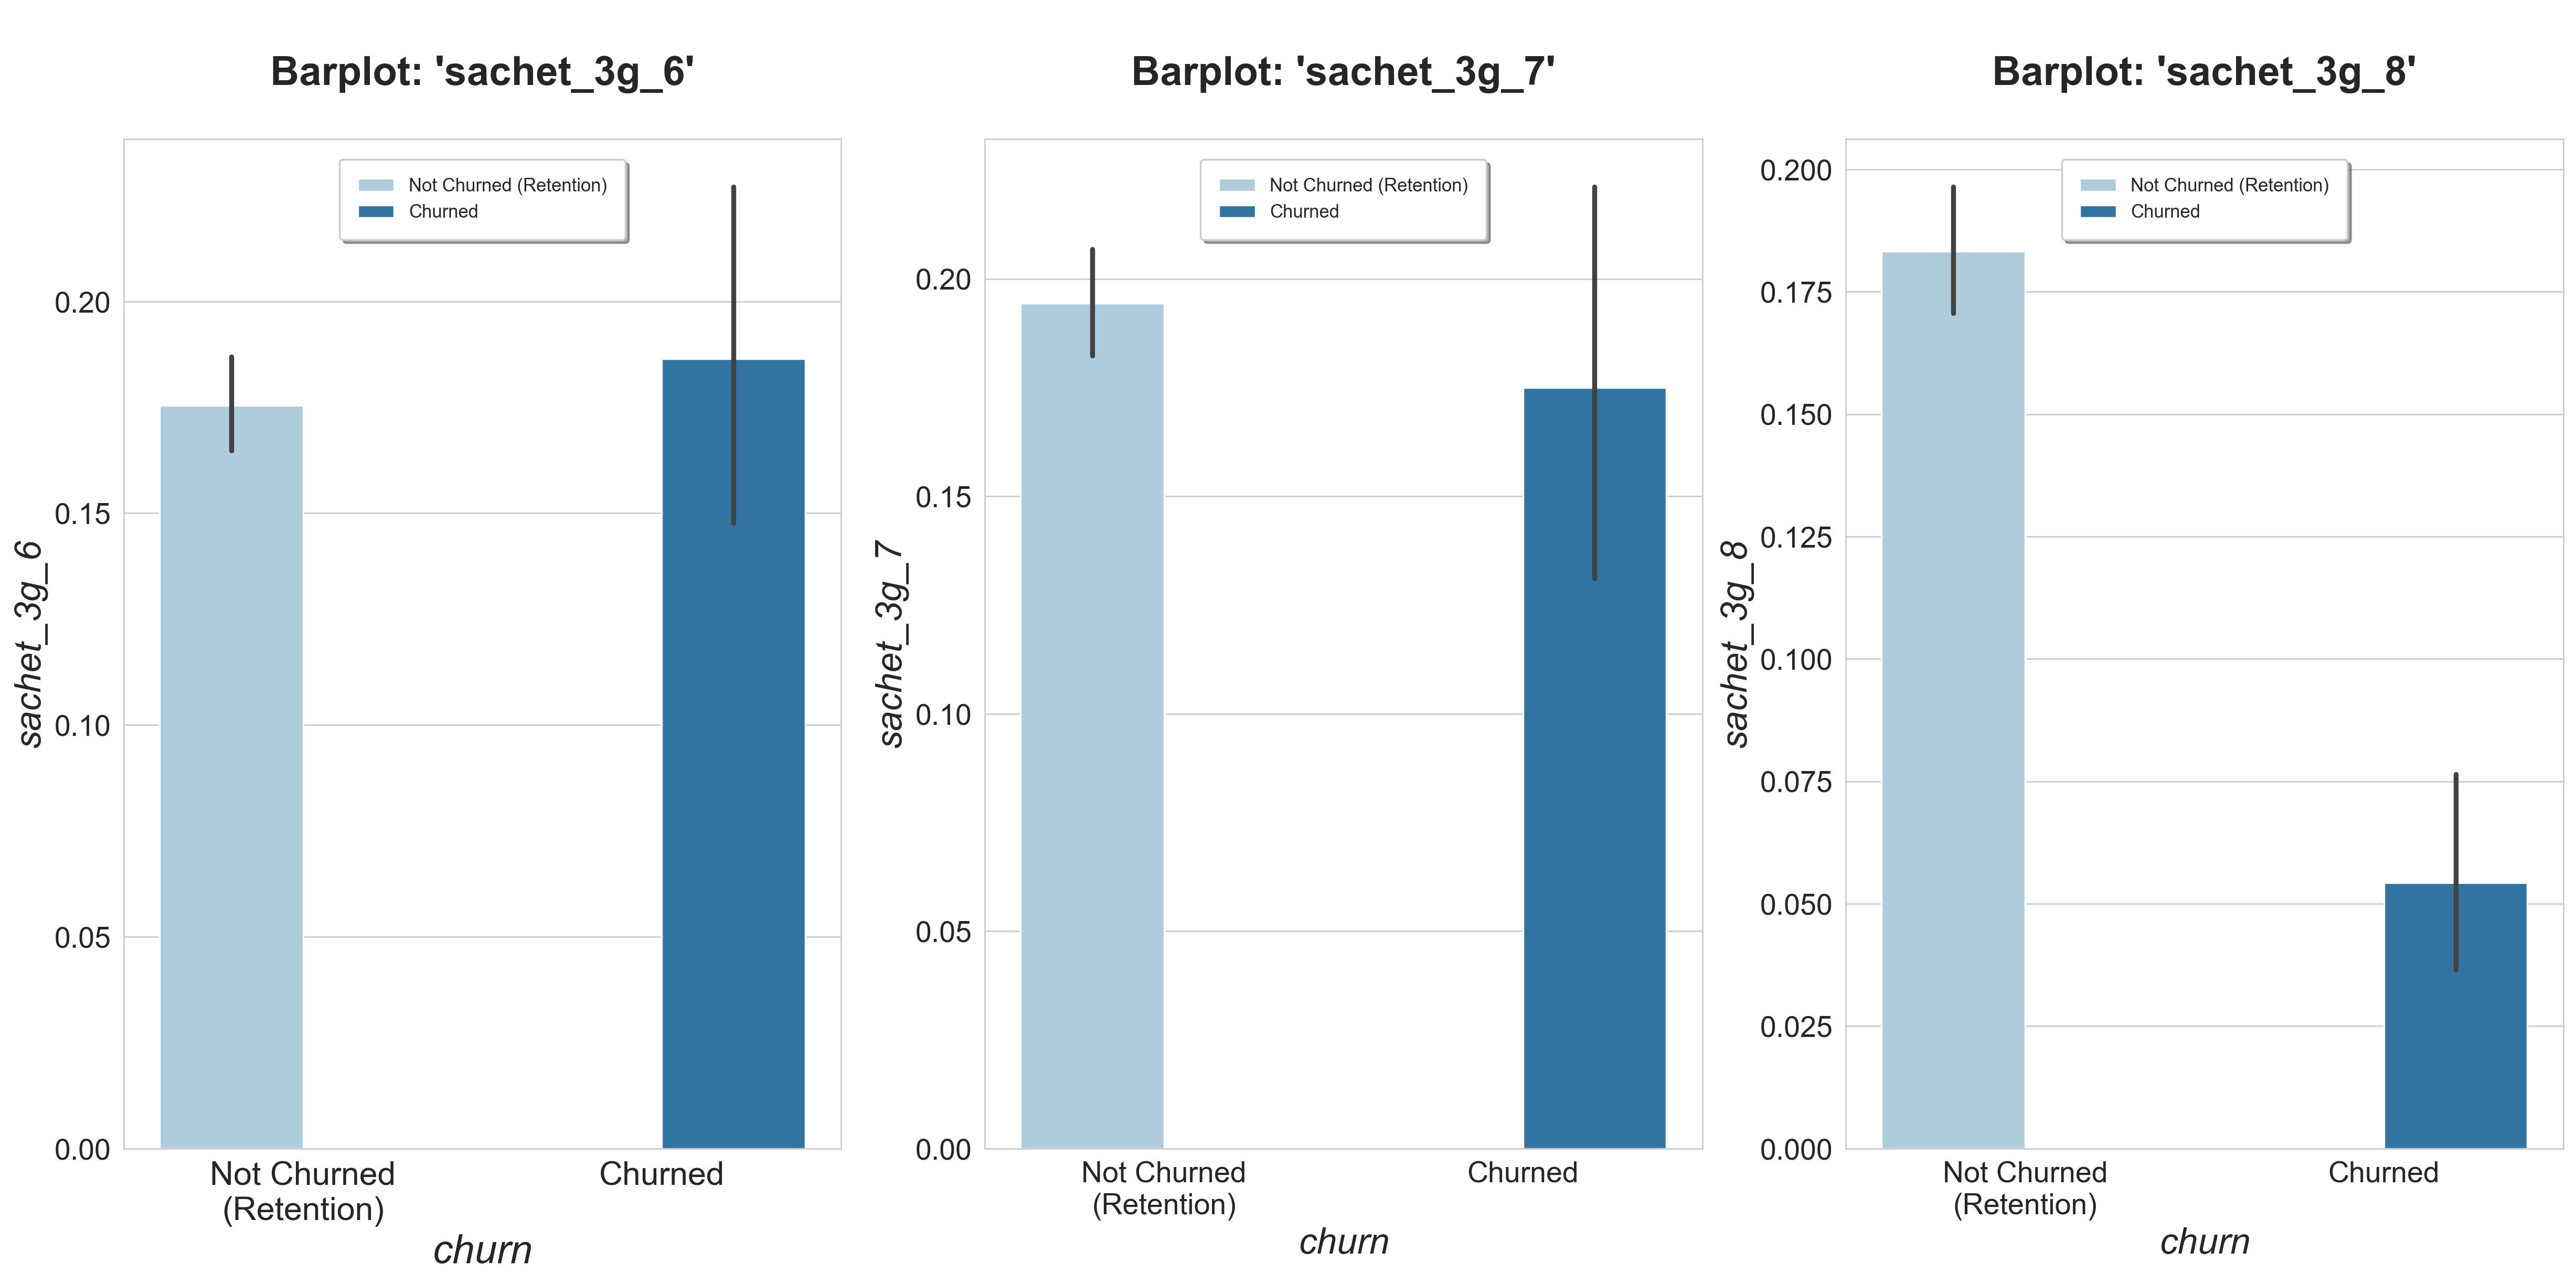

In [75]:
##Checking service schemes with validity smaller than a month for 2G/3G (sachet_2g') and ('sachet_3g') features

plot_barplots_6_7_8('sachet_2g')  #sachet_2g (service schemes with validity smaller than a month): for all 3 months
plot_barplots_6_7_8('sachet_3g')   #sachet_3g (service schemes with validity smaller than a month): for all 3 months

In [76]:
##Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [77]:
##Rename vbc features to the desired format ending with month number
telecom_hv.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [78]:
##Recheck rename Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

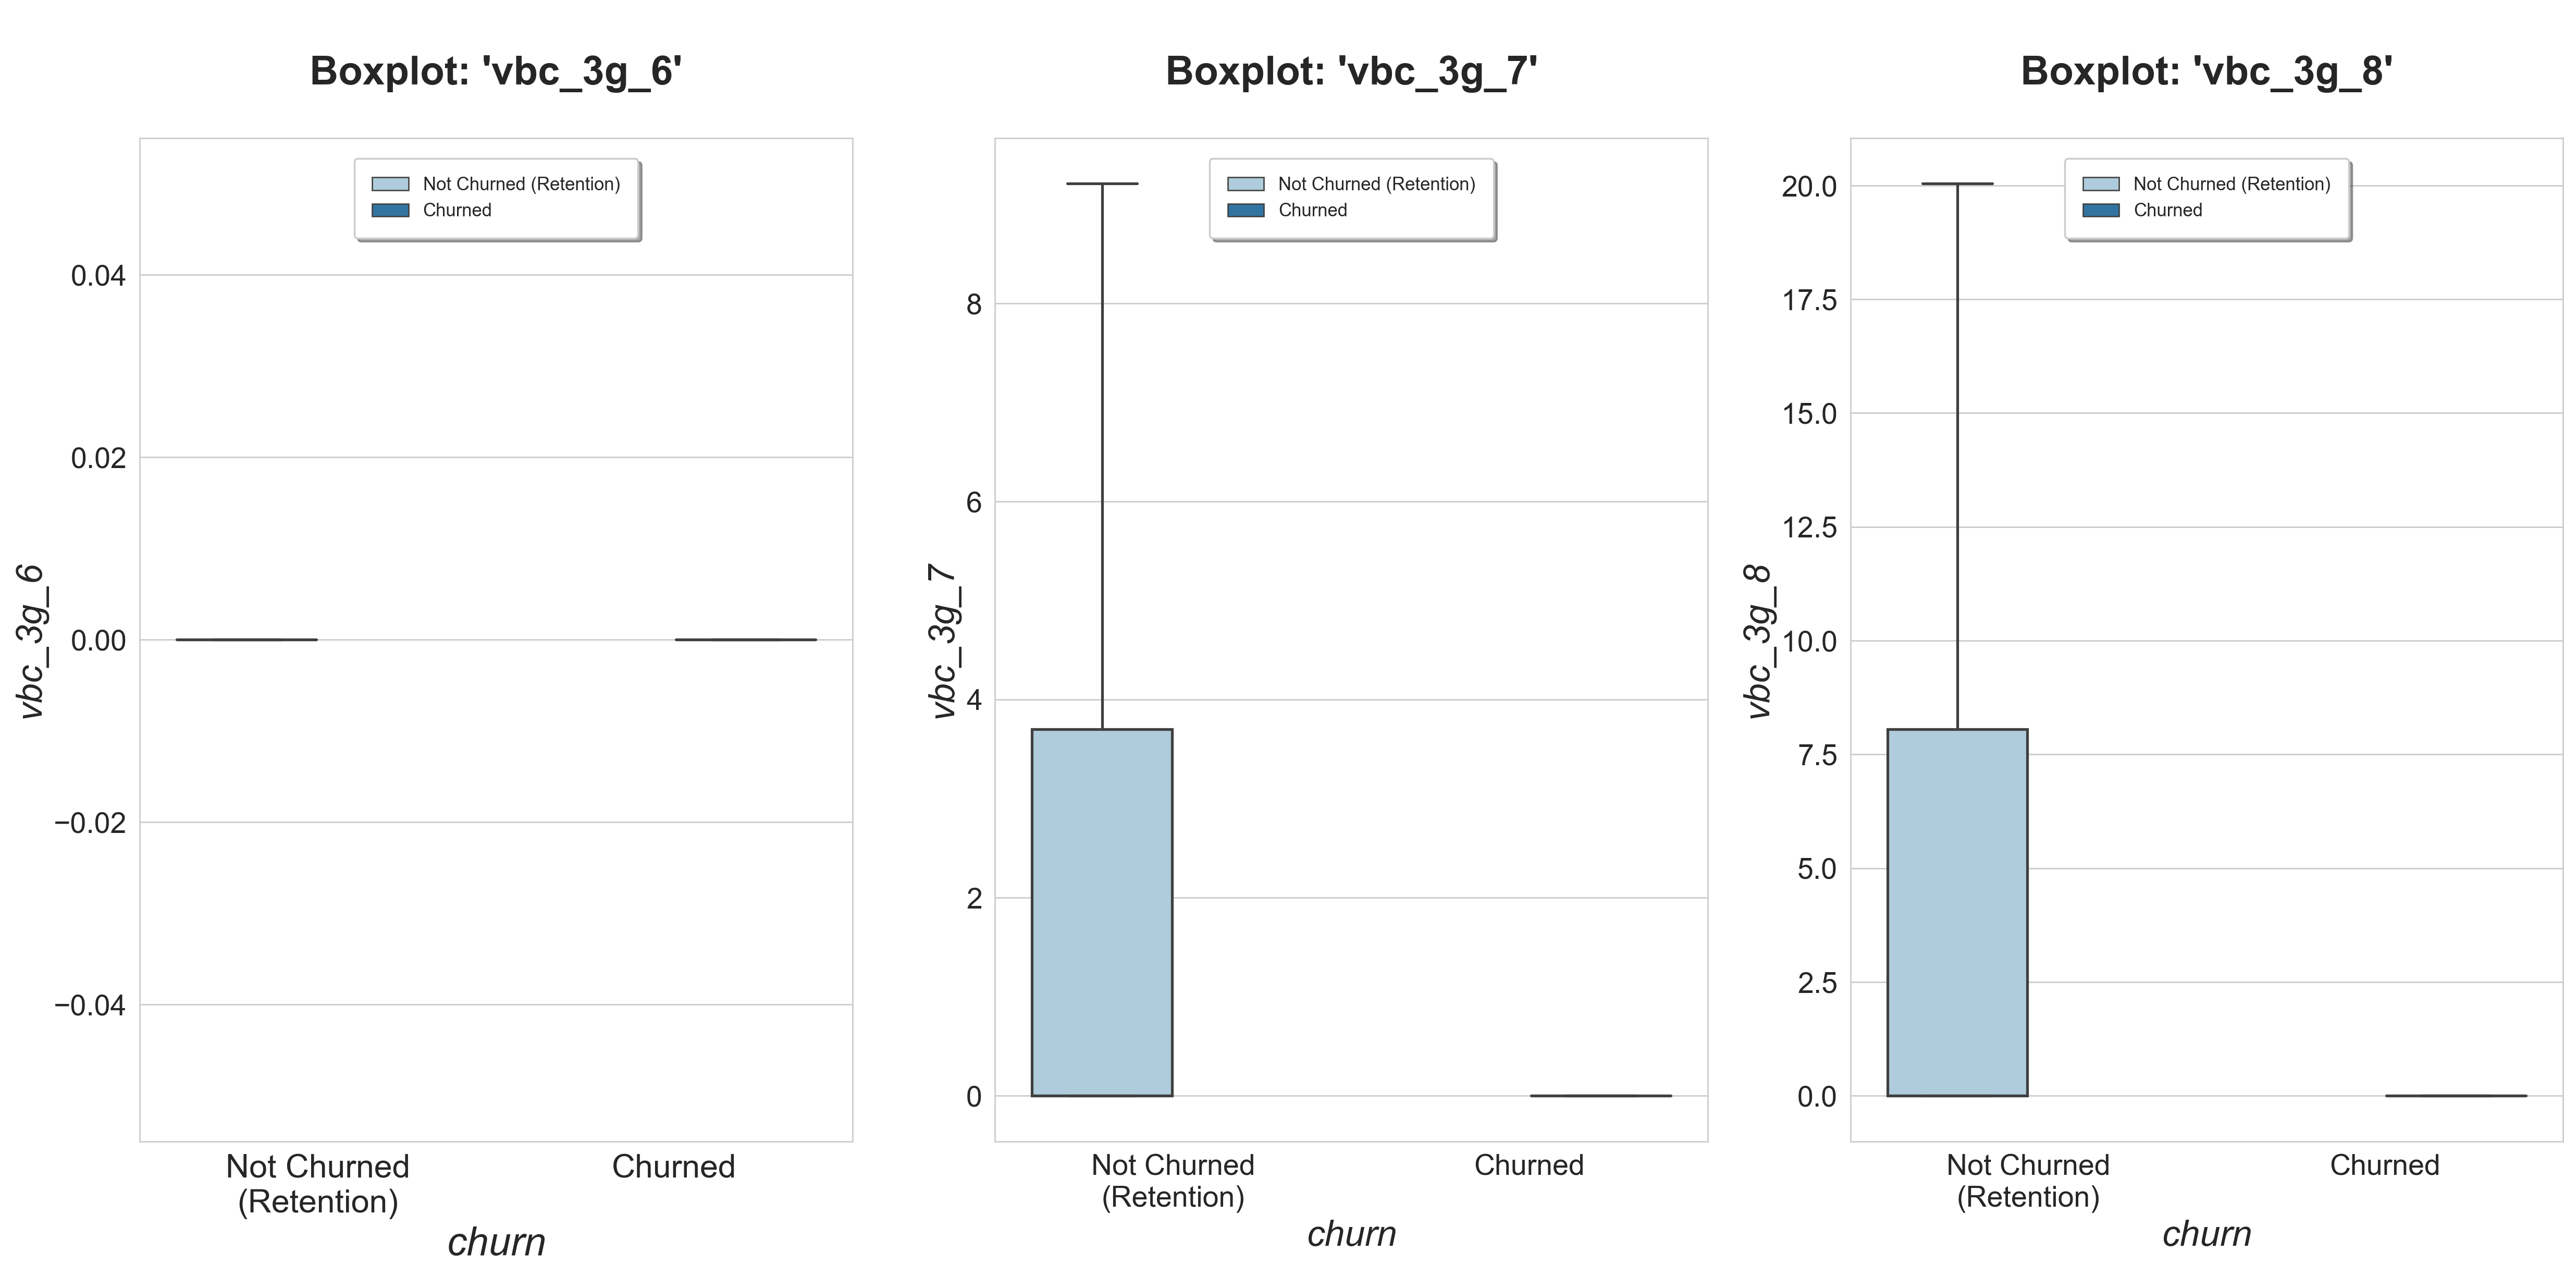

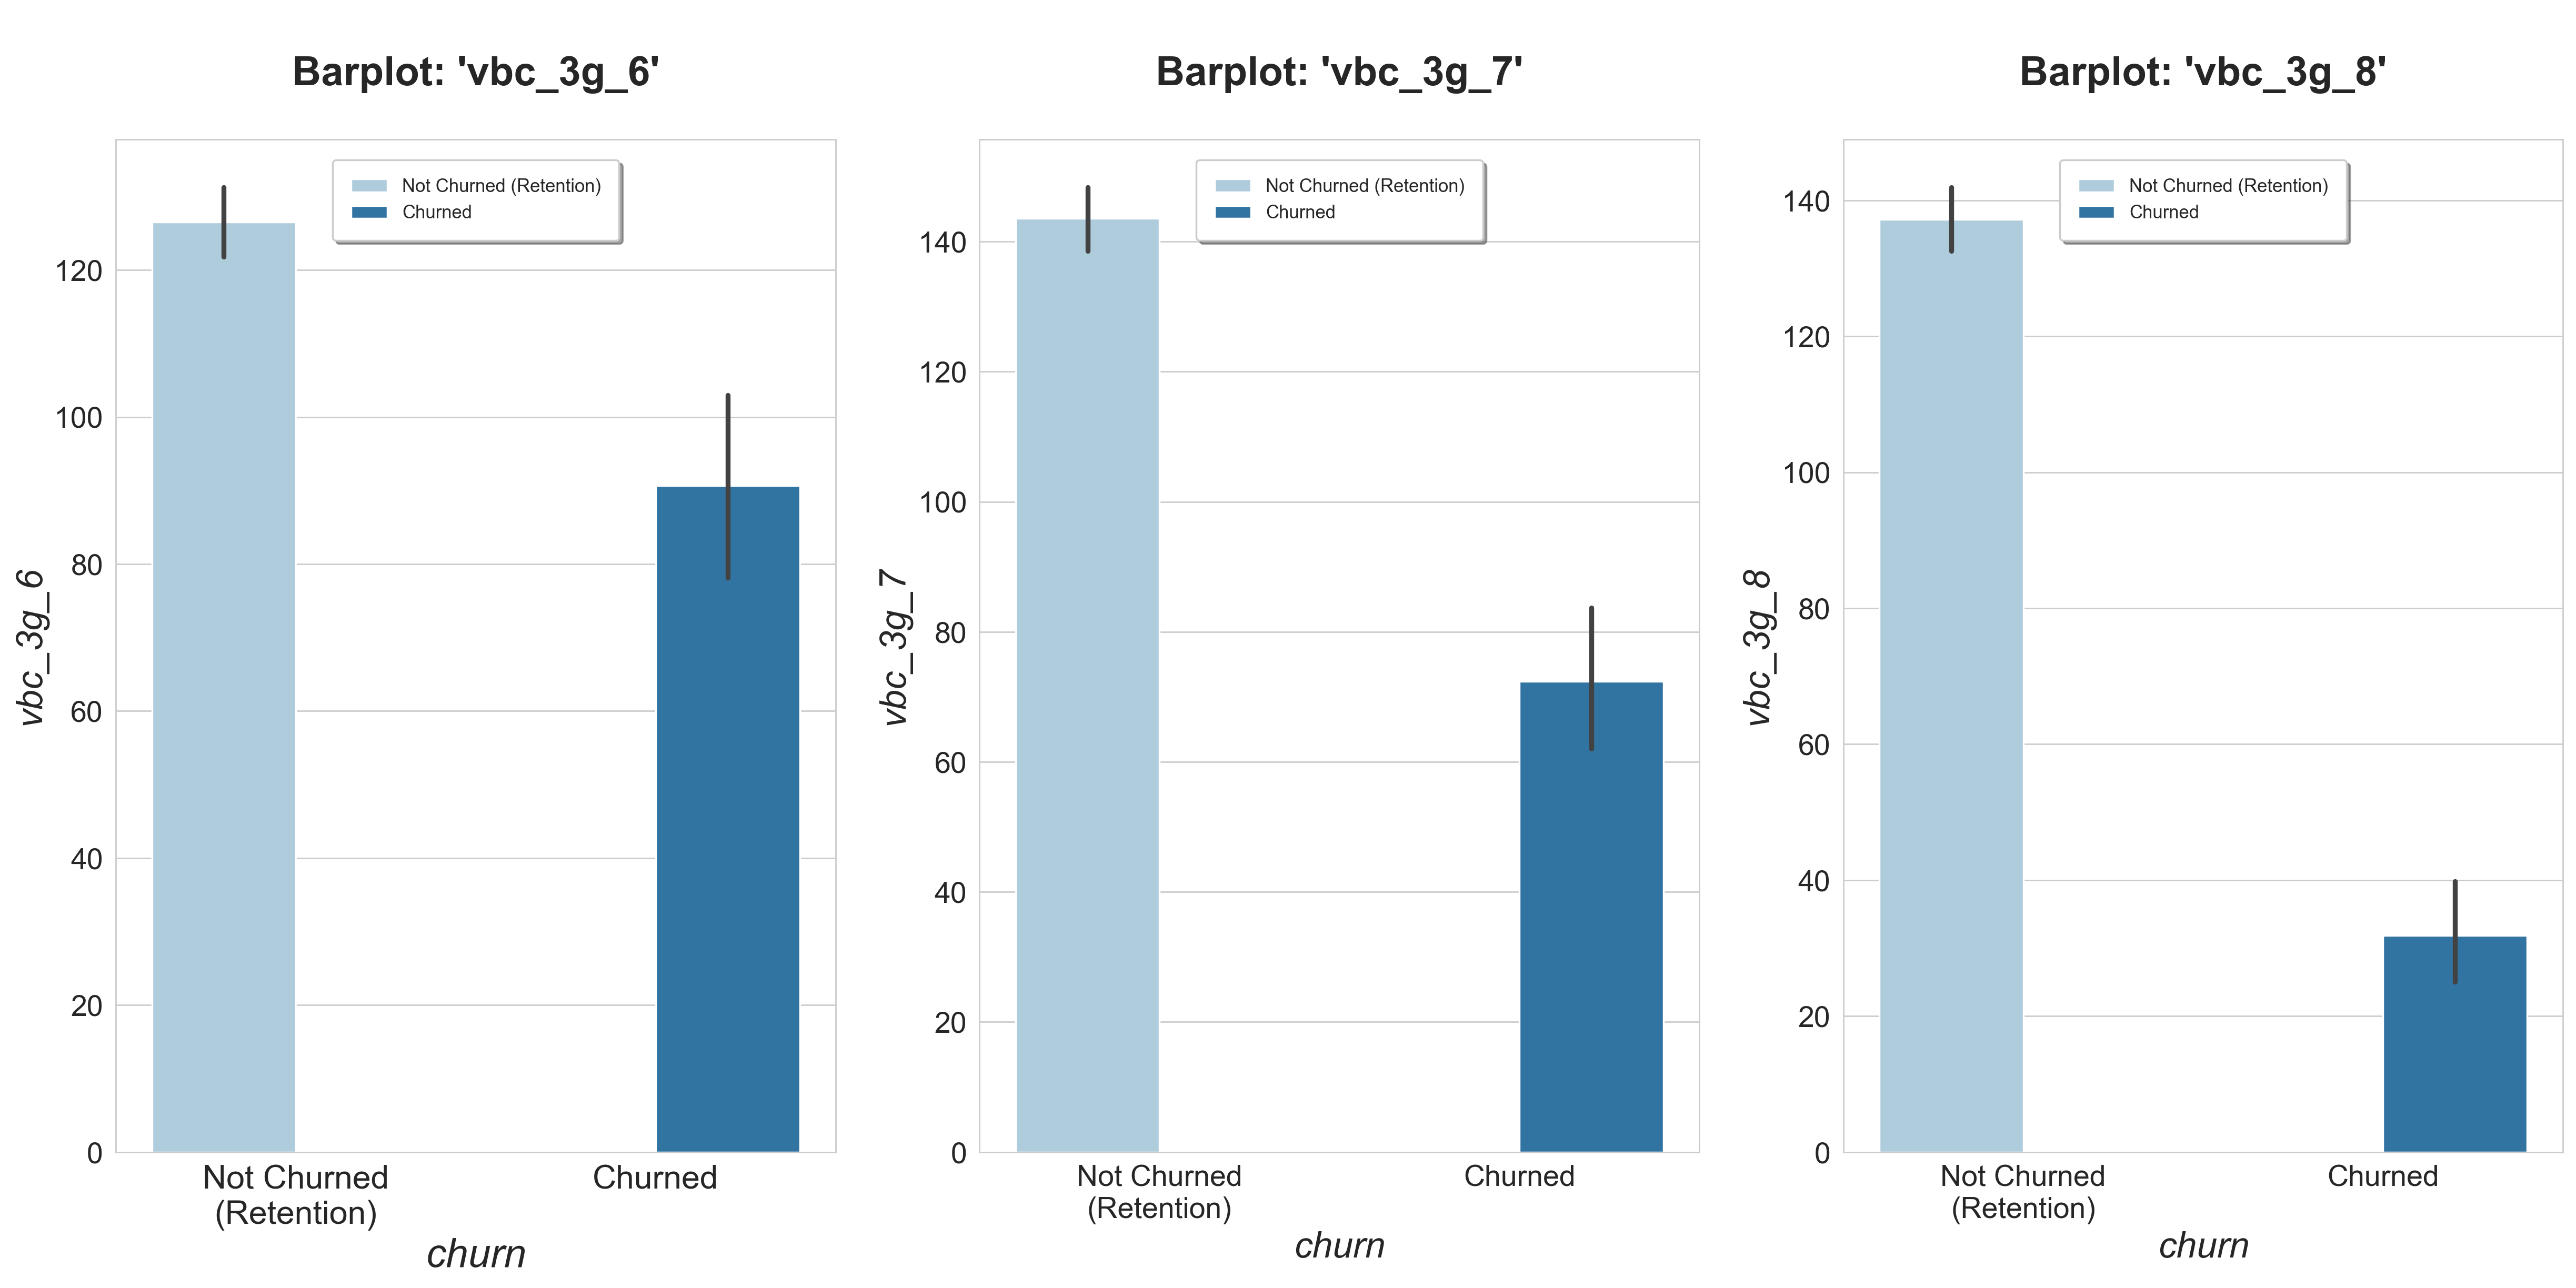

In [79]:
##Plotting boxplots and barplots for vbc based features
plot_boxplots_6_7_8('vbc_3g')
plot_barplots_6_7_8('vbc_3g')

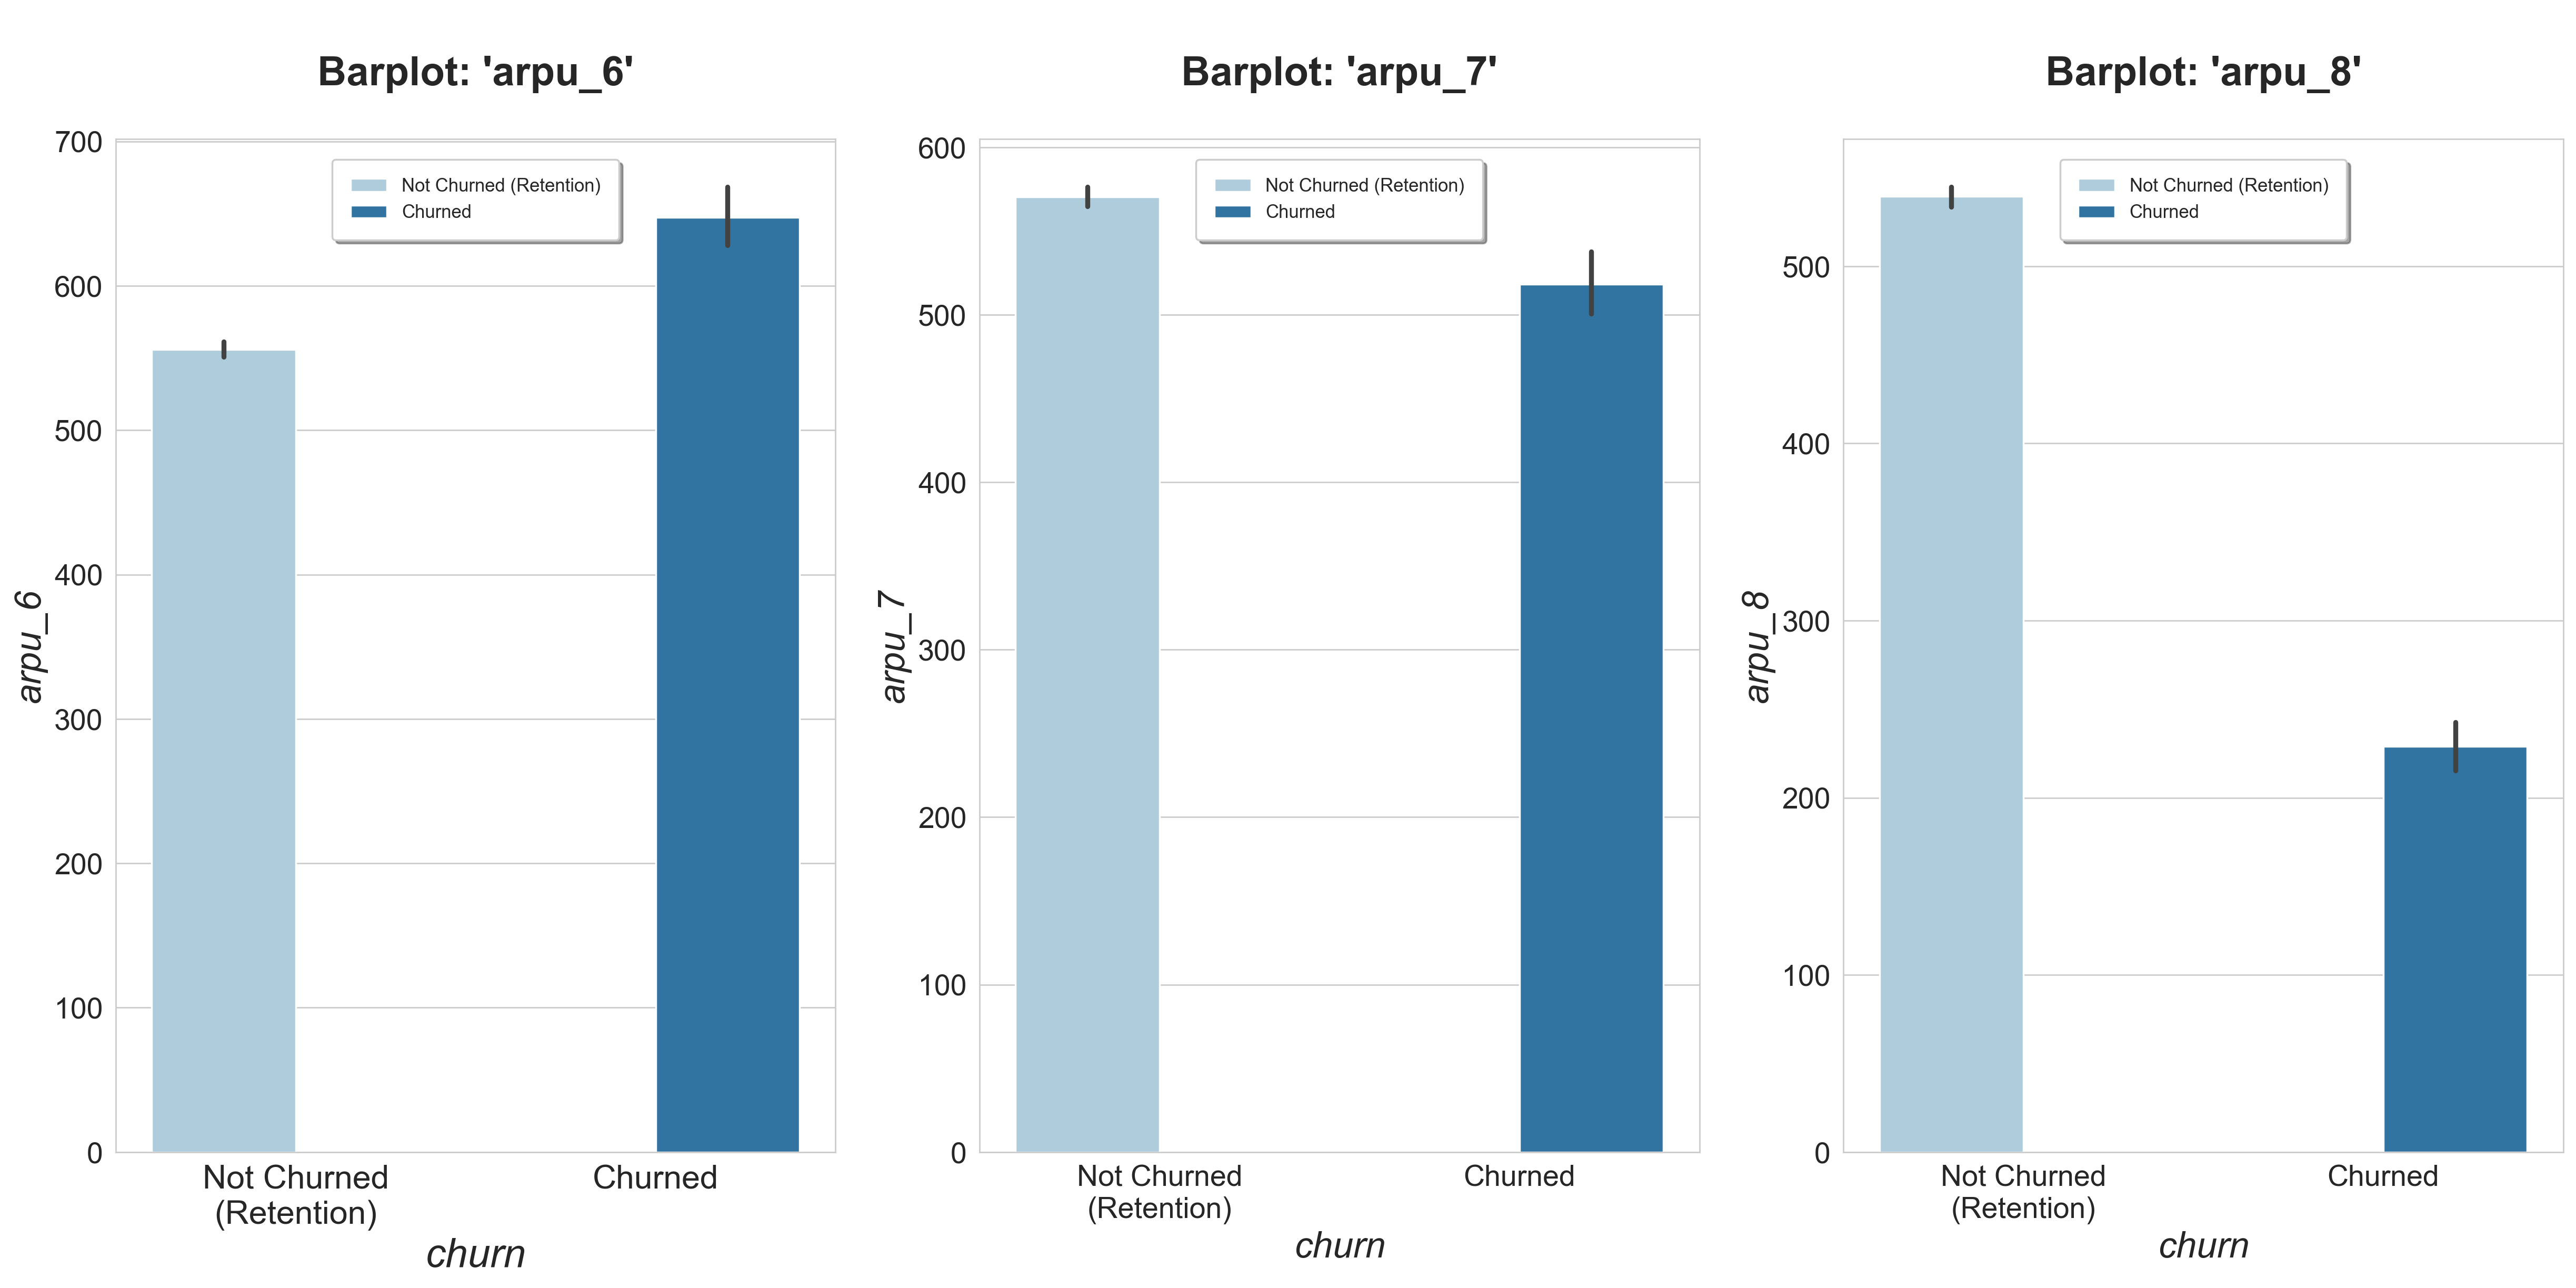

In [80]:
##Checking columns: average revenue per user
arpu_cols = telecom_hv.columns[telecom_hv.columns.str.contains('arpu_')]

##Plotting 'arpu_' barplots
plot_barplots_6_7_8('arpu')

In [81]:
##Check minutes of usage 'mou' columns
mou_cols = telecom_hv.columns[telecom_hv.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [82]:
##Check for missing value percentages in 'mou_cols'

mou_cols_df = telecom_hv[mou_cols]

In [83]:
##Imputing minutes of usage (mou) attributes with 0
telecom_hv[mou_cols] = telecom_hv[mou_cols].replace(np.nan, 0)

In [84]:
##Reheck for missing value percentages in 'mou_cols'

mou_cols_df = telecom_hv[mou_cols]

In [85]:
##Check for incoming(ic) mou features (just for 6th month)
ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [86]:
telecom_hv[ic_mou_features].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   29994.000000      29994.000000      29994.000000      29994.000000   
mean       16.623241         63.628022        152.143792         14.513879   
std        76.716923        145.611785        217.573719         44.268416   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          7.360000         31.145000          0.000000   
50%         0.000000         26.910000         89.070000          1.780000   
75%         0.000000         67.405000        190.890000         12.084305   
max      2589.090000       6351.440000       4693.860000       1872.340000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count  29994.000000      29994.000000      29994.000000      29994.000000   
mean     230.295357         15.643079         30.807514          2.657016   
std      303.121711         77.946036        100.988676         18.915304   
min        0.000000          0.000000          0.000000          0.000000   
25%       51.995000          0.000000          0.310000          0.000000   
50%      140.485000          0.940000          6.630000          0.000000   
75%      294.625000          9.575993         25.390000          0.160000   
max     7454.630000       5459.560000       4630.230000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  29994.000000    29994.000000  29994.000000  29994.000000  
mean      49.111409      288.247914      0.065785     10.539240  
std      139.453856      355.153153      0.189436     66.951198  
min        0.000000        0.000000      0.000000      0.000000  
25%        2.130000       76.795000      0.000000      0.000000  
50%       14.280000      185.125000      0.000000      0.000000  
75%       44.140000      370.187500      0.000000      0.000000  
max     5459.630000     7716.140000     19.760000   4066.690000

<Figure size 1100x880 with 0 Axes>

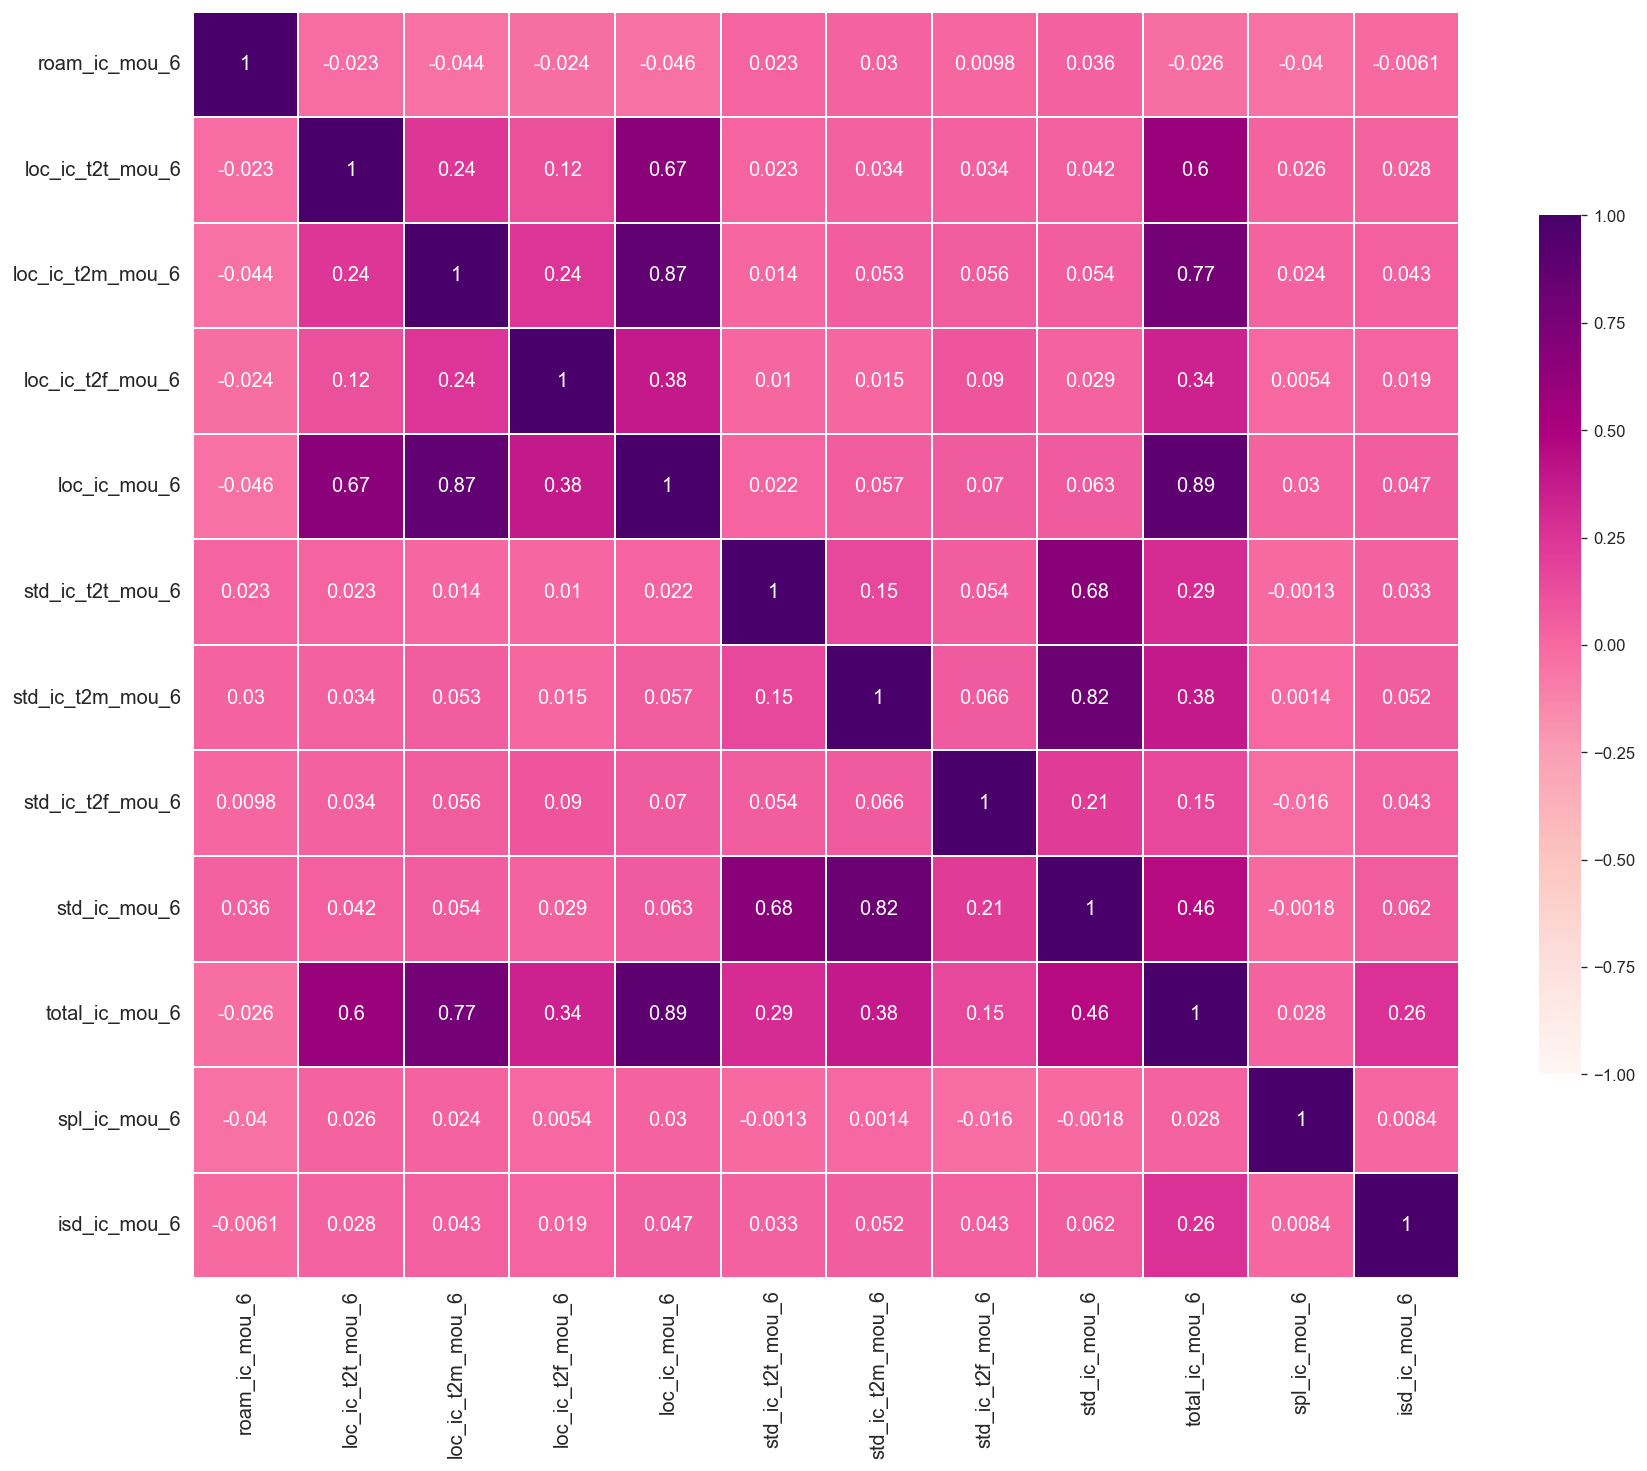

In [90]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (10,8), dpi=110)
corr_matrix_new = telecom_hv[ic_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [91]:
##Let's check for a record (i.e. index 8: example)

print("'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'loc_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

print("\n'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'std_ic_mou_6'],"==",telecom_hv.loc[8,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

print("\n'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'")
print(telecom_hv.loc[8,'total_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6', 'spl_ic_mou_6']].sum())

'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'
81.43 == 81.42

'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'
22.43 == 22.43

'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'
103.86 == 103.86000000000001


In [92]:
##Dropping 'loc_ic_mou', 'std_ic_mou' and 'total_ic_mou' for all 3 months
drop_ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

telecom_hv.drop(drop_ic_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [93]:
##Check for outgoing(og) mou features (just for 6th month)
og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

<Figure size 1440x1200 with 0 Axes>

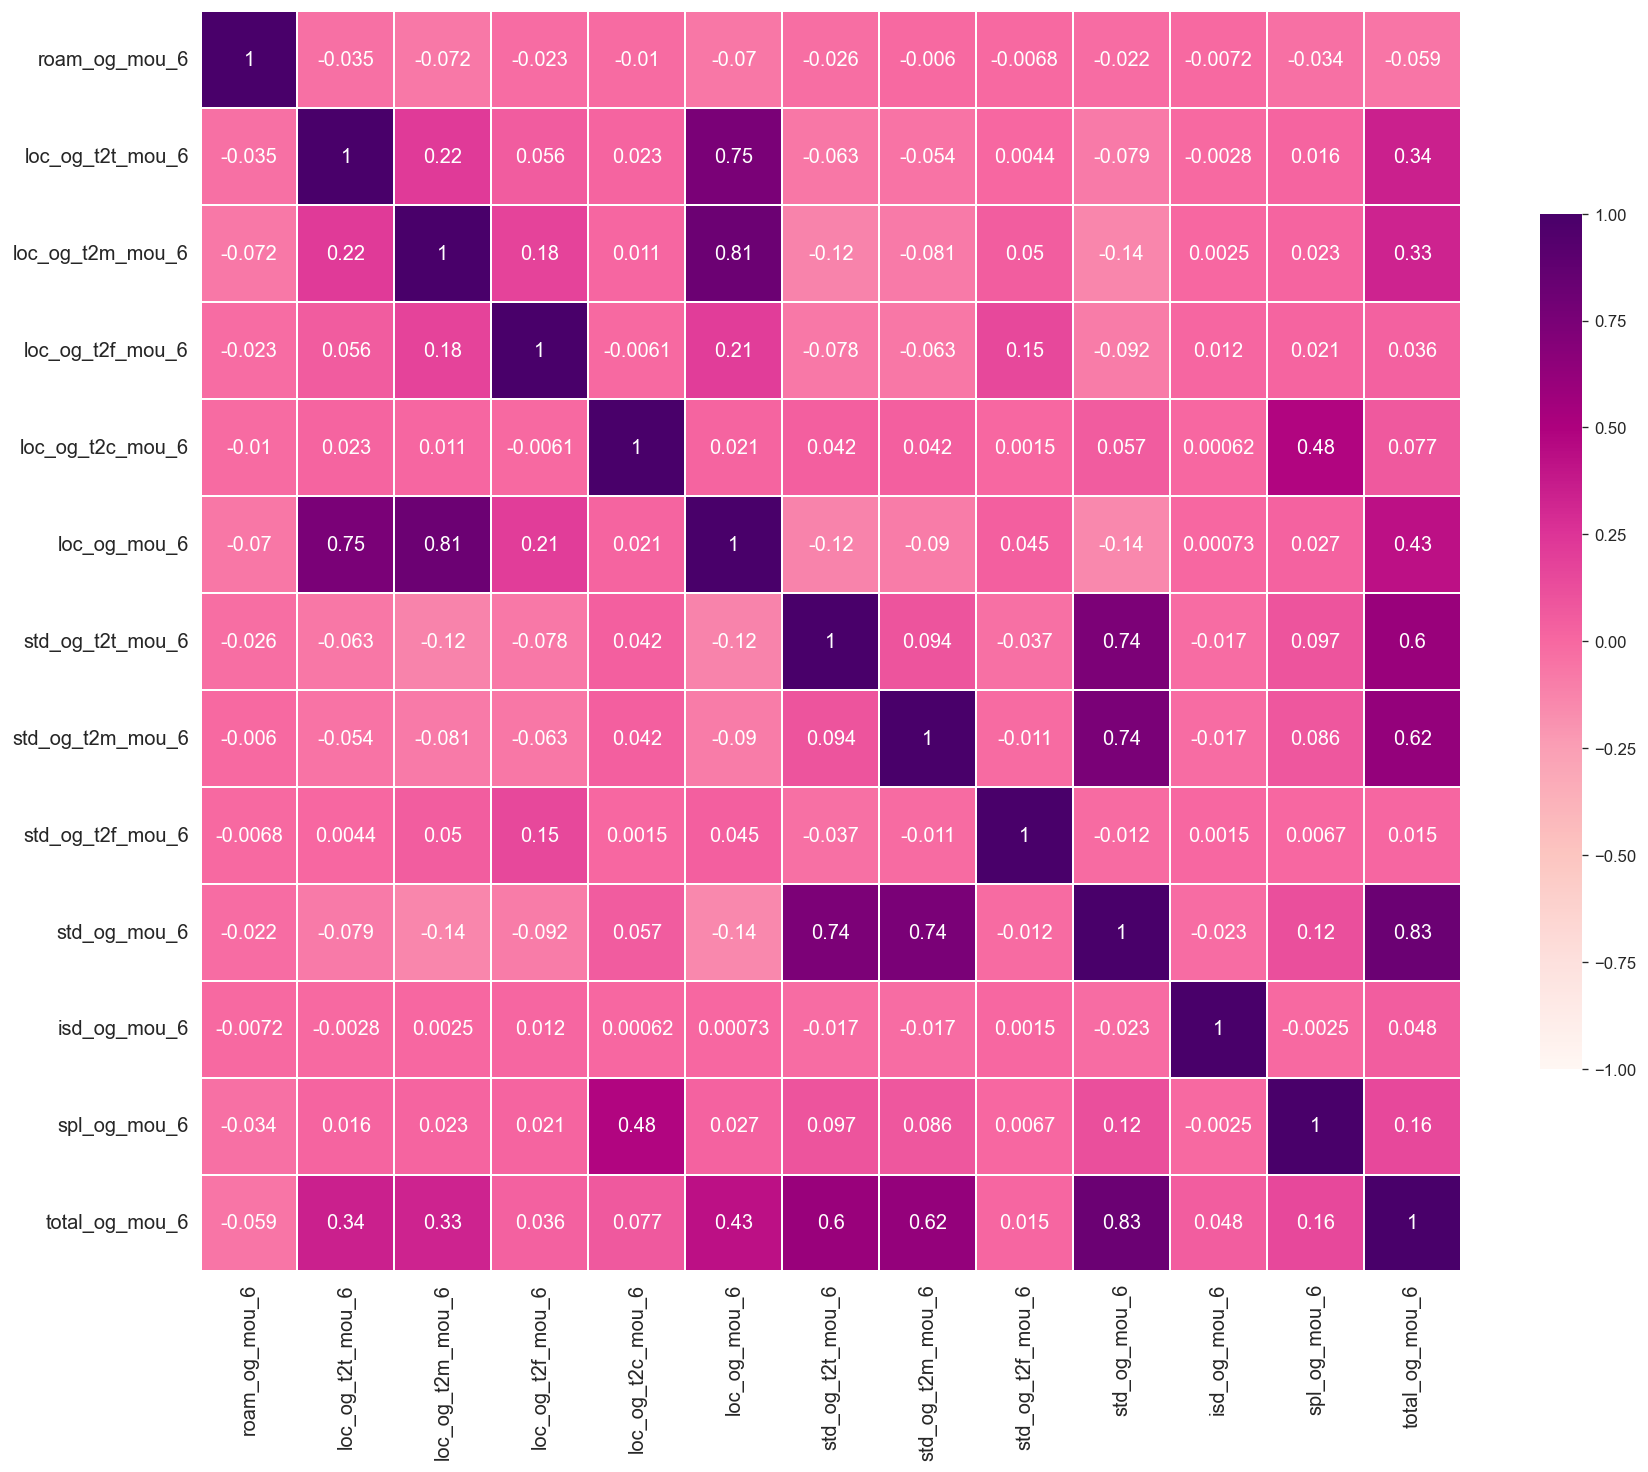

In [94]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[og_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [95]:
##Let's check for a record (i.e. index 21: example)

print("'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'")
print(telecom_hv.loc[21,'loc_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6']].sum())

print("\n'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'")
print(telecom_hv.loc[21,'std_og_mou_6'],"==",telecom_hv.loc[21,['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6']].sum())

print("\n'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'")
print(telecom_hv.loc[21,'total_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())

'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'
97.04 == 97.04

'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'
763.29 == 763.29

'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'
860.34 == 860.3299999999999


In [96]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

telecom_hv.drop(drop_og_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [97]:
offnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

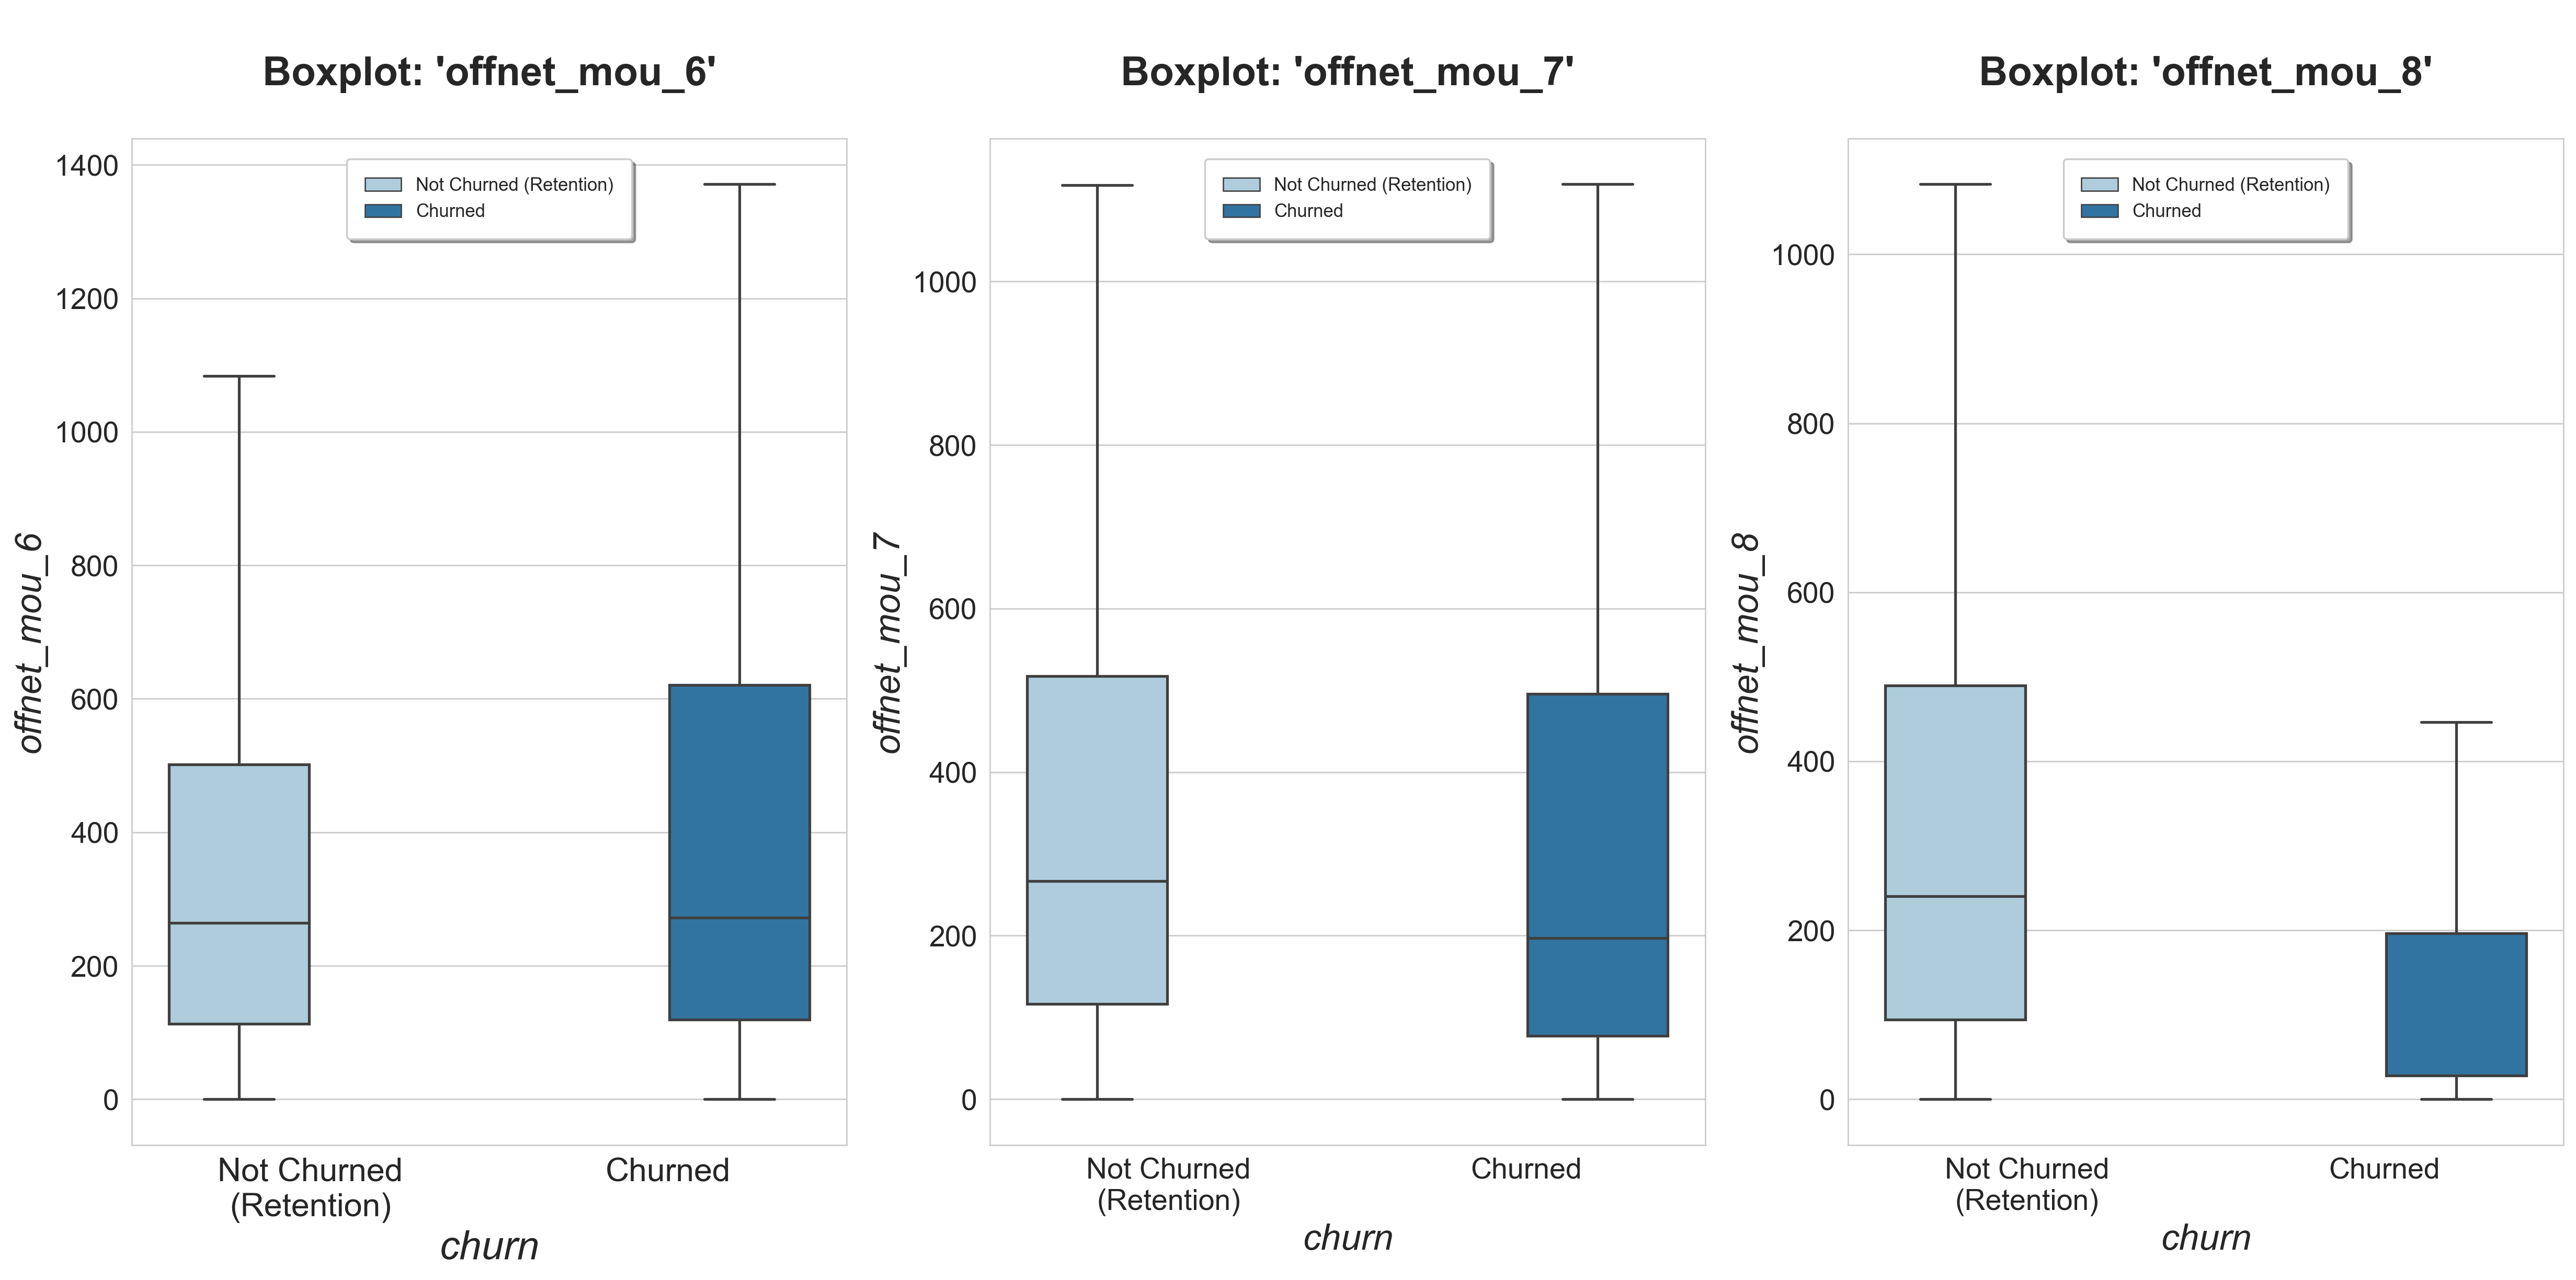

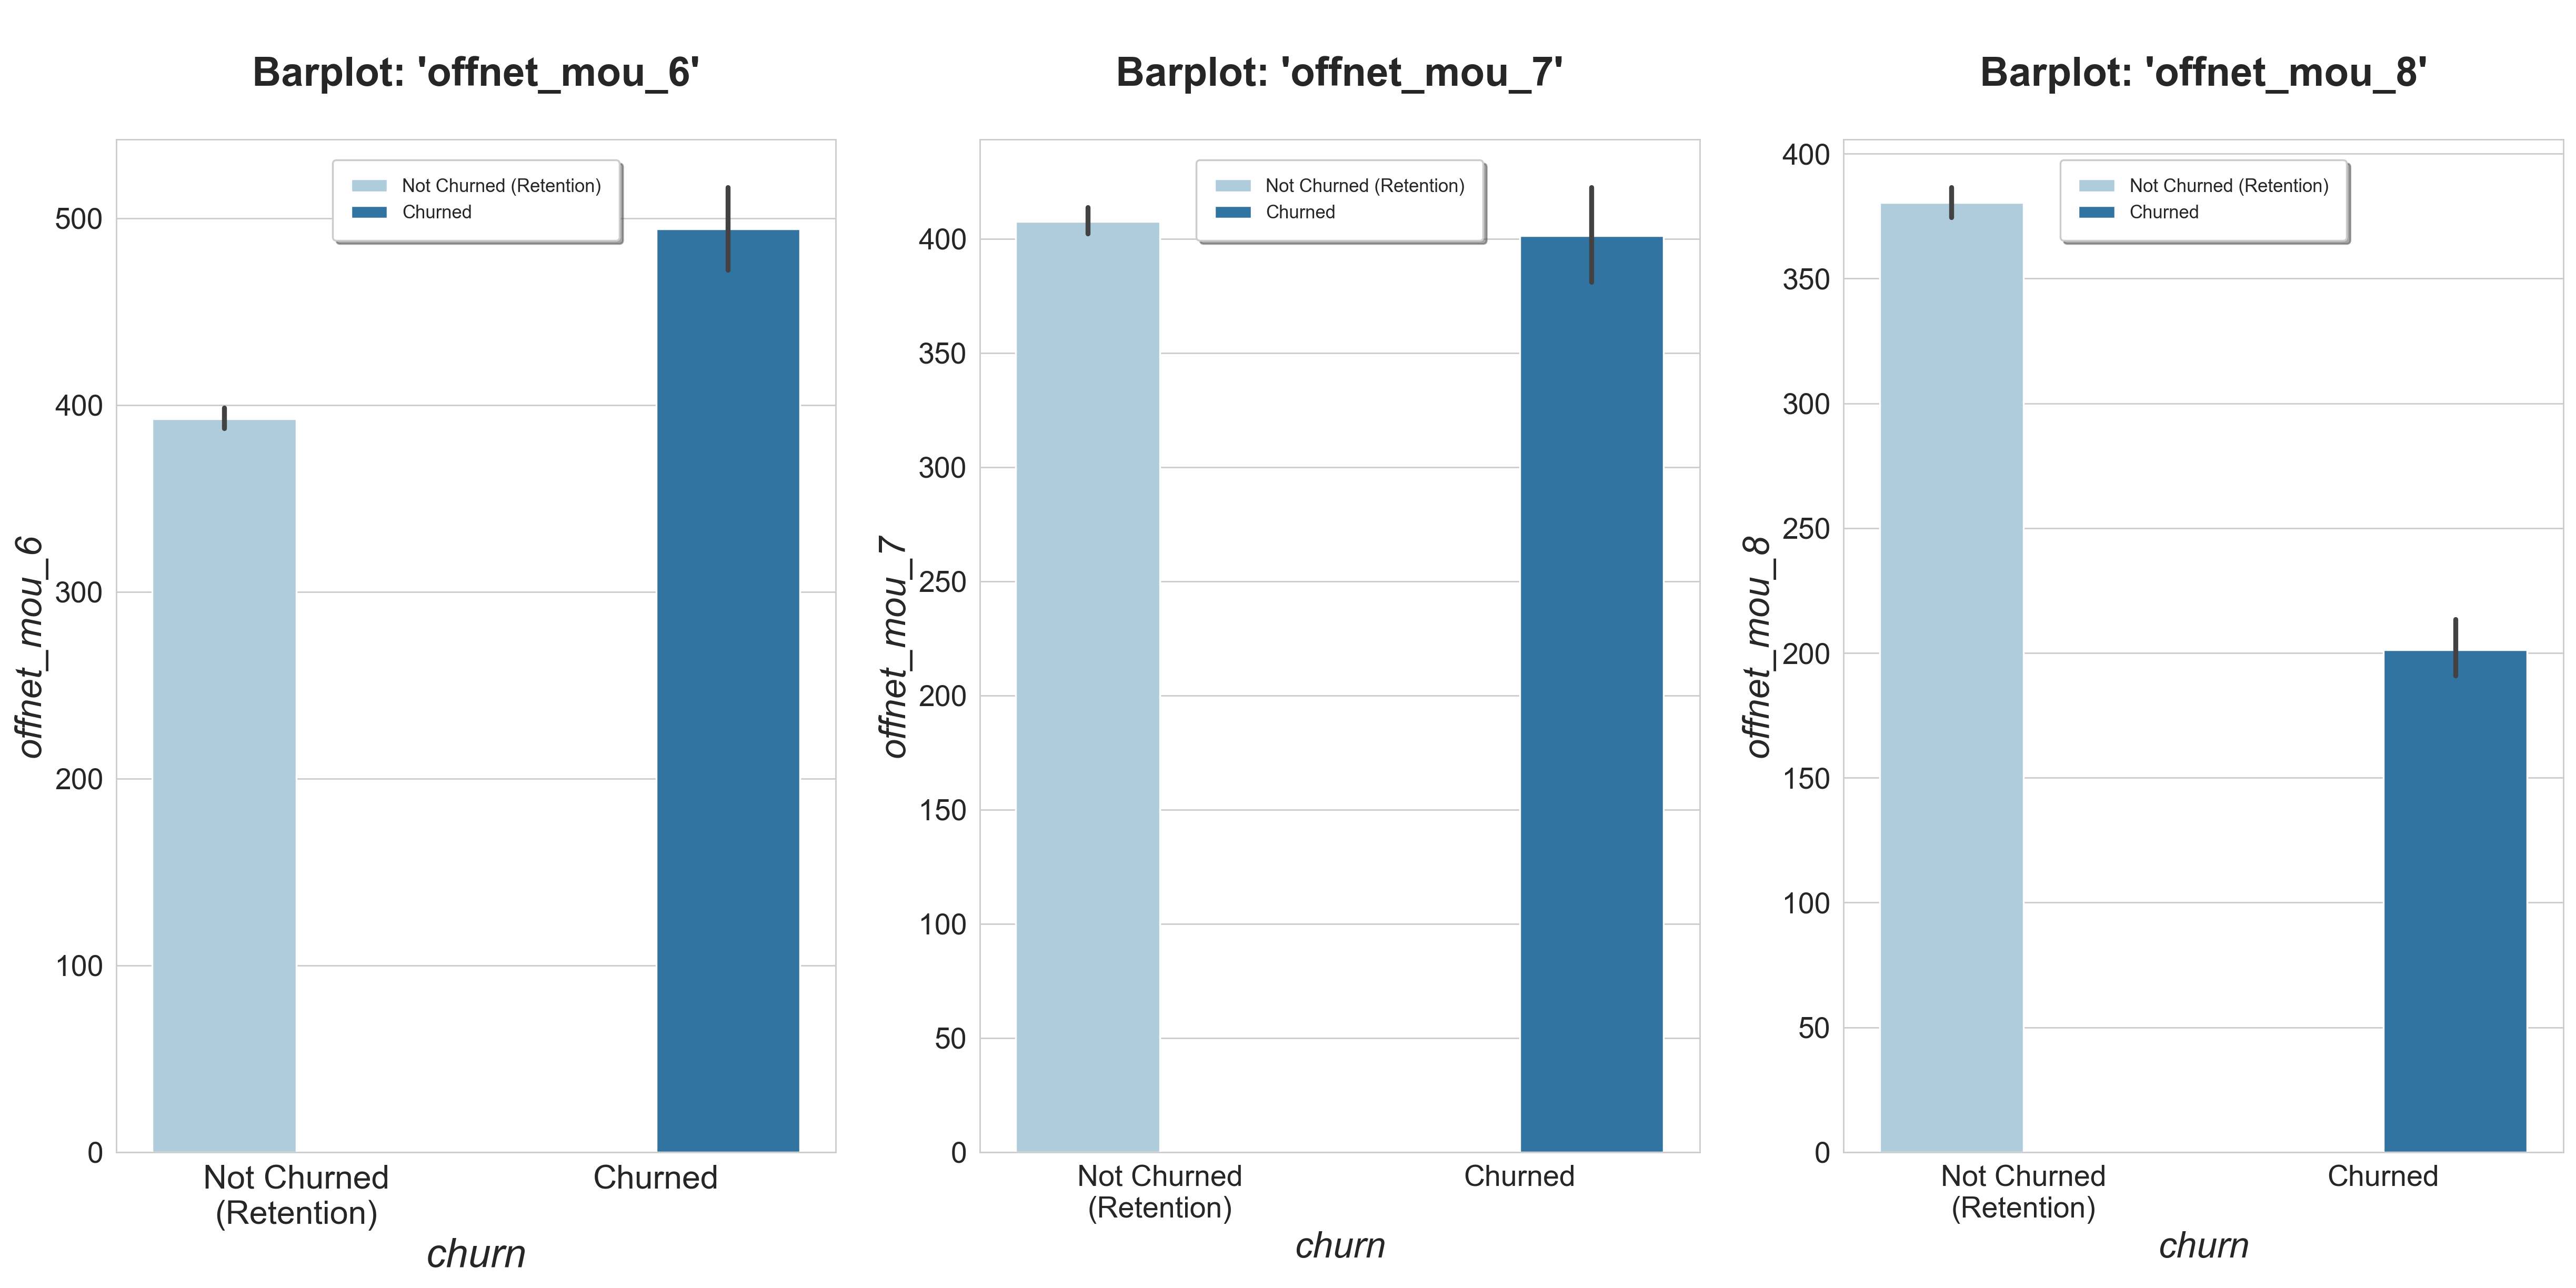

In [98]:
# Plotting 'offnet_mou' boxplots and barplots
plot_boxplots_6_7_8('offnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('offnet_mou')

In [99]:
onnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('onnet.*mou')])
onnet_usage_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

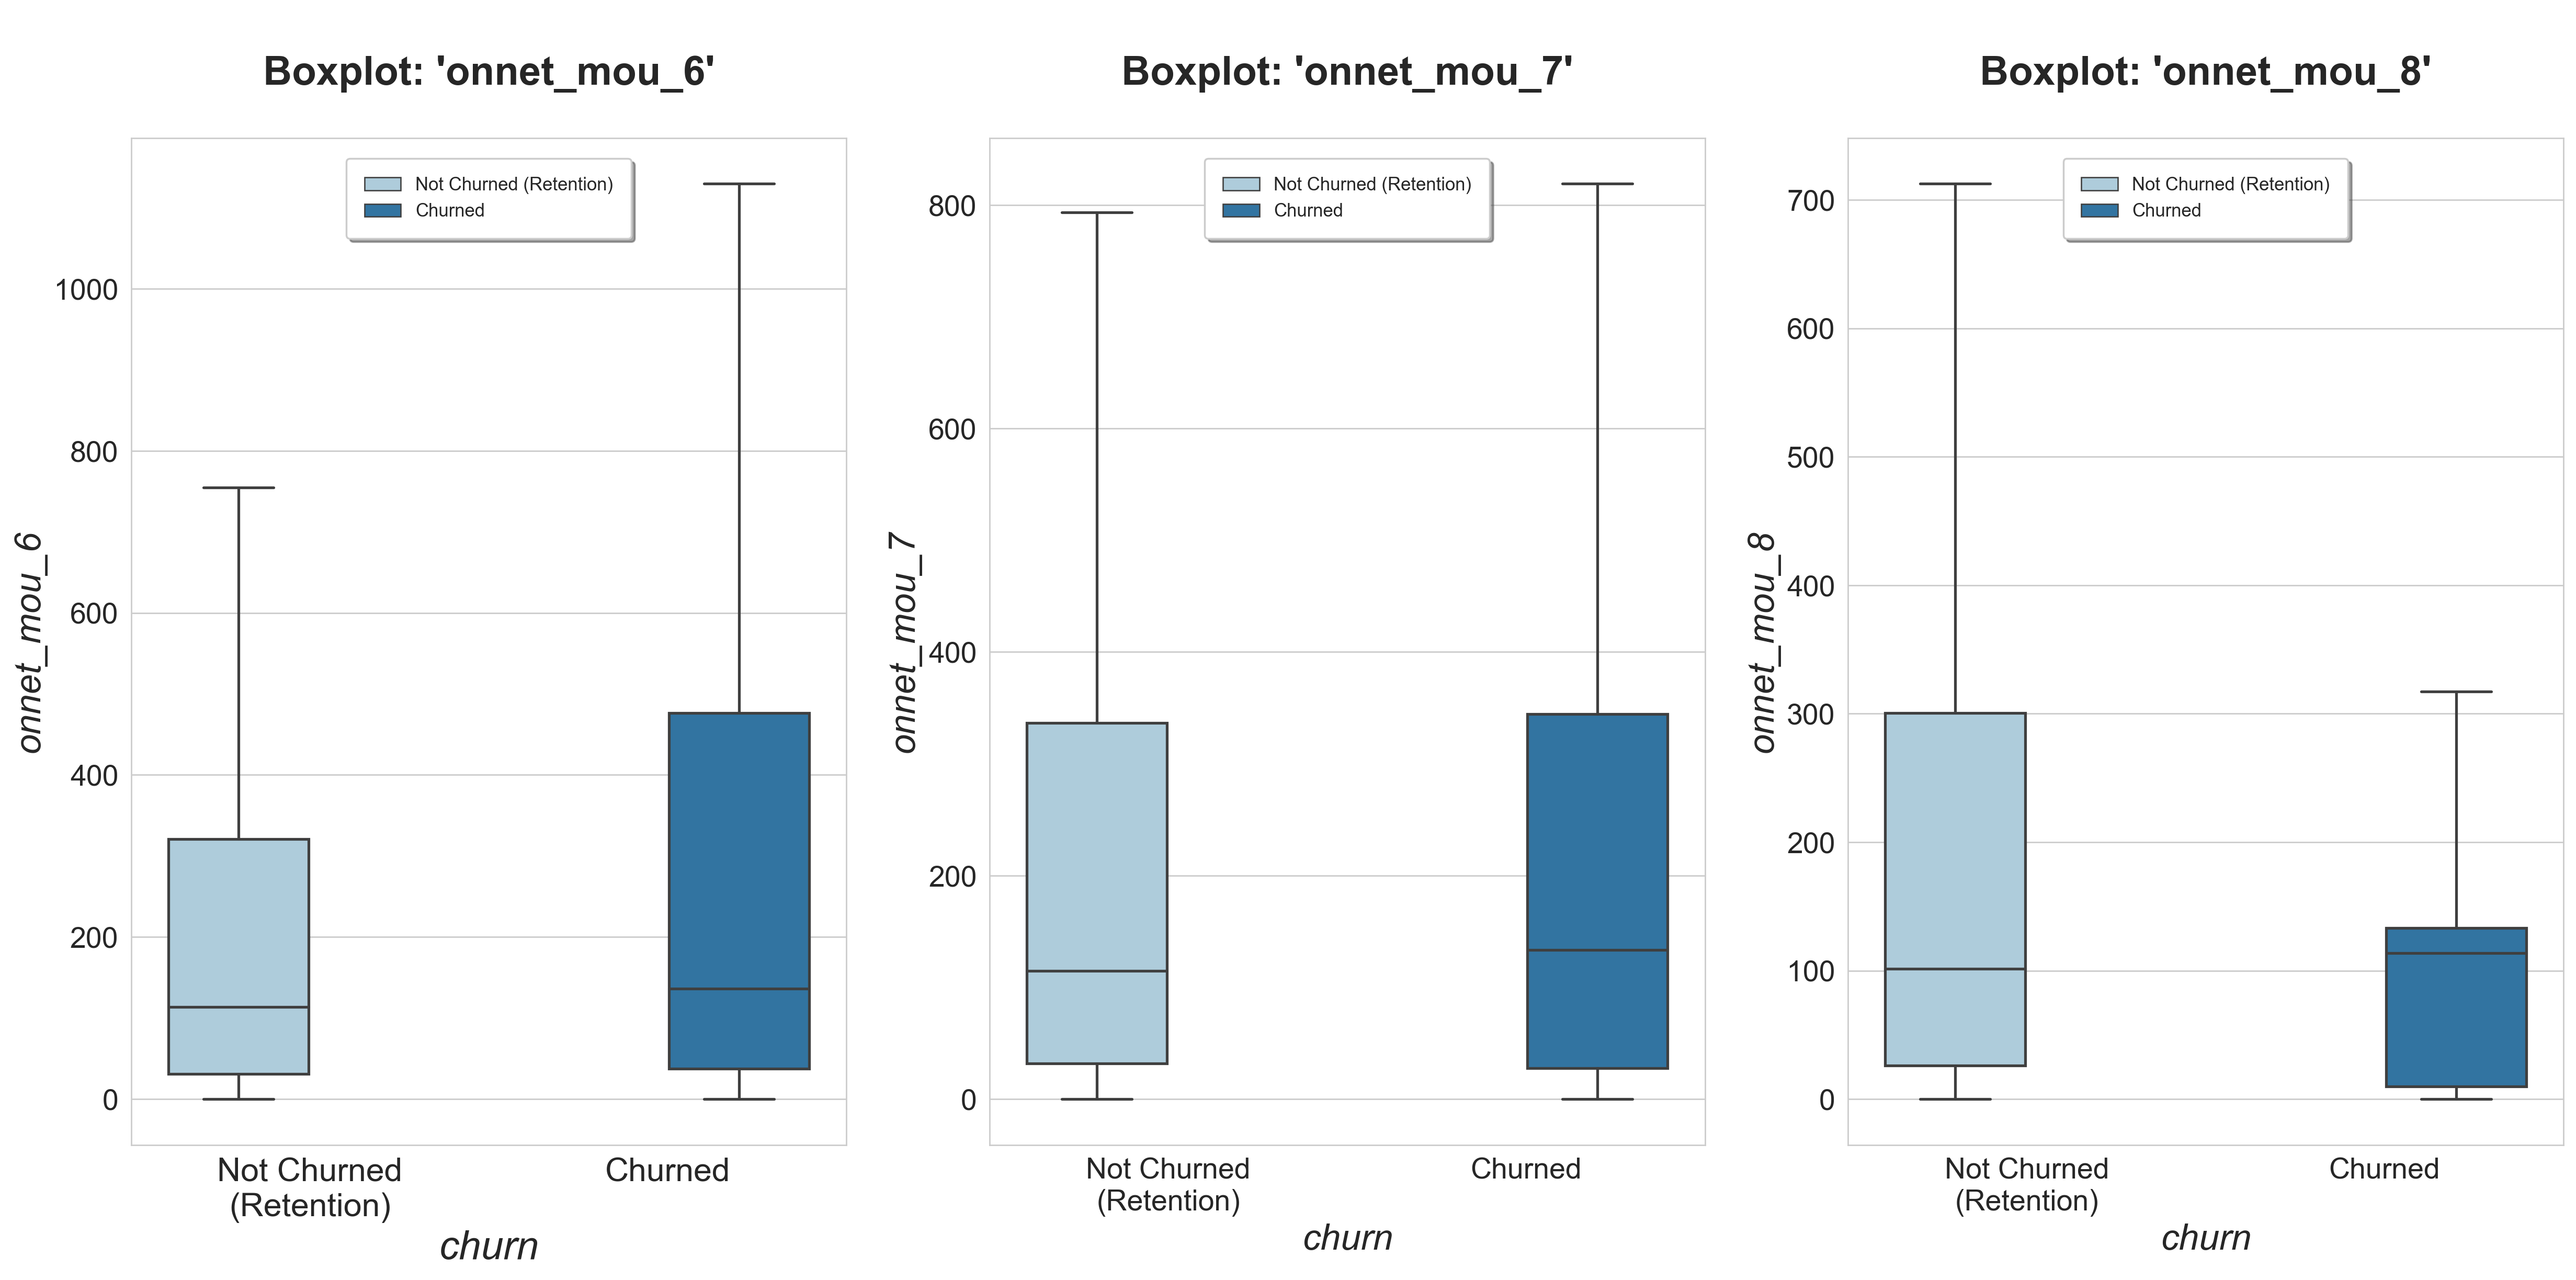

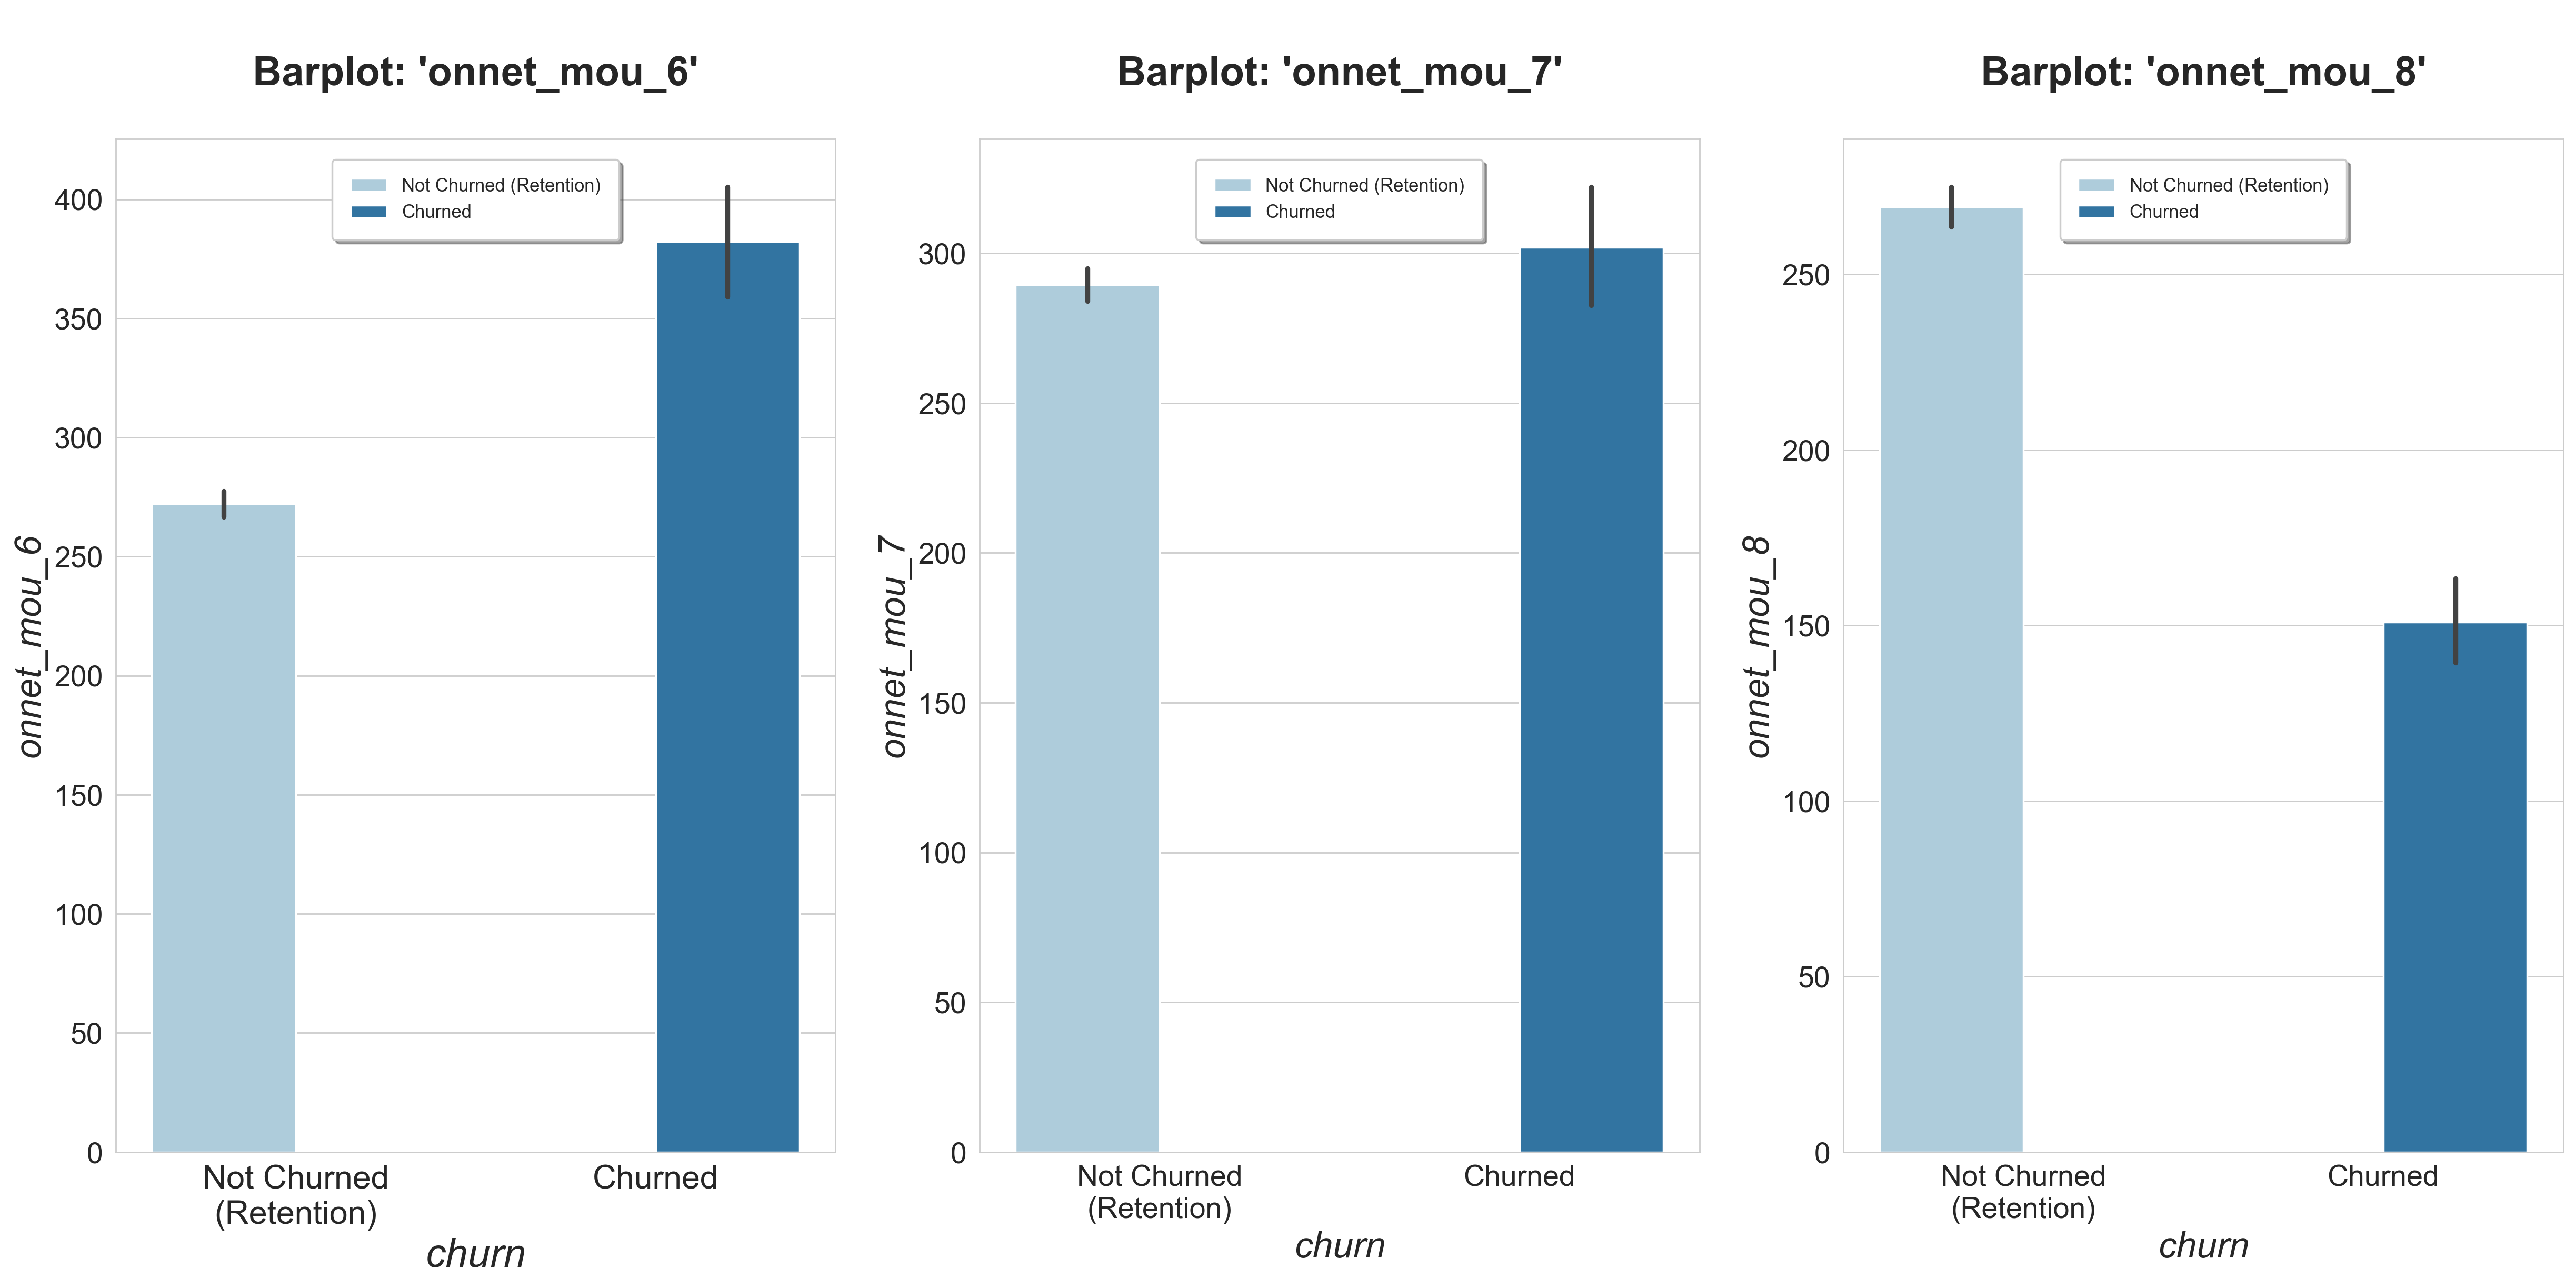

In [100]:
# Plotting 'onnet_mou' boxplots and barplots
plot_boxplots_6_7_8('onnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('onnet_mou')

In [101]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
telecom_hv['tenure_year'] = round(telecom_hv['aon']/365, 1)

print(telecom_hv.tenure_year.value_counts())
print("Min:",telecom_hv.tenure_year.min())
print("Max:",telecom_hv.tenure_year.max())

tenure_year
1.3     1397
0.6     1072
0.8     1029
1.0      988
1.4      980
0.9      977
0.7      867
1.2      827
1.1      738
1.7      705
2.0      663
1.8      660
0.5      656
1.5      645
1.9      593
2.1      542
1.6      510
2.2      507
2.3      506
2.4      504
10.0     493
2.6      483
2.8      447
3.0      415
2.9      414
2.5      398
2.7      383
6.5      352
3.1      352
3.3      337
3.2      320
3.7      315
3.4      311
8.5      307
3.5      301
3.6      285
3.8      268
3.9      244
4.2      241
4.0      227
4.6      226
7.1      226
6.9      219
6.6      217
7.0      213
4.3      205
4.1      204
7.5      200
4.7      195
7.6      194
6.8      190
6.4      181
7.9      177
7.8      174
4.4      174
6.7      173
8.0      172
6.2      165
5.4      159
4.5      158
7.4      156
7.2      155
4.9      153
4.8      152
6.3      151
7.7      148
8.1      146
8.4      145
5.0      143
8.8      139
5.5      139
6.1      135
5.3      129
8.2      129
7.3      125
5.8      123


In [102]:
##Creating bins
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
telecom_hv['tenure'] = pd.cut(telecom_hv['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
telecom_hv.drop(['tenure_year','aon'] , axis=1, inplace= True)

telecom_hv.tenure.value_counts()

tenure
1_2_year     7718
5_12_year    7277
0_1_year     5589
3_5_year     4811
2_3_year     4599
Name: count, dtype: int64

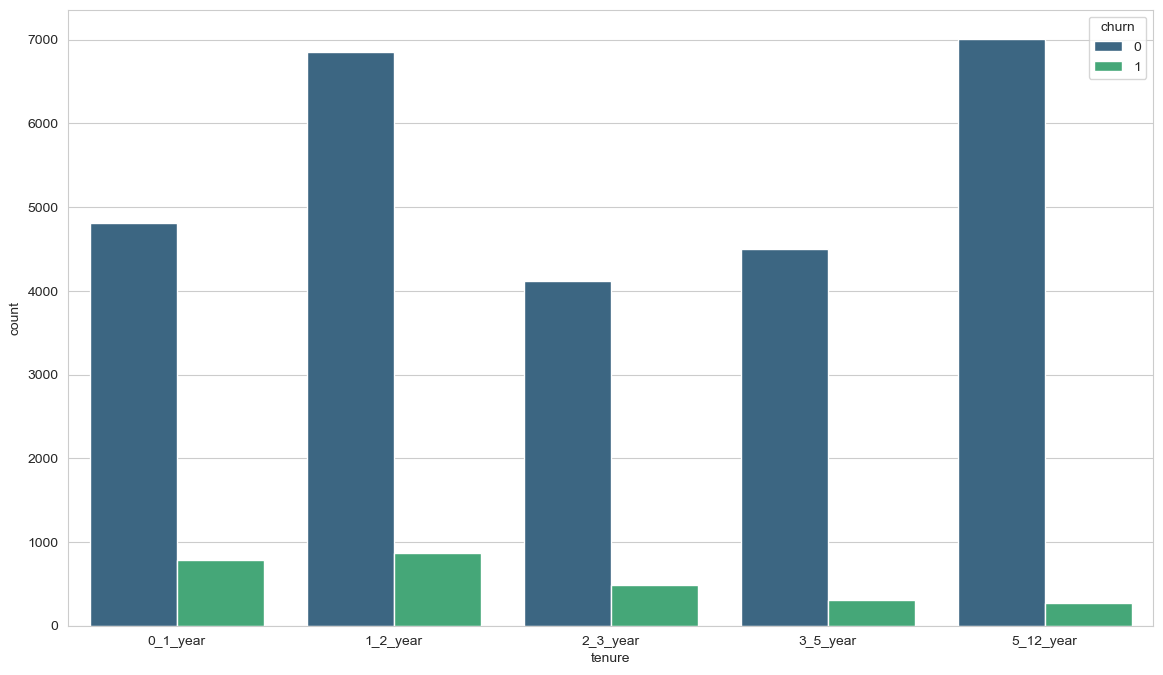

In [104]:
##Visualizing 'age of network' and 'churn'
plt.figure(figsize=(14,8))
tenure_df= telecom_hv[['tenure','churn']]
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_df,palette=("viridis"))
plt.show()

In [105]:
##Check for missing values in telecom_hv dataframe (show only missing value columns)
missing_val_cols_prcnt = round(100*telecom_hv.isnull().sum()/len(telecom_hv.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0].sort_values(ascending=False))  #Descending order(% NaN)
missing.reset_index(inplace=True)
missing= missing.rename(columns={'index':'features',0:'Null_Percentage'})
missing

Empty DataFrame
Columns: [features, Null_Percentage]
Index: []

In [106]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_hv.drop(cols_to_drop, axis=1, inplace= True)

##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = telecom_hv.columns[telecom_hv.columns.str.contains('ic_others|og_others')]
telecom_hv[cols_to_impute] = telecom_hv[cols_to_impute].replace(np.nan, 0)

In [107]:
##Before combination (checking dataset shape)
telecom_hv.shape

(29994, 121)

In [108]:
##Features in telecom_hv corresponding to 'month_6'
attributes_6 = list(telecom_hv.columns[telecom_hv.columns.str.contains("_6")])
print(attributes_6)
print(len(attributes_6))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6', 'total_rech_data_amt_6', 'avg_total_rech_plus_data_amt_6_7']
40


In [109]:
##Features in telecom_hv corresponding to 'month_7'
attributes_7 = telecom_hv.columns[telecom_hv.columns.str.contains("_7")]
print(attributes_7)
print(len(attributes_7))

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rech_amt_7', 'total_rech_data_7', 'max_rech_data_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7',
       'total_rech_data_amt_7', 'avg_total_rech_plus_data_amt_6_7'],
      dtype='object')
40


In [110]:
##Firstly, let's drop 'avg_total_rech_plus_data_amt_6_7'
telecom_hv.drop('avg_total_rech_plus_data_amt_6_7', axis=1, inplace= True)

In [111]:
##Let's combine and take average of remaining '_6'  and '_7' attributes
feature_names_6 = [i.split('_6')[0] for i in attributes_6 if i.endswith("_6")]
feature_names_7 = [i.split('_7')[0] for i in attributes_7 if i.endswith("_7")]
uncommon_feature_names = [i for i,j in (zip(feature_names_6, feature_names_7)) if i!=j]
uncommon_feature_names

[]

In [112]:
common_feature_names= [i for i,j in (zip(feature_names_6, feature_names_7)) if i==j]
common_feature_names

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rech_amt',
 'total_rech_data',
 'max_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech_data_amt']

In [113]:
#Since all features of '_6' exist in '_7'. Therefore let's find the new 'avg_6_7' features 
##(together representing the good phase)

f6_cols=[]
f7_cols=[]
for feature in common_feature_names:
    f6= feature+'_6'
    f7= feature+'_7'
    avg_67= feature+'_avg_6_7'
    
    f6_cols.append(f6)  ##Storing all remaining attributes from '_6'
    f7_cols.append(f7)  ##Storing all remaining attributes from '_7'
    
    telecom_hv[avg_67] = (telecom_hv[f6] + telecom_hv[f7])/2

telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
6    7.001051e+09   429.023   190.704   255.114        71.03        45.03   
7    7.000702e+09  1069.180  1349.850  3171.480        57.84        54.68   
8    7.001525e+09   378.721   492.223   137.362       413.69       351.03   
13   7.002192e+09   492.846   205.671   593.260       501.76       108.39   
16   7.000876e+09   430.975   299.869   187.894        50.51        74.01   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
6         76.66        262.73         49.24         92.08           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
6            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
6              71.03             45.03             76.14            252.23   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
6              48.71             80.63             10.38              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
6               0.00              0.11               0.0              0.00   
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
13             23.51              0.00               0.0              0.49   
16             10.26              0.00               0.0              0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
6               0.00              0.00              0.51              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
6               0.53             11.45              0.00              0.00   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
13             52.94            156.94              0.00              0.00   
16             64.51             18.29              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
6               0.00           0.0          0.00          0.00          0.11   
7              16.68           0.0          0.18         10.01          4.50   
8           

In [114]:
##Dropping the fundamental explanatory variables belonging to '_6'
telecom_hv.drop(f6_cols, axis=1, inplace=True)

In [115]:
##Dropping the fundamental explanatory variables belonging to '_7'
telecom_hv.drop(f7_cols, axis=1, inplace=True)

In [116]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
6    7.001051e+09   255.114        76.66         92.08           0.00   
7    7.000702e+09  3171.480        52.29        325.91          31.64   
8    7.001525e+09   137.362        35.08        136.48           0.00   
13   7.002192e+09   593.260       534.24        482.46          72.11   
16   7.000876e+09   187.894        70.61        162.76           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
6            0.00             76.14             80.63              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
6               0.00              0.51             11.45              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
13              0.49            498.23            156.94              0.00   
16              0.00              3.23             18.29              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
6           0.00          0.00          0.0           1896.43   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
13          1.29          4.78          0.0             52.58   
16          0.00          5.91          0.0             28.89   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
6             265.28              2.51              0.00              2.60   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
13            195.18              7.49            154.58            317.91   
16            150.16             32.71              6.33             73.93   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
6               0.00           0.0          0.00         0.28   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
13              1.91           0.0        393.39        21.44   
16              2.18           0.0          0.23         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
6               11.0             294.0            50.0                 10.0   
7                7.0            3638.0          1580.0                779.0   
8               14.0             120.0            30.0                 10.0   
13              11.0             717.0           130.0                  0.0   
16               2.0             160.0           130.0                130.0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
6            2.651999       125.717301          197.526489         0.00   
7            2.651999       125.717301          197.526489         0.00   
8            3.000000        23.000000           69.000000         0.03   
13           3.000000        23.000000           69.000000         0.02   
16           2.651999       125.717301          197.526489         0.00   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
6          0.00           0.0          0.0           0.0          0.0   
7          0.00           0.0          0.0           0.0          0.0   
8         11.94           0.0          3.0           0.0          0.0   
13         0.00           0.0          3.0           0.0          0.0   
16         0.00           0.0          0.0           0.0          0.0   

    vbc_3g_8  total_rech_data

In [117]:
telecom_hv.shape

(29994, 81)

In [118]:
telecom_hv.describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count   2.999400e+04  29994.000000  29994.000000  29994.000000   29994.000000   
mean    7.001210e+09    511.494759    258.524678    364.214274      12.608697   
std     6.902055e+05    499.223684    458.941368    475.656427      68.982085   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.000000   
1%      7.000027e+09      0.000000      0.000000      0.000000       0.000000   
10%     7.000252e+09     94.327700      2.660000     18.639000       0.000000   
25%     7.000615e+09    250.826750     24.530000     87.960000       0.000000   
50%     7.001212e+09    424.725000    101.830000    219.170000       0.000000   
75%     7.001810e+09    657.165000    278.452500    465.075000       0.000000   
90%     7.002165e+09    975.159800    702.686000    842.058000      16.190000   
95%     7.002285e+09   1254.961150   1092.460000   1181.071000      57.008000   
99%     7.002386e+09   1988.062310   2153.599000   2196.336400     278.877700   
99.9%   7.002409e+09   4021.402436   4254.076660   4472.542460     887.594060   
max     7.002411e+09  33543.624000  10752.560000  14007.340000    2898.340000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
count   29994.000000      29994.000000      29994.000000      29994.000000   
mean       20.880225         80.614652        160.539758          6.139128   
std       105.670073        222.550977        232.288912         19.836660   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          1.760000          0.000000   
25%         0.000000          5.365000         21.382500          0.000000   
50%         0.000000         27.890000         88.310000          0.180000   
75%         0.000000         75.837500        209.470000          3.810000   
90%        32.153000        182.565000        406.095000         15.424000   
95%       106.267000        301.947500        574.982500         29.340000   
99%       424.893600        872.140900       1086.020500         85.013500   
99.9%    1375.543640       2712.159390       2099.734100        234.714510   
max      5337.040000      10752.560000       4961.330000        928.490000   

       loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count      29994.000000      29994.000000      29994.000000      29994.000000   
mean           1.747462        169.912105        176.625392          1.740487   
std            7.350234        405.468089        412.917897         11.385182   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          7.660000         26.660000          0.000000   
75%            0.410000        120.880000        151.650000          0.000000   
90%            4.360000        553.705000        519.380000          1.350000   
95%            9.253500        924.932500        876.251000          6.387000   
99%           28.743500       1918.040400       1888.042500         38.265600   
99.9%         81.507850       3779.915710       4240.633160        163.425540   
max          351.830000       8014.430000      13950.040000        516.910000   

       isd_og_mou_8  spl_og_mou_8   og_others_8  loc_ic_t2t_mou_8  \
count  29994.000000  29994.000000  29994.000000      29994.000000   
mean       1.998917      6.841202      0.053649         61.955412   
std       44.656704     22.257936      3.219725        141.084139   
min        0.000000      0.000000      0.000000          0.000000   
1%         0.000000      0.000000      0.000000          0.

In [119]:
##Continuous features
cont_cols_hv= [i for i in telecom_hv.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols_hv

##Using numpy clip() to cap the values of outliers in between 1 and 99.9 percentiles
import numpy as np
for col in cont_cols_hv:
    percentiles = telecom_hv[col].quantile([0.01,0.999]).values
    telecom_hv[col] = np.clip(telecom_hv[col], percentiles[0], percentiles[1])

In [120]:
##Checking categorical column 'tenure'
telecom_hv.tenure.head()

6      3_5_year
7      2_3_year
8      0_1_year
13    5_12_year
16     1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [121]:
#'tenure' is a categorical variable. Converting it into numeric using get_dummies
###Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
d_tenure = pd.get_dummies(telecom_hv['tenure'], prefix='tenure', drop_first = True)
telecom_hv = pd.concat([telecom_hv, d_tenure], axis = 1)

##Dropping the 'tenure' column
telecom_hv.drop(cat_cols, axis=1, inplace=True)

In [122]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
6    7.001051e+09   255.114        76.66         92.08           0.00   
7    7.000702e+09  3171.480        52.29        325.91          31.64   
8    7.001525e+09   137.362        35.08        136.48           0.00   
13   7.002192e+09   593.260       534.24        482.46          72.11   
16   7.000876e+09   187.894        70.61        162.76           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
6            0.00             76.14             80.63              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
6               0.00              0.51             11.45              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
13              0.49            498.23            156.94              0.00   
16              0.00              3.23             18.29              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
6           0.00          0.00          0.0        1809.85906   
7          10.01          6.50          0.0          27.31000   
8           0.00         10.23          0.0           0.31000   
13          1.29          4.78          0.0          52.58000   
16          0.00          5.91          0.0          28.89000   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
6             265.28              2.51              0.00              2.60   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
13            195.18              7.49            154.58            317.91   
16            150.16             32.71              6.33             73.93   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
6               0.00           0.0          0.00         0.28   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
13              1.91           0.0        393.39        21.44   
16              2.18           0.0          0.23         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
6               11.0             294.0            50.0                 10.0   
7                7.0            3638.0          1580.0                779.0   
8               14.0             120.0            30.0                 10.0   
13              11.0             717.0           130.0                  0.0   
16               2.0             160.0           130.0                130.0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
6            2.651999       125.717301          197.526489         0.00   
7            2.651999       125.717301          197.526489         0.00   
8            3.000000        23.000000           69.000000         0.03   
13           3.000000        23.000000           69.000000         0.02   
16           2.651999       125.717301          197.526489         0.00   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
6          0.00           0.0          0.0           0.0          0.0   
7          0.00           0.0          0.0           0.0          0.0   
8         11.94           0.0          3.0           0.0          0.0   
13         0.00           0.0          3.0           0.0          0.0   
16         0.00           0.0          0.0           0.0          0.0   

    vbc_3g_8  total_rech_data

In [123]:
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29994 entries, 6 to 99997
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                29994 non-null  float64
 1   arpu_8                       29994 non-null  float64
 2   onnet_mou_8                  29994 non-null  float64
 3   offnet_mou_8                 29994 non-null  float64
 4   roam_ic_mou_8                29994 non-null  float64
 5   roam_og_mou_8                29994 non-null  float64
 6   loc_og_t2t_mou_8             29994 non-null  float64
 7   loc_og_t2m_mou_8             29994 non-null  float64
 8   loc_og_t2f_mou_8             29994 non-null  float64
 9   loc_og_t2c_mou_8             29994 non-null  float64
 10  std_og_t2t_mou_8             29994 non-null  float64
 11  std_og_t2m_mou_8             29994 non-null  float64
 12  std_og_t2f_mou_8             29994 non-null  float64
 13  isd_og_mou_8         

In [124]:
##Creating an alternate copy of 'telecom_hv' dataframe 
df1= telecom_hv.copy()

## Model Building

In [128]:
##Rewriting original dataframe 'telecom_hv'
telecom_hv = df1.copy()

In [127]:
##Creating a function to find binary value columns from the 'telecom_hv' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)

['churn', 'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year']


In [129]:
##Dropping 'mobile_number' attribute from the dataframe as it is won't be useful while modeling as it is an ID.
telecom_hv.drop('mobile_number', axis=1, inplace= True)

In [130]:
telecom_hv.shape

(29994, 83)

In [131]:
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)

In [132]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [133]:
print(df_train.shape)
print(df_test.shape)

(20995, 83)
(8999, 83)


In [134]:
##Scaled train-data
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
94924  1.035565     0.154917      1.653110      -0.208776      -0.217098   
64882  0.803395     0.451079      1.660614      -0.208776      -0.217098   
63890  1.417688    -0.431972      3.760384      -0.208776      -0.217098   
61687 -0.124233    -0.261989      0.045493      -0.208776      -0.217098   
51552 -0.772474    -0.515034     -0.773906      -0.208776      -0.217098   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
94924          1.257371          4.274924         -0.302875         -0.287072   
64882          1.898345          4.153273         -0.342255         -0.287072   
63890         -0.327624          0.942950         -0.342255          0.500653   
61687          0.313971          0.748256         -0.216906         -0.287072   
51552         -0.258632         -0.682812         -0.342255         -0.287072   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
94924         -0.429699         -0.427479         -0.174968     -0.092439   
64882         -0.415120         -0.348057         -0.174968     -0.092439   
63890         -0.301434          3.883726         -0.174968     -0.092439   
61687         -0.429699         -0.313582         -0.043537     -0.092439   
51552         -0.429699         -0.444679         -0.174968     -0.092439   

       spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
94924     -0.372555    -0.058731         -0.262298         -0.250844   
64882     -0.165610    -0.058731          1.661513         -0.117734   
63890      0.901466    -0.058731         -0.409584          0.138231   
61687     -0.288327    -0.058731          0.757532          0.388314   
51552     -0.372555    -0.058731         -0.354074         -0.727536   

       loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
94924          2.311422         -0.264925         -0.298270         -0.199528   
64882         -0.173564         -0.264925         -0.281460         -0.199528   
63890         -0.384960         -0.037828         -0.001065         -0.199528   
61687         -0.384960         -0.258695         -0.273279         -0.199528   
51552         -0.384960         -0.264925         -0.328080         -0.199528   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
94924     -0.269505     -0.186088    -0.168881          0.081906   
64882     -0.269505     -0.186088    -0.168881          0.512268   
63890     -0.269505     -0.186088    -0.168881          0.297087   
61687      1.966653     -0.186088     0.008670         -0.348456   
51552     -0.269505     -0.186088    -0.168881         -0.671228   

       total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
94924          0.921160        0.002107             0.430485   
64882          0.679215       -0.146698            -0.317004   
63890          1.593448       -0.059895            -0.317004   
61687          0.131865       -0.028894             0.470245   
51552         -0.758571        0.287318            -0.714604   

       total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
94924          -0.837266         0.314988           -0.408414     0.617229   
64882          -0.112627        -0.039947           -0.109924    -0.291696   
63890          -0.112627        -0.039947           -0.109924    -0.291696   
61687          -0.112627        -0.039947           -0.109924    -0.291696   
51552          -0.112627        -0.039947           -0.109924    -0.291696   

       vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
94924    -0.337924      2.966528    -0.364186     -0.296529    -0.184431   
64882    -0.337924     -0.280553    -0.364186     -0.296529    -0.184431   
63890    -0.337924     -0.280553    -0.364186     -0.296529    -0.184431   
61687    -0.337924     -0.280553    -0.364186     -0.296529    -0.184431   
51552    -0.337924     -0.280553    -0.

In [135]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [136]:
##Dealing with class imbalance using SMOTE
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before OverSampling, counts of label '1'(train_set): 1883
Before OverSampling, counts of label '0'(train_set): 19112 

Before OverSampling, churn event rate (Entire Dataset): 9.032% 



In [137]:
##Before Implementing SMOTETomek on the train data, let's build the logistic regression model and check for stats (on unbalanced class dataset)
# logistic regression object 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Not Churned','Churned'])) 

              precision    recall  f1-score   support

 Not Churned       0.93      0.99      0.96      8173
     Churned       0.61      0.23      0.33       826

    accuracy                           0.92      8999
   macro avg       0.77      0.61      0.64      8999
weighted avg       0.90      0.92      0.90      8999



In [139]:
import statsmodels.api as sm

In [145]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Instantiate SMOTETomek with a random state for reproducibility
smote_tomek = SMOTETomek(random_state=42)

# Fit the resampler to the training data
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

# Display the new shapes after resampling
print('After OverSampling, the shape of X_train: {}'.format(X_res.shape))
print('After OverSampling, the shape of y_train: {}\n'.format(y_res.shape))

# Display the count of the target classes after resampling
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

# Calculate and display the new event rate for the positive class
print("After OverSampling, churn event rate: {}% \n".format(round(sum(y_res == 1) / len(y_res) * 100, 2)))

# Optionally, you can also display the distribution of the target variable
print('Class distribution after resampling:', Counter(y_res))


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [140]:
# Logistic regression model
logm1 = sm.GLM(y_res,(sm.add_constant(X_res)), family = sm.families.Binomial())
logm1.fit().summary()

NameError: name 'y_res' is not defined

In [141]:
logreg = LogisticRegression()   ##Class imbalance dealt using SMOTE
logreg

LogisticRegression()

In [142]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_res, y_res)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [143]:
list(zip(X_res.columns, rfe.support_, rfe.ranking_))

NameError: name 'X_res' is not defined

In [ ]:
##Columns supported by 'rfe.support_'
col_rfe_sup = X_res.columns[rfe.support_]
col_rfe_sup

In [ ]:
##Creating X_res_rfe dataframe with RFE selected variables
X_res_rfe = X_res[col_rfe_sup]

In [ ]:
##Defining a function for VIFs (variation inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mod_vif(X_res_set):
    telecom_hv = pd.DataFrame()
    X = X_res_set
    telecom_hv['Features'] = X.columns
    telecom_hv['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    telecom_hv['VIF'] = round(telecom_hv['VIF'], 2)
    telecom_hv = telecom_hv.sort_values(by = "VIF", ascending = False)
    telecom_hv = telecom_hv[~(telecom_hv.Features=='const')] #Ignore the constant from the display
    return telecom_hv

In [ ]:
##Building Model 1: 
X_res_rfe = sm.add_constant(X_res_rfe)
logm3 = sm.GLM(y_res,X_res_rfe, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

##Checking VIFs of independent variables
mod_vif(X_res_rfe)

In [ ]:
##Getting the predicted values on the train set
y_res_pred = res.predict(X_res_rfe)
y_res_pred[:10]

In [ ]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

In [ ]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

In [ ]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

In [ ]:
##Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted,'Logistic Regression (without) PCA)')

In [ ]:
# Let's check the overall accuracy. (train_data)---Balanced classes
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC-AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

In [ ]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [ ]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

In [ ]:
##Confusion Matrix (optimal train set) 
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (without) PCA)')

In [ ]:
##Let's evaluate Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model without PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))


In [ ]:
from sklearn.metrics import precision_recall_curve
sns.set_style('whitegrid')

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")    ##Precision: Green-Line
plt.plot(thresholds, r[:-1], "r-")   ##Recall: Red-Line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

In [ ]:
##Making predictions on test data

X_res_new1 = X_res_rfe
X_res_new1.drop('const', axis=1, inplace=True)

#Assigning similar columns to test data as that of train set
X_test = X_test[X_res_new1.columns]
X_test.head()

In [ ]:
##Adding the constant to X_test (as res model is based on statsmodels)
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [ ]:
##Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

In [ ]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

In [ ]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

In [ ]:
##Confusion Matrix (optimal test set) 
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted,'Logistic Regression (without) PCA)')

In [ ]:
##Let's evaluate Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)**')
print("******************************************************************")
print("Accuracy of Test Set: (Logistic Regression Model without PCA):")
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_opt))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)))

In [ ]:
##Creating a dataframe of features and coefficients

##Coefficients of features
rfe_coef_list = np.array(rfe.estimator_.coef_.round(4).tolist()[0]) 

rfe_df = pd.DataFrame({'Features':X_res_rfe.columns, 'Coefficients':rfe_coef_list, \
                         'Abs_Coefficients (Desc_Sort)':abs(rfe_coef_list)})

##Sorting coefficient in descending order of absolute coefficient values and reset index to 'Features'
rfe_df = rfe_df.sort_values(by='Abs_Coefficients (Desc_Sort)', ascending=False)
rfe_df["Rank (Feature Importance Based)"] = rfe_df["Abs_Coefficients (Desc_Sort)"].rank(ascending=False)
rfe_df.drop('Abs_Coefficients (Desc_Sort)', axis=1, inplace=True)
rfe_df.set_index('Features', inplace= True)
rfe_df

In [ ]:
##Top 15 features (feature importance based ranking)

##Getting Top15 features
top15_df= rfe_df[:15]
top15_df

printbold("**Top 15 features in the model based on their importance are as follows:**")
print('*'*70)
print(top15_df)

In [ ]:
##Rewriting original dataframe 'telecom_hv'
telecom_hv = df1.copy()

In [ ]:
telecom_hv.shape

In [ ]:
##Creating a function to find binary value columns from the 'telecom_hv' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)

In [ ]:
##Dropping 'mobile_number' attribute from the dataframe as it is won't be useful while modeling as it is an ID.
telecom_hv.drop('mobile_number', axis=1, inplace= True)

In [ ]:
##Split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)

In [ ]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
##Scaled train-data
df_train.head()

In [ ]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [ ]:
##Dealing with class imbalance using SMOTE
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

In [ ]:
##Before Implementing SMOTETomek on the train data, let's build the logistic regression model and check for stats (on unbalanced class dataset)
# logistic regression object 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions_train = lr.predict(X_train)
classification_report_base_mod_train = classification_report(y_train, predictions_train, target_names=['Not Churned','Churned'])
print("For Train Set (Class Imbalance Dataset):\n", classification_report_base_mod_train) 
  
# predictions and print classification report  for test data
predictions = lr.predict(X_test) 
classification_report_base_mod_test =classification_report(y_test, predictions, target_names=['Not Churned','Churned'])
print("For Test Set (Class Imbalance Dataset):\n", classification_report_base_mod_test) 

In [ ]:
##Implementing 'SMOTETomek' (SMOTE and Tomek links hybrid technique) to deal with the class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_sample(X_train, y_train)

##Storing the balanced class X_res and y_res values for future models with pca
X_res_pca_smote_tomek = X_res.copy()
y_res_pca_smote_tomek = y_res.copy()

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_res)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.hlines(y=0.95, xmax=49, xmin=0, colors="g", linestyles="--")
plt.vlines(x=49, ymax=0.95, ymin=0, colors="r", linestyles="--")  ##Optimal number of features-> 49, explains 95% variance
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
pca_final = IncrementalPCA(n_components=49)  ##Incremental PCA using 49 components
df_train_pca = pca_final.fit_transform(X_res)  ##fit_transform train set

In [1]:
df_train_pca.shape

NameError: name 'df_train_pca' is not defined

In [2]:
##Heatmap of PCA components
corrmat = np.corrcoef(df_train_pca.transpose())  ##Correlation matrix
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

NameError: name 'np' is not defined

In [3]:
df_test_pca = pca_final.transform(X_test)  #transform test set
df_test_pca.shape

NameError: name 'pca_final' is not defined

In [4]:
##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test

NameError: name 'df_train_pca' is not defined

In [5]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()   ##No hyperparameter tuning and class is balanced using SMOTE
model_pca = learner_pca.fit(df_train_pca, y_res)

NameError: name 'df_train_pca' is not defined

In [6]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

NameError: name 'model_pca' is not defined

In [7]:
##Getting the predicted values on the train set
y_res_pred= pred_probs_train[:,1]   ##Getting churn probability values(1)
y_res_pred

NameError: name 'pred_probs_train' is not defined

In [8]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

NameError: name 'pd' is not defined

In [9]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

NameError: name 'y_res_pred_final' is not defined

In [10]:
##Confusion Matrix 
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted,'Logistic Regression (with PCA)')

NameError: name 'metrics' is not defined

In [11]:
# Let's check the overall accuracy. (train_data)----Balanced Dataset
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

NameError: name 'metrics' is not defined

In [12]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC_AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [13]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

NameError: name 'metrics' is not defined

In [14]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

NameError: name 'y_res_pred_final' is not defined

In [15]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

NameError: name 'y_res_pred_final' is not defined

In [16]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

NameError: name 'pd' is not defined

In [17]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

NameError: name 'cutoff_df' is not defined

In [18]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

NameError: name 'y_res_pred_final' is not defined

In [19]:
##Confusion Matrix (optimal train set)
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (with PCA)')

NameError: name 'metrics' is not defined

In [20]:
##Let's compute the evaluation metrics: (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model with PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))

NameError: name 'printbold' is not defined

In [21]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")  ##Precision: green-line
plt.plot(thresholds, r[:-1], "r-")  ##Recall: red-line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()


NameError: name 'y_res_pred_final' is not defined

In [22]:
##Making predictions on Test Set
pred_probs_test = model_pca.predict_proba(df_test_pca)

NameError: name 'model_pca' is not defined

In [23]:
##Getting the predicted values on the test set
y_test_pred= pred_probs_test[:,1]   ##Getting churn probability values(1)
y_test_pred

NameError: name 'pred_probs_test' is not defined

In [24]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

NameError: name 'pd' is not defined

In [25]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

NameError: name 'y_test_pred_final' is not defined

In [26]:
##Confusion Matrix (optimal test set)
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted, 'Logistic Regression (with PCA)')

NameError: name 'metrics' is not defined

In [27]:
## Let's check the overall accuracy. (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Logistic Regression Model with PCA):')
accuracy_score_pca_no_hyp = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(accuracy_score_pca_no_hyp)
print("******************************************************************")

from sklearn.metrics import classification_report
class_rep_pc_no_hyp = classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted,\
                                         target_names=['Not Churned','Churned'])
print(class_rep_pc_no_hyp)  # target_names=target_names
print("******************************************************************")

confusion_test_opt_pca_no_hyp = confusion_test_opt
print(other_metrics_logistic_model(confusion_test_opt_pca_no_hyp))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model with PCA):')
auc_roc_pca_no_hyp = metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)
print("{:2.3}".format(auc_roc_pca_no_hyp))

NameError: name 'printbold' is not defined

In [28]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [29]:
# fit
rfc.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [30]:
# Making predictions
rf_predictions = rfc.predict(df_test_pca)

NameError: name 'df_test_pca' is not defined

In [31]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,rf_predictions,target_names=['Not Churned','Churned']))

NameError: name 'y_test' is not defined

In [32]:
print(accuracy_score(y_test,rf_predictions))

NameError: name 'y_test' is not defined

In [33]:
# GridSearchCV to find optimal 'max_depth'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 40, 4)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [34]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [35]:
# plotting f1 score with max_depth
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_depth")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [36]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

NameError: name 'pd' is not defined

In [37]:
# GridSearchCV to find optimal 'min_samples_leaf'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [38]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [39]:
# plotting f1 score with 'min_samples_leaf'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [40]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

NameError: name 'pd' is not defined

In [41]:
# GridSearchCV to find optimal 'n_estimators'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 600, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [42]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [43]:
# plotting f1 score with 'n_estimators'
plt.figure(figsize=(15,10))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("n_estimators")
plt.ylabel("f1 macro")
plt.legend()
plt.show()
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

NameError: name 'plt' is not defined

In [44]:
# GridSearchCV to find optimal 'min_samples_split'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(0, 800, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [45]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [46]:
# plotting f1 score with 'min_samples_split'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test f1 macro")
#plt.vlines(x=24, ymax=1, ymin=0.825, colors='magenta', linestyles="--")
#plt.vlines(x=28, ymax=1, ymin=0.825, colors='red', linestyles="--")
plt.xlabel("max_samples_split")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [47]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

NameError: name 'pd' is not defined

In [48]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test


# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X=df_train_pca, y=y_res)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

NameError: name 'df_train_pca' is not defined

In [49]:
# GridSearchCV to find optimal 'max_leaf_nodes'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_leaf_nodes': range(0, 100, 13)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

NameError: name 'df_train_pca' is not defined

In [50]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [51]:
# plotting f1 score with 'max_leaf_nodes'
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_leaf_nodes")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [52]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

NameError: name 'pd' is not defined

In [53]:
# Create the parameter grid based on the results
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [7],  
    'max_depth': [24,25],
    'min_samples_leaf': [100, 200, 300],
    'n_estimators': [300],
    'min_samples_split': [250,350,450],
    'max_leaf_nodes': [25,27]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1_macro',  ##scoring= 'f1_macro'
                          cv = 5, n_jobs = -1,verbose = 1)

In [54]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_res)

NameError: name 'df_train_pca' is not defined

In [55]:
# printing the optimal f1_macro score and hyperparameters
print('We can get f1_macro of',grid_search.best_score_,'using',grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [56]:
    ## Creating the model using the above hyperparameter
rf_final = RandomForestClassifier(bootstrap=True,
                             max_depth=24,
                             max_features=7,
                             max_leaf_nodes=27,
                             min_samples_leaf=100, 
                             min_samples_split=250,
                             n_estimators=300)

In [57]:
# fit
rf_final.fit(df_train_pca, y_res)

NameError: name 'df_train_pca' is not defined

In [58]:
predrf_probs_train = rf_final.predict_proba(df_train_pca)

NameError: name 'df_train_pca' is not defined

In [59]:
##Getting the predicted values on the train set
y_res_predrf = predrf_probs_train[:,1]##Getting churn probability values(1)

NameError: name 'predrf_probs_train' is not defined

In [60]:
y_res_predrf_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_predrf})
y_res_predrf_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_predrf_final.head()

NameError: name 'pd' is not defined

In [61]:
##Lets assume that the optimal cutoff is 0.5

y_res_predrf_final['predicted'] = y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_predrf_final.head()

NameError: name 'y_res_predrf_final' is not defined

In [62]:
##Confusion Matrix 
confusion = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.predicted,'Random Forest (with PCA)')

NameError: name 'metrics' is not defined

In [63]:
# Let's check the overall accuracy. (train_data)
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.predicted))

NameError: name 'metrics' is not defined

In [64]:
fpr_rf, tp_rf, thresholds_rf = metrics.roc_curve( y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob, drop_intermediate = False )
##ROC curve for train data
draw_roc(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)

NameError: name 'metrics' is not defined

In [65]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_predrf_final[i]= y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_predrf_final.head()

NameError: name 'y_res_predrf_final' is not defined

In [66]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoffrf_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffrf_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffrf_df)

NameError: name 'pd' is not defined

In [67]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoffrf_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="-")
plt.show()


NameError: name 'cutoffrf_df' is not defined

In [68]:
y_res_predrf_final['final_predicted'] = y_res_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_res_predrf_final.head()

NameError: name 'y_res_predrf_final' is not defined

In [69]:
##Confusion Matrix (optimal train set)
confusion_train_optrf = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted,'Random Forest (with PCA)')

NameError: name 'metrics' is not defined

In [70]:
## Let's compute the Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_optrf))
print("******************************************************************")
print('ROC of Train Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)))

NameError: name 'printbold' is not defined

In [71]:
##Making predictions on Test Setusing Random Forest Model created
pred_probs_testrf = rf_final.predict_proba(df_test_pca)

NameError: name 'df_test_pca' is not defined

In [72]:
##Getting the predicted values on the test set
y_test_predrf= pred_probs_testrf[:,1]   ##Getting churn probability values(1)
y_test_pred


NameError: name 'pred_probs_testrf' is not defined

In [73]:
y_test_predrf_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_predrf_final.head()

NameError: name 'pd' is not defined

In [74]:
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)  ##optimal cut-off is 0.45
y_test_predrf_final.head()

NameError: name 'y_test_predrf_final' is not defined

In [75]:
##Confusion Matrix (optimal test set)
confusion_test_optrf = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
print_model_metrics(y_test_predrf_final.Churn, y_test_predrf_final.predicted, 'Random Forest (with PCA)')

NameError: name 'metrics' is not defined

In [76]:
## Let's compute the Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_predrf_final.Churn, y_test_predrf_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_optrf))
print("******************************************************************")
print('ROC of Test Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.Churn_Prob)))

NameError: name 'printbold' is not defined

In [77]:
##Model Predictions

prediction_results = pd.DataFrame({'Model No.':['1','1.1(i)','1.1(ii)','1.2','1.3'],
                                   'Models':['Logistic Regression (RFE)','Logistic Regression (PCA)',
                                             'Logistic Regression (PCA+Hyperparameter Tuning)',
                                             'Random Forest (PCA+Hyperparameter Tuning)',
                                             'XGBoost (PCA+Hyperparameter Tuning)' ],
                                  'ROC_AUC (Train)':[0.923, 0.91, 0.9097, 0.911, 0.912] ,##Importing values from previous findings
                                   'Recall (Train)':[0.86, 0.84, 0.84, 0.84, 0.84],
                                  'ROC_AUC (Test)':[0.885, 0.896, 0.8962, 0.879, 0.878],
                                  'Recall (Test)':[0.76, 0.80, 0.80, 0.77, 0.771]})
prediction_results.set_index('Model No.', inplace= True)
printbold('**Model Predictions**')
prediction_results

NameError: name 'pd' is not defined

# Prediction Summary

 Based on the above Prediction Results dataframe we can say that *`Logistic Regression (PCA + Hyperparameter Tuning)`* can be considered as the best model among all as the recall on positive class is the highest for the same. The trend in ROC_AUC of the models also justify the same.